In [1]:
from __future__ import annotations
import numpy as np
import seaborn as sns
import os
import datetime

import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (5,5)
%matplotlib inline

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn import preprocessing

In [3]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Dense, Conv2D, Conv1D, MaxPooling2D, MaxPooling1D,\
                                    Dropout, Flatten, Activation, Input, UpSampling2D,\
                                    Reshape 
from tensorflow.keras.optimizers import Adam, SGD, RMSprop
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.metrics import AUC, Precision, Recall, FalsePositives, \
                                     FalseNegatives, TruePositives, TrueNegatives
from tensorflow.keras.preprocessing import image
from tensorflow.keras.regularizers import l2
from IPython.display import display, Image

In [4]:
tf.keras.backend.clear_session()  # For easy reset of notebook state.
print(tf.__version__)  # You should see a > 2.0.0 here!
tf.config.list_physical_devices('GPU') # no GPUs on my machine 

2.2.0


[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

In [5]:
import scipy.io as spio

In [6]:
fl_art = spio.loadmat('fingerlines_art.mat', squeeze_me=True)
fl_artFree = spio.loadmat('fingerlines_artFree.mat', squeeze_me=True)

figure(figsize=(40,40))

plot(range(0,3832,1), fl_art['art'][0], 'b.')
xlim([0, 3833])
xticks(range(0,3833, 1))
xlabel('x',fontsize=24)
ylabel('y',fontsize=24)
legend(['Data'],loc=1,fontsize=20)
xticks(fontsize=20)
yticks(fontsize=20)
tight_layout()
show()

In [7]:
X_data = np.array(fl_art['art'])
print(len(X_data))

X_data

1800


array([[  3.38221502,   5.96395874,   7.45813704, ..., -12.55750465,
         -6.92459774,   0.75365222],
       [  3.53092146,   5.92051411,   7.25488281, ..., -11.23173809,
         -5.71602631,   1.62318206],
       [  3.63135529,   6.06680298,   7.42886734, ..., -11.31064796,
         -5.71130562,   1.749735  ],
       ...,
       [  3.30535483,   5.76285219,   7.1724205 , ..., -11.91257477,
         -6.46669865,   0.90788257],
       [  3.22815204,   6.12386942,   7.86965752, ..., -14.77226257,
         -8.79684067,  -0.47292256],
       [  3.56880522,   6.38001728,   8.01247597, ..., -14.20637703,
         -7.93603325,   0.49875396]])

In [8]:
Y_data = np.array(fl_artFree['artFree'])
print(len(Y_data))

Y_data

1800


array([[  3.61138153,   6.13854122,   7.54126501, ..., -12.20206261,
         -6.38967228,   1.37989211],
       [  3.62084818,   6.12500763,   7.5090065 , ..., -12.06006241,
         -6.26412344,   1.46308613],
       [  3.61289406,   6.11238813,   7.49416971, ..., -12.02464294,
         -6.24780178,   1.45953798],
       ...,
       [  3.7170682 ,   6.48613739,   8.05606556, ..., -13.68680286,
         -7.44737816,   0.95154738],
       [  3.73378801,   6.53312159,   8.12351131, ..., -13.87031555,
         -7.57461262,   0.90566176],
       [  3.67067361,   6.31239176,   7.79262066, ..., -12.90324974,
         -6.87836552,   1.19707823]])

In [9]:
Y_data = preprocessing.normalize(Y_data)
X_data = preprocessing.normalize(X_data)

scalerY = MinMaxScaler()
scalerX = MinMaxScaler()

scalerY.fit(X_data)
scalerX.fit(Y_data)



Y_data = scalerY.transform(Y_data)
X_data = scalerX.transform(X_data)



In [10]:
X_data

array([[ 0.01097431,  0.01935131,  0.02419949, ..., -0.04074546,
        -0.02246831,  0.00244538],
       [ 0.00938492,  0.01573627,  0.01928292, ..., -0.0298531 ,
        -0.01519276,  0.00431429],
       [ 0.00704213,  0.01176509,  0.01440649, ..., -0.02193426,
        -0.01107569,  0.00339319],
       ...,
       [ 0.00841172,  0.01466574,  0.01825292, ..., -0.03031603,
        -0.01645695,  0.00231045],
       [ 0.0084715 ,  0.01607061,  0.02065201, ..., -0.03876622,
        -0.02308518, -0.00124107],
       [ 0.0052714 ,  0.00942377,  0.01183504, ..., -0.02098391,
        -0.01172213,  0.0007367 ]])

In [11]:
Y_data

array([[ 0.01292246,  0.0219653 ,  0.02698461, ..., -0.04366216,
        -0.02286391,  0.00493761],
       [ 0.01123327,  0.01900214,  0.02329584, ..., -0.03741497,
        -0.01943373,  0.00453906],
       [ 0.01008753,  0.01706635,  0.02092441, ..., -0.03357391,
        -0.01744444,  0.00407516],
       ...,
       [ 0.01098438,  0.01916731,  0.02380664, ..., -0.04044614,
        -0.0220079 ,  0.00281194],
       [ 0.0110602 ,  0.01935236,  0.02406341, ..., -0.04108655,
        -0.02243746,  0.00268274],
       [ 0.00701719,  0.01206734,  0.01489708, ..., -0.02466702,
        -0.01314931,  0.00228844]])

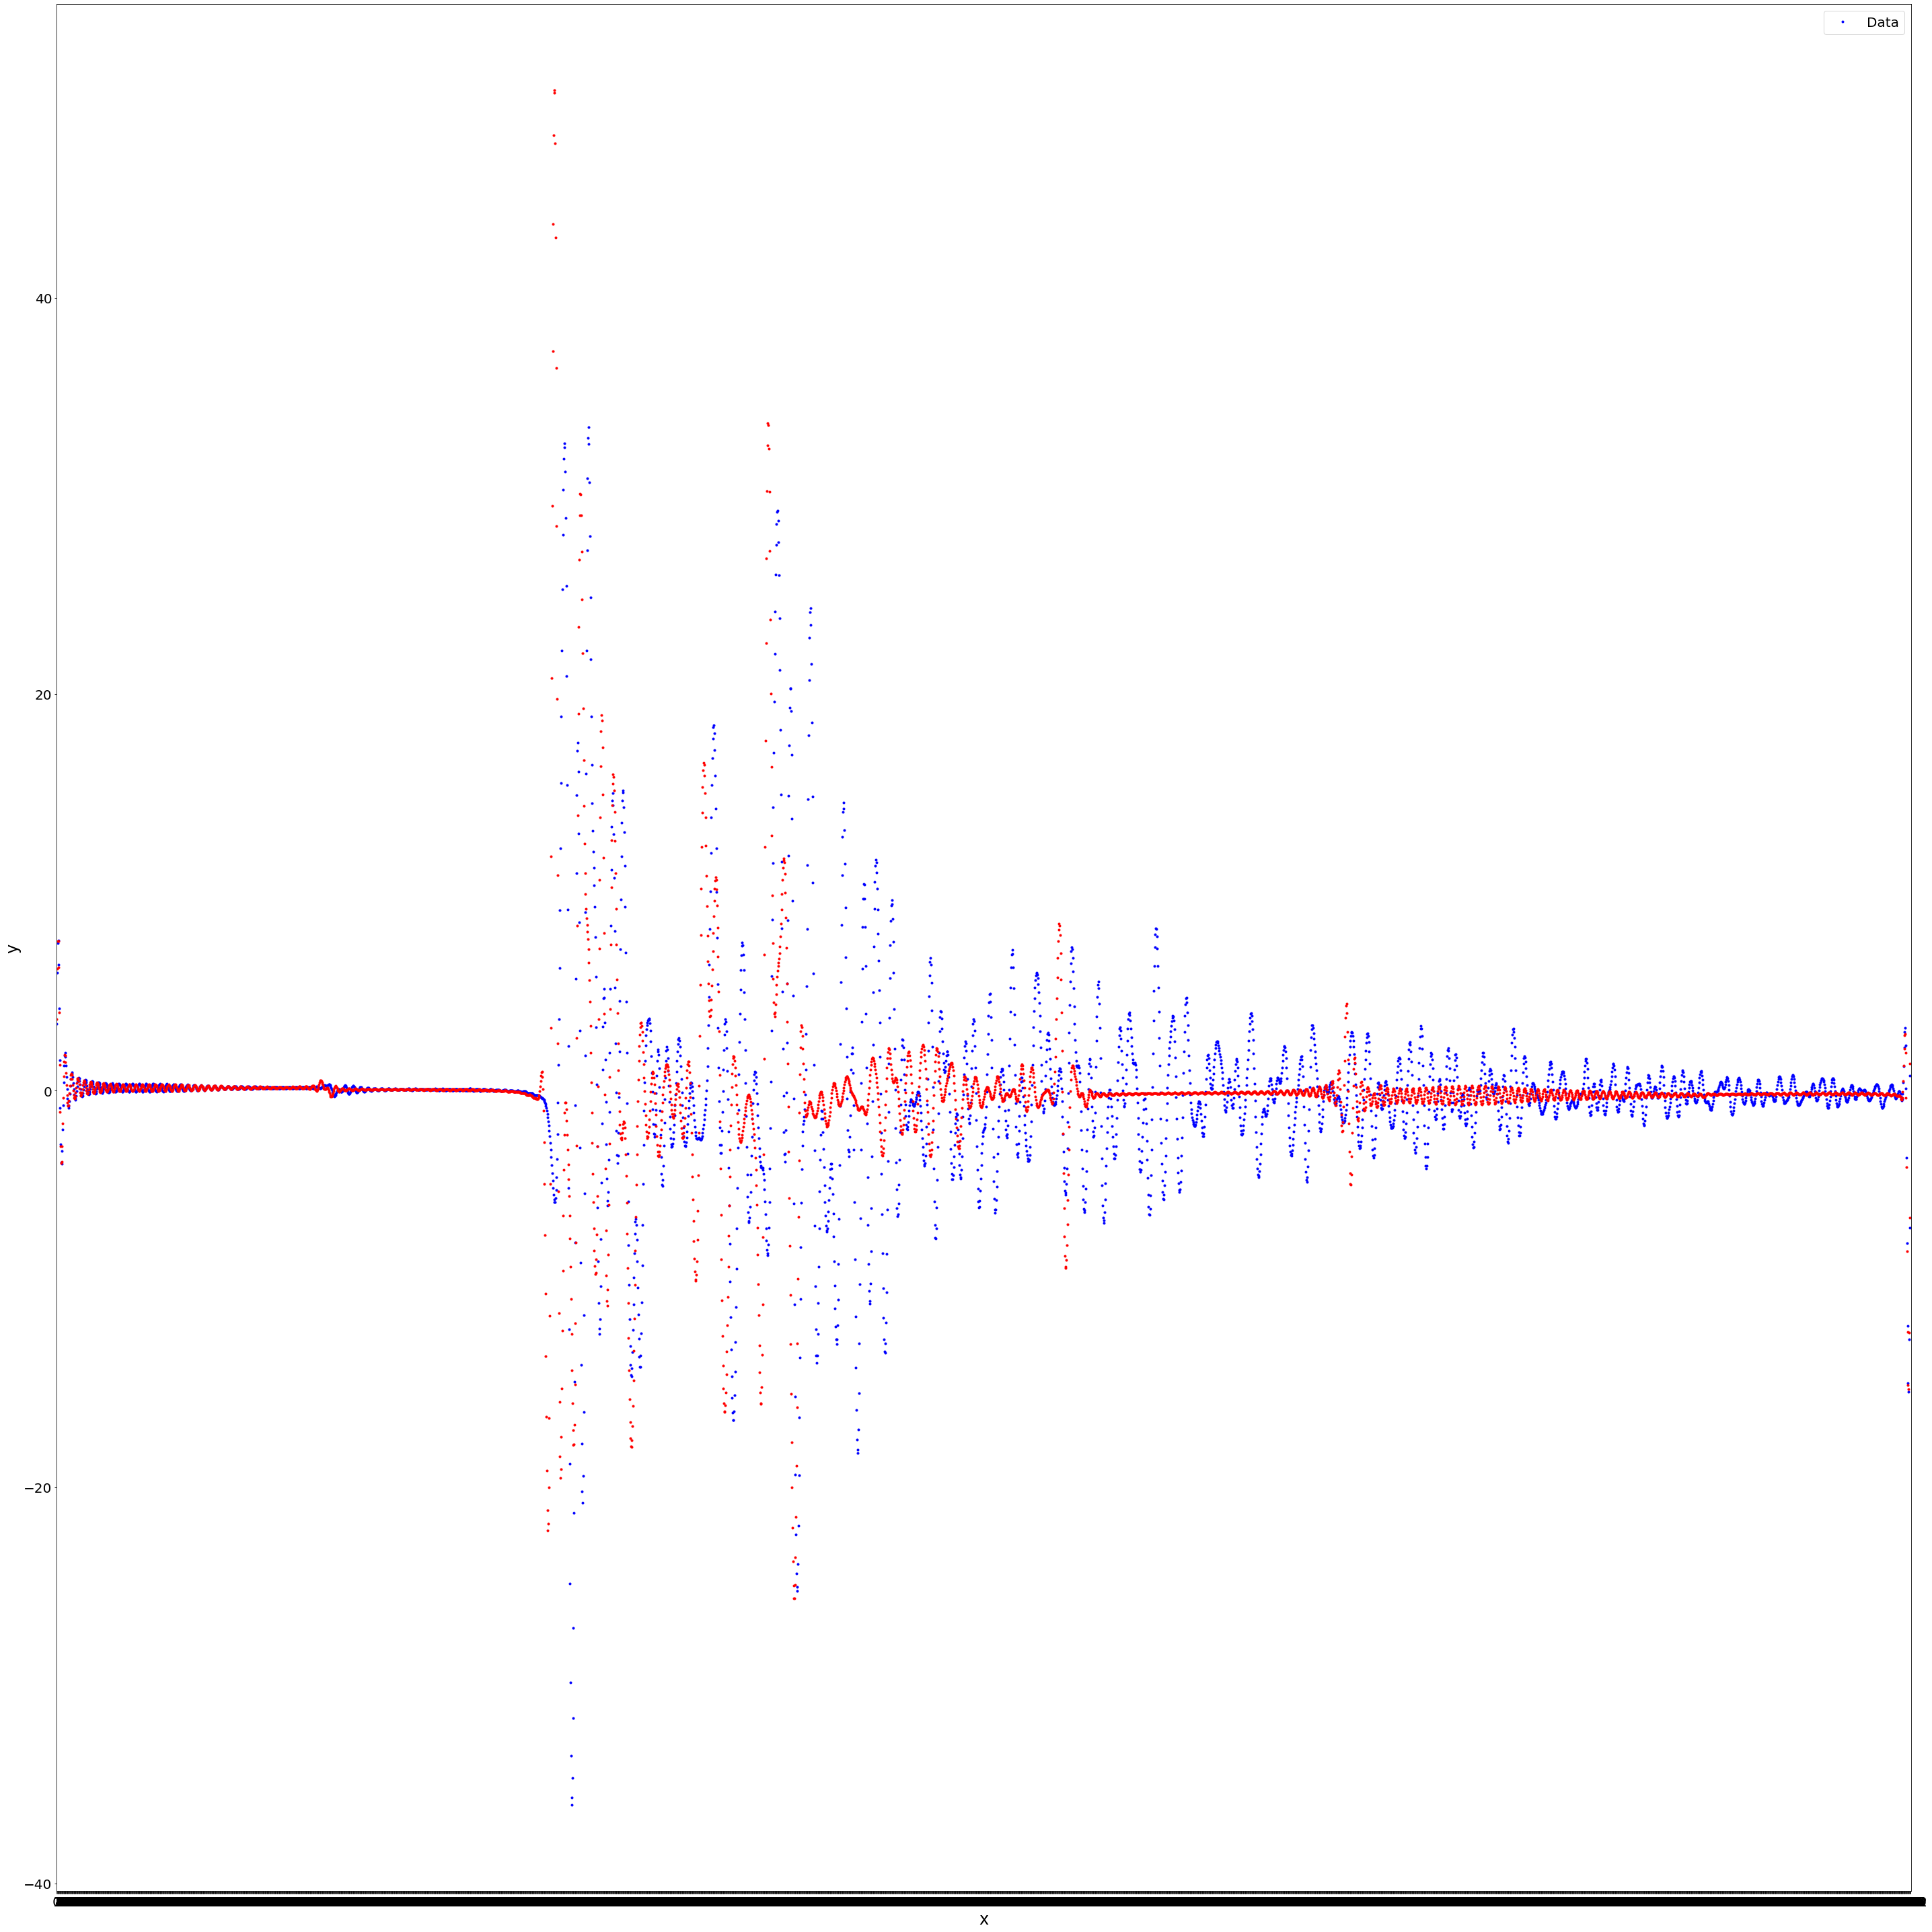

In [12]:
plt.figure(figsize=(40,40))

plt.plot(range(0,3832,1), fl_art['art'][0], 'b.')
plt.plot(range(0,3832,1), fl_artFree['artFree'][0], 'r.')
plt.xlim([0, 3833])
plt.xticks(range(0,3833, 1))
plt.xlabel('x',fontsize=24)
plt.ylabel('y',fontsize=24)
plt.legend(['Data'],loc=1,fontsize=20)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.tight_layout()
plt.savefig('display_og_data.png')
plt.show()

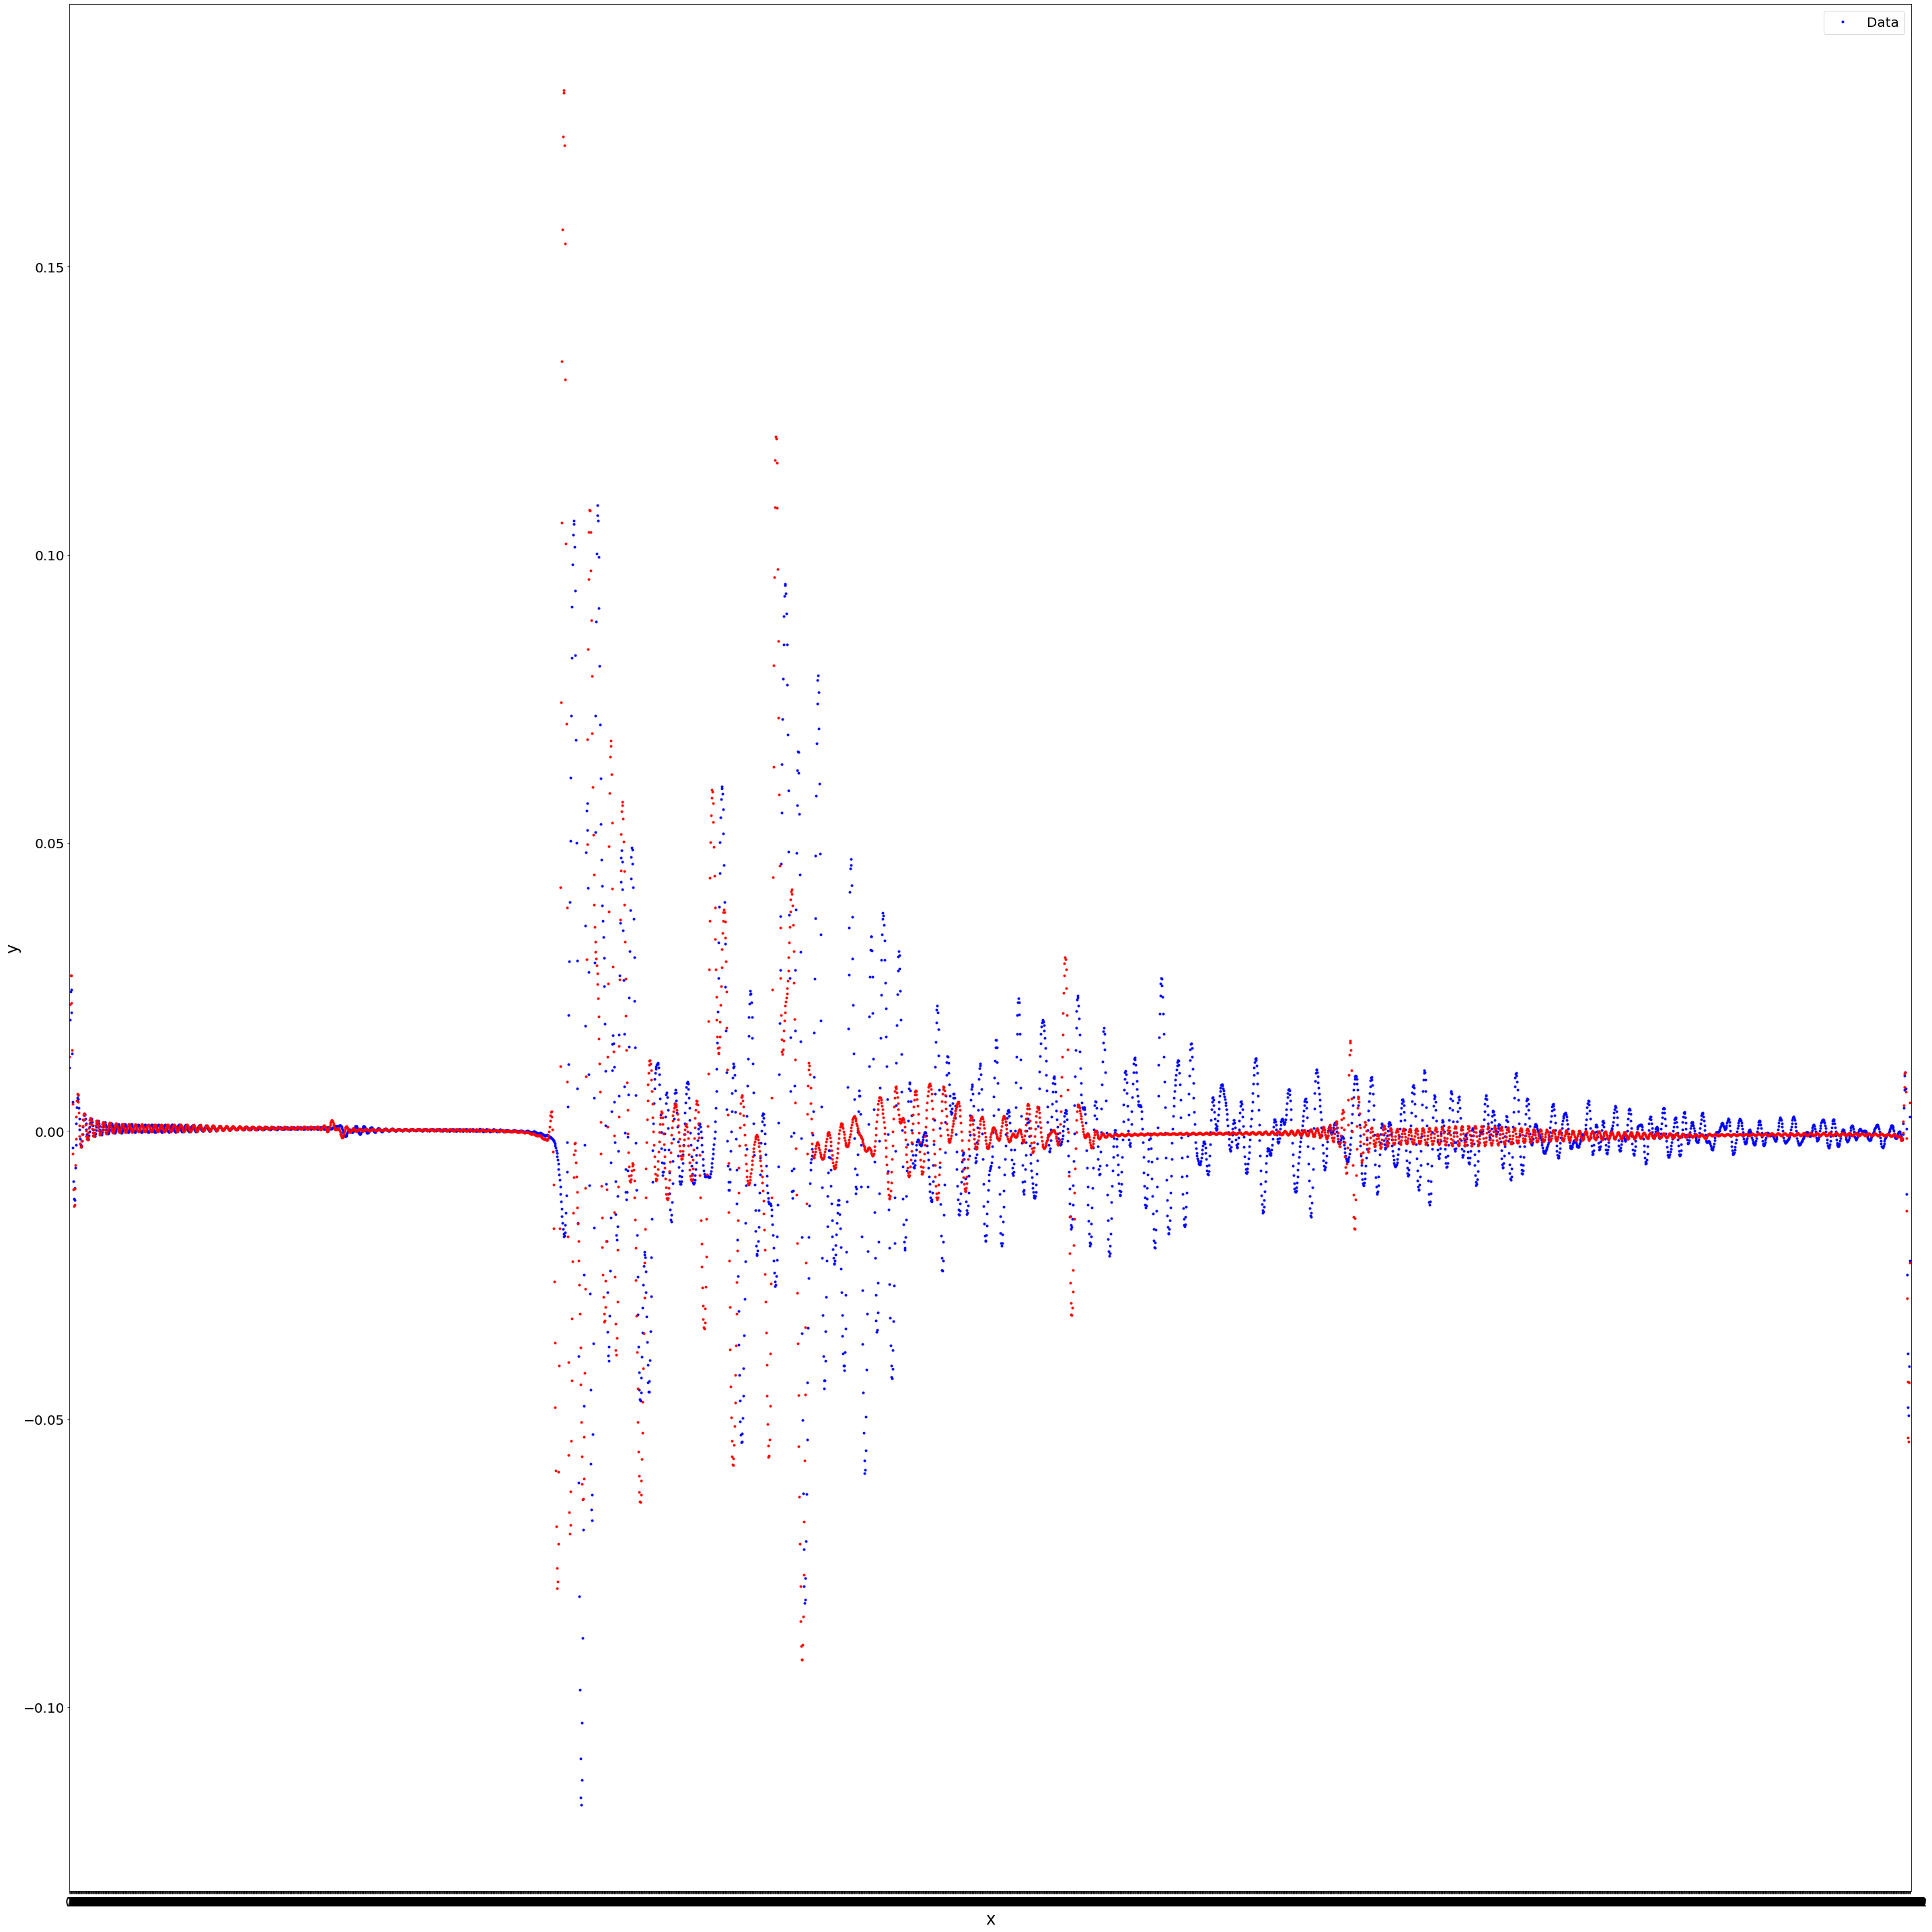

In [13]:
plt.figure(figsize=(40,40))

plt.plot(range(0,3832,1), X_data[0], 'b.')
plt.plot(range(0,3832,1), Y_data[0], 'r.')
plt.xlim([0, 3833])
plt.xticks(range(0,3833, 1))
plt.xlabel('x',fontsize=24)
plt.ylabel('y',fontsize=24)
plt.legend(['Data'],loc=1,fontsize=20)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.tight_layout()
plt.savefig('display_normalized_data.png')
plt.show()

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X_data, Y_data, test_size=0.3)

In [15]:
print(f'X_train, X_test, y_train, y_test = {len(X_train)}, {len(X_test)},{len(y_train)},{len(y_test)}')

X_train, X_test, y_train, y_test = 1260, 540,1260,540


In [16]:
X_val, X_test, y_val, y_test = train_test_split(X_test, y_test, test_size=0.34)

In [17]:
print(f'X_train, X_val, X_test, y_train,y_val, y_test = {len(X_train)}, {len(X_val)}, {len(X_test)},{len(y_train)},{len(y_val)},{len(y_test)}')

X_train, X_val, X_test, y_train,y_val, y_test = 1260, 356, 184,1260,356,184


In [18]:
len(y_val[0])

3832

In [19]:
X_val

array([[ 0.00539378,  0.01011588,  0.01289573, ..., -0.02490958,
        -0.014646  , -0.00065177],
       [ 0.00927414,  0.01600752,  0.0198553 , ..., -0.03226465,
        -0.01724273,  0.00302662],
       [ 0.00949547,  0.01568546,  0.01908661, ..., -0.029336  ,
        -0.01448963,  0.00492384],
       ...,
       [ 0.00342495,  0.00549959,  0.0066141 , ..., -0.00965372,
        -0.00445767,  0.00220717],
       [ 0.00585606,  0.01037909,  0.01299588, ..., -0.02252439,
        -0.01247174,  0.0010941 ],
       [ 0.00380672,  0.00762415,  0.00998395, ..., -0.0195712 ,
        -0.01223417, -0.00162559]])

# decoder

In [20]:
LATENT_SIZE = 200

# Note how sequential models can also be passed a list of layers
# This can be more concise than using add()
encoder = Sequential([
    #Dense(input_shape = (3832,)), # we need to flatten the 2D image before the Dense layer
    Dense(1024, input_shape = (3832,),activation='relu'),
    Dense(512, activation='relu'),
    Dense(256, activation='relu'),
    # specify the size of the latent dimension
    # your code here
    Dense(LATENT_SIZE, activation='relu'),
])

encoder.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 1024)              3924992   
_________________________________________________________________
dense_1 (Dense)              (None, 512)               524800    
_________________________________________________________________
dense_2 (Dense)              (None, 256)               131328    
_________________________________________________________________
dense_3 (Dense)              (None, 200)               51400     
Total params: 4,632,520
Trainable params: 4,632,520
Non-trainable params: 0
_________________________________________________________________


## Decoder

In [21]:
decoder = Sequential([
    Dense(256, input_shape = (LATENT_SIZE,), activation='relu'),
    Dense(512, activation='relu'),
    # specify a reasonable output activation
    # your code here
    Dense(1024, activation='relu'),
    Dense(3832, activation='relu'),
     # note the reshape to make the output 2D
])

decoder.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 256)               51456     
_________________________________________________________________
dense_5 (Dense)              (None, 512)               131584    
_________________________________________________________________
dense_6 (Dense)              (None, 1024)              525312    
_________________________________________________________________
dense_7 (Dense)              (None, 3832)              3927800   
Total params: 4,636,152
Trainable params: 4,636,152
Non-trainable params: 0
_________________________________________________________________


In [22]:
fl = Input(shape = (3832,)) # input
latent_vector = encoder(fl) # latent space
output = decoder(latent_vector) # output

# here we use the alternative Model constructor where we specify the model's input and output
# your code here
autoencoder = Model(inputs = fl, outputs = output)

loss = keras.losses.mse
##optimizer = nadam()
metrics = ['acc'] 
# your code here
# choose a sensible loss function for 'reconstruction error'
autoencoder.compile(optimizer="nadam", loss=loss, metrics=metrics) 

autoencoder.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 3832)]            0         
_________________________________________________________________
sequential (Sequential)      (None, 200)               4632520   
_________________________________________________________________
sequential_1 (Sequential)    (None, 3832)              4636152   
Total params: 9,268,672
Trainable params: 9,268,672
Non-trainable params: 0
_________________________________________________________________


In [23]:
# %load solutions/exercise5-2.py
batch_size = 128
epochs = 10000 # do 2 for now, 20 when you have time

logdir = os.path.join("logs", datetime.datetime.now().strftime("%Y%m%d-%H%M%S"))

callbacks = [ tf.keras.callbacks.EarlyStopping(
                    # Stop training when `val_loss` is no longer improving
                    monitor='val_loss',
                    # "no longer improving" being further defined as "for at least `patience` epochs
                    patience=10,
                    verbose=5, mode='auto'),
             tf.keras.callbacks.TensorBoard(logdir, histogram_freq=1)
            ]

history = autoencoder.fit(x = X_train, y = y_train,  epochs=epochs, batch_size=batch_size, 
                      validation_data=(X_val, y_val))

Epoch 1/10000
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: Bad argument number for Name: 4, expecting 3
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: Bad argument number for Name: 4, expecting 3
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
 8/10 [=======================>......] - ETA: 0s - loss: 2.6045e-04 - acc: 9.7656e-04WARNING:tensorflow:AutoGraph could not transform <function Model.make_test_function.<locals>.test_function at 0x0000017BACE6EEE8> and will run it as-is.
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and 

Epoch 45/10000
10/10 [==============================] - 0s 18ms/step - loss: 1.8774e-04 - acc: 0.2865 - val_loss: 1.9405e-04 - val_acc: 0.2163
Epoch 46/10000
10/10 [==============================] - 0s 18ms/step - loss: 1.8661e-04 - acc: 0.2984 - val_loss: 1.9440e-04 - val_acc: 0.1966
Epoch 47/10000
10/10 [==============================] - 0s 19ms/step - loss: 1.8679e-04 - acc: 0.2841 - val_loss: 1.9422e-04 - val_acc: 0.2303
Epoch 48/10000
10/10 [==============================] - 0s 18ms/step - loss: 1.8583e-04 - acc: 0.3063 - val_loss: 1.9486e-04 - val_acc: 0.2275
Epoch 49/10000
10/10 [==============================] - 0s 19ms/step - loss: 1.8684e-04 - acc: 0.2817 - val_loss: 1.9446e-04 - val_acc: 0.2022
Epoch 50/10000
10/10 [==============================] - 0s 18ms/step - loss: 1.8558e-04 - acc: 0.2865 - val_loss: 1.9333e-04 - val_acc: 0.2444
Epoch 51/10000
10/10 [==============================] - 0s 18ms/step - loss: 1.8557e-04 - acc: 0.3000 - val_loss: 1.9436e-04 - val_acc: 0.2275

10/10 [==============================] - 0s 18ms/step - loss: 1.7593e-04 - acc: 0.3262 - val_loss: 1.8827e-04 - val_acc: 0.2135
Epoch 103/10000
10/10 [==============================] - 0s 18ms/step - loss: 1.7541e-04 - acc: 0.3524 - val_loss: 1.8771e-04 - val_acc: 0.2303
Epoch 104/10000
10/10 [==============================] - 0s 18ms/step - loss: 1.7483e-04 - acc: 0.3595 - val_loss: 1.8767e-04 - val_acc: 0.2163
Epoch 105/10000
10/10 [==============================] - 0s 20ms/step - loss: 1.7450e-04 - acc: 0.3579 - val_loss: 1.8701e-04 - val_acc: 0.2360
Epoch 106/10000
10/10 [==============================] - 0s 18ms/step - loss: 1.7529e-04 - acc: 0.3476 - val_loss: 1.8793e-04 - val_acc: 0.2022
Epoch 107/10000
10/10 [==============================] - 0s 18ms/step - loss: 1.7438e-04 - acc: 0.3659 - val_loss: 1.8737e-04 - val_acc: 0.2275
Epoch 108/10000
10/10 [==============================] - 0s 18ms/step - loss: 1.7423e-04 - acc: 0.3643 - val_loss: 1.8832e-04 - val_acc: 0.2472
Epoch 10

10/10 [==============================] - 0s 20ms/step - loss: 1.6850e-04 - acc: 0.3889 - val_loss: 1.8478e-04 - val_acc: 0.2584
Epoch 160/10000
10/10 [==============================] - 0s 18ms/step - loss: 1.6825e-04 - acc: 0.4175 - val_loss: 1.8444e-04 - val_acc: 0.2697
Epoch 161/10000
10/10 [==============================] - 0s 21ms/step - loss: 1.6835e-04 - acc: 0.3881 - val_loss: 1.8421e-04 - val_acc: 0.2669
Epoch 162/10000
10/10 [==============================] - 0s 19ms/step - loss: 1.6831e-04 - acc: 0.4024 - val_loss: 1.8416e-04 - val_acc: 0.2556
Epoch 163/10000
10/10 [==============================] - 0s 19ms/step - loss: 1.6806e-04 - acc: 0.4159 - val_loss: 1.8442e-04 - val_acc: 0.2809
Epoch 164/10000
10/10 [==============================] - 0s 19ms/step - loss: 1.6799e-04 - acc: 0.4111 - val_loss: 1.8489e-04 - val_acc: 0.2725
Epoch 165/10000
10/10 [==============================] - 0s 19ms/step - loss: 1.6842e-04 - acc: 0.3976 - val_loss: 1.8435e-04 - val_acc: 0.2753
Epoch 16

10/10 [==============================] - 0s 19ms/step - loss: 1.6418e-04 - acc: 0.4333 - val_loss: 1.8272e-04 - val_acc: 0.3090
Epoch 217/10000
10/10 [==============================] - 0s 19ms/step - loss: 1.6416e-04 - acc: 0.4397 - val_loss: 1.8269e-04 - val_acc: 0.2921
Epoch 218/10000
10/10 [==============================] - 0s 20ms/step - loss: 1.6385e-04 - acc: 0.4516 - val_loss: 1.8212e-04 - val_acc: 0.2893
Epoch 219/10000
10/10 [==============================] - 0s 20ms/step - loss: 1.6359e-04 - acc: 0.4317 - val_loss: 1.8233e-04 - val_acc: 0.2809
Epoch 220/10000
10/10 [==============================] - 0s 19ms/step - loss: 1.6365e-04 - acc: 0.4302 - val_loss: 1.8240e-04 - val_acc: 0.3006
Epoch 221/10000
10/10 [==============================] - 0s 18ms/step - loss: 1.6358e-04 - acc: 0.4381 - val_loss: 1.8216e-04 - val_acc: 0.2893
Epoch 222/10000
10/10 [==============================] - 0s 18ms/step - loss: 1.6387e-04 - acc: 0.4333 - val_loss: 1.8319e-04 - val_acc: 0.2809
Epoch 22

10/10 [==============================] - 0s 18ms/step - loss: 1.6070e-04 - acc: 0.4619 - val_loss: 1.8099e-04 - val_acc: 0.2669
Epoch 274/10000
10/10 [==============================] - 0s 18ms/step - loss: 1.6043e-04 - acc: 0.4643 - val_loss: 1.8066e-04 - val_acc: 0.2865
Epoch 275/10000
10/10 [==============================] - 0s 19ms/step - loss: 1.6042e-04 - acc: 0.4627 - val_loss: 1.8117e-04 - val_acc: 0.2781
Epoch 276/10000
10/10 [==============================] - 0s 18ms/step - loss: 1.6055e-04 - acc: 0.4635 - val_loss: 1.8113e-04 - val_acc: 0.2865
Epoch 277/10000
10/10 [==============================] - 0s 19ms/step - loss: 1.6054e-04 - acc: 0.4563 - val_loss: 1.8085e-04 - val_acc: 0.2978
Epoch 278/10000
10/10 [==============================] - 0s 18ms/step - loss: 1.6019e-04 - acc: 0.4563 - val_loss: 1.8119e-04 - val_acc: 0.2865
Epoch 279/10000
10/10 [==============================] - 0s 18ms/step - loss: 1.6014e-04 - acc: 0.4563 - val_loss: 1.8087e-04 - val_acc: 0.2978
Epoch 28

10/10 [==============================] - 0s 19ms/step - loss: 1.5889e-04 - acc: 0.5071 - val_loss: 1.8091e-04 - val_acc: 0.2837
Epoch 331/10000
10/10 [==============================] - 0s 18ms/step - loss: 1.5889e-04 - acc: 0.4976 - val_loss: 1.8104e-04 - val_acc: 0.2781
Epoch 332/10000
10/10 [==============================] - 0s 20ms/step - loss: 1.5902e-04 - acc: 0.4905 - val_loss: 1.8100e-04 - val_acc: 0.2809
Epoch 333/10000
10/10 [==============================] - 0s 19ms/step - loss: 1.5912e-04 - acc: 0.4913 - val_loss: 1.8092e-04 - val_acc: 0.2809
Epoch 334/10000
10/10 [==============================] - 0s 19ms/step - loss: 1.5885e-04 - acc: 0.5119 - val_loss: 1.8067e-04 - val_acc: 0.2921
Epoch 335/10000
10/10 [==============================] - 0s 18ms/step - loss: 1.5890e-04 - acc: 0.4857 - val_loss: 1.8067e-04 - val_acc: 0.2837
Epoch 336/10000
10/10 [==============================] - 0s 18ms/step - loss: 1.5897e-04 - acc: 0.5032 - val_loss: 1.8088e-04 - val_acc: 0.2837
Epoch 33

Epoch 387/10000
10/10 [==============================] - 0s 18ms/step - loss: 1.5783e-04 - acc: 0.5198 - val_loss: 1.8040e-04 - val_acc: 0.2949
Epoch 388/10000
10/10 [==============================] - 0s 20ms/step - loss: 1.5770e-04 - acc: 0.5198 - val_loss: 1.8045e-04 - val_acc: 0.2978
Epoch 389/10000
10/10 [==============================] - 0s 19ms/step - loss: 1.5762e-04 - acc: 0.5175 - val_loss: 1.8017e-04 - val_acc: 0.2949
Epoch 390/10000
10/10 [==============================] - 0s 18ms/step - loss: 1.5764e-04 - acc: 0.5333 - val_loss: 1.8032e-04 - val_acc: 0.2865
Epoch 391/10000
10/10 [==============================] - 0s 19ms/step - loss: 1.5760e-04 - acc: 0.5278 - val_loss: 1.8046e-04 - val_acc: 0.2753
Epoch 392/10000
10/10 [==============================] - 0s 18ms/step - loss: 1.5762e-04 - acc: 0.5214 - val_loss: 1.8067e-04 - val_acc: 0.2865
Epoch 393/10000
10/10 [==============================] - 0s 18ms/step - loss: 1.5766e-04 - acc: 0.5143 - val_loss: 1.8038e-04 - val_acc:

Epoch 444/10000
10/10 [==============================] - 0s 19ms/step - loss: 1.5683e-04 - acc: 0.5492 - val_loss: 1.8052e-04 - val_acc: 0.2893
Epoch 445/10000
10/10 [==============================] - 0s 20ms/step - loss: 1.5678e-04 - acc: 0.5341 - val_loss: 1.8030e-04 - val_acc: 0.3034
Epoch 446/10000
10/10 [==============================] - 0s 18ms/step - loss: 1.5672e-04 - acc: 0.5444 - val_loss: 1.8028e-04 - val_acc: 0.2753
Epoch 447/10000
10/10 [==============================] - 0s 19ms/step - loss: 1.5675e-04 - acc: 0.5484 - val_loss: 1.8002e-04 - val_acc: 0.2837
Epoch 448/10000
10/10 [==============================] - 0s 18ms/step - loss: 1.5671e-04 - acc: 0.5556 - val_loss: 1.7992e-04 - val_acc: 0.2781
Epoch 449/10000
10/10 [==============================] - 0s 18ms/step - loss: 1.5666e-04 - acc: 0.5492 - val_loss: 1.7998e-04 - val_acc: 0.2949
Epoch 450/10000
10/10 [==============================] - 0s 18ms/step - loss: 1.5656e-04 - acc: 0.5373 - val_loss: 1.8006e-04 - val_acc:

Epoch 501/10000
10/10 [==============================] - 0s 18ms/step - loss: 1.5534e-04 - acc: 0.5690 - val_loss: 1.7962e-04 - val_acc: 0.2921
Epoch 502/10000
10/10 [==============================] - 0s 20ms/step - loss: 1.5530e-04 - acc: 0.5627 - val_loss: 1.7958e-04 - val_acc: 0.2949
Epoch 503/10000
10/10 [==============================] - 0s 19ms/step - loss: 1.5548e-04 - acc: 0.5444 - val_loss: 1.7944e-04 - val_acc: 0.2893
Epoch 504/10000
10/10 [==============================] - 0s 18ms/step - loss: 1.5528e-04 - acc: 0.5579 - val_loss: 1.7938e-04 - val_acc: 0.2921
Epoch 505/10000
10/10 [==============================] - 0s 18ms/step - loss: 1.5520e-04 - acc: 0.5659 - val_loss: 1.7947e-04 - val_acc: 0.2893
Epoch 506/10000
10/10 [==============================] - 0s 19ms/step - loss: 1.5530e-04 - acc: 0.5627 - val_loss: 1.7945e-04 - val_acc: 0.2753
Epoch 507/10000
10/10 [==============================] - 0s 18ms/step - loss: 1.5543e-04 - acc: 0.5405 - val_loss: 1.7943e-04 - val_acc:

Epoch 558/10000
10/10 [==============================] - 0s 19ms/step - loss: 1.5473e-04 - acc: 0.5992 - val_loss: 1.7932e-04 - val_acc: 0.2921
Epoch 559/10000
10/10 [==============================] - 0s 20ms/step - loss: 1.5470e-04 - acc: 0.6000 - val_loss: 1.7927e-04 - val_acc: 0.2809
Epoch 560/10000
10/10 [==============================] - 0s 19ms/step - loss: 1.5473e-04 - acc: 0.6008 - val_loss: 1.7926e-04 - val_acc: 0.2753
Epoch 561/10000
10/10 [==============================] - 0s 18ms/step - loss: 1.5473e-04 - acc: 0.5937 - val_loss: 1.7930e-04 - val_acc: 0.2978
Epoch 562/10000
10/10 [==============================] - 0s 18ms/step - loss: 1.5477e-04 - acc: 0.5825 - val_loss: 1.7930e-04 - val_acc: 0.2809
Epoch 563/10000
10/10 [==============================] - 0s 18ms/step - loss: 1.5490e-04 - acc: 0.5770 - val_loss: 1.7918e-04 - val_acc: 0.2865
Epoch 564/10000
10/10 [==============================] - 0s 18ms/step - loss: 1.5476e-04 - acc: 0.6008 - val_loss: 1.7922e-04 - val_acc:

Epoch 615/10000
10/10 [==============================] - 0s 18ms/step - loss: 1.5426e-04 - acc: 0.6198 - val_loss: 1.7927e-04 - val_acc: 0.2753
Epoch 616/10000
10/10 [==============================] - 0s 20ms/step - loss: 1.5425e-04 - acc: 0.6238 - val_loss: 1.7925e-04 - val_acc: 0.2781
Epoch 617/10000
10/10 [==============================] - 0s 18ms/step - loss: 1.5422e-04 - acc: 0.6222 - val_loss: 1.7925e-04 - val_acc: 0.2809
Epoch 618/10000
10/10 [==============================] - 0s 18ms/step - loss: 1.5424e-04 - acc: 0.6159 - val_loss: 1.7929e-04 - val_acc: 0.2669
Epoch 619/10000
10/10 [==============================] - 0s 18ms/step - loss: 1.5435e-04 - acc: 0.5889 - val_loss: 1.7938e-04 - val_acc: 0.2865
Epoch 620/10000
10/10 [==============================] - 0s 18ms/step - loss: 1.5433e-04 - acc: 0.6000 - val_loss: 1.7931e-04 - val_acc: 0.2837
Epoch 621/10000
10/10 [==============================] - 0s 18ms/step - loss: 1.5428e-04 - acc: 0.6016 - val_loss: 1.7926e-04 - val_acc:

Epoch 672/10000
10/10 [==============================] - 0s 18ms/step - loss: 1.5414e-04 - acc: 0.6190 - val_loss: 1.7934e-04 - val_acc: 0.2697
Epoch 673/10000
10/10 [==============================] - 0s 20ms/step - loss: 1.5426e-04 - acc: 0.6024 - val_loss: 1.7946e-04 - val_acc: 0.2781
Epoch 674/10000
10/10 [==============================] - 0s 19ms/step - loss: 1.5422e-04 - acc: 0.6127 - val_loss: 1.7925e-04 - val_acc: 0.2781
Epoch 675/10000
10/10 [==============================] - 0s 18ms/step - loss: 1.5406e-04 - acc: 0.6302 - val_loss: 1.7919e-04 - val_acc: 0.2865
Epoch 676/10000
10/10 [==============================] - 0s 18ms/step - loss: 1.5403e-04 - acc: 0.6381 - val_loss: 1.7915e-04 - val_acc: 0.2837
Epoch 677/10000
10/10 [==============================] - 0s 18ms/step - loss: 1.5401e-04 - acc: 0.6421 - val_loss: 1.7918e-04 - val_acc: 0.2809
Epoch 678/10000
10/10 [==============================] - 0s 18ms/step - loss: 1.5400e-04 - acc: 0.6325 - val_loss: 1.7919e-04 - val_acc:

Epoch 729/10000
10/10 [==============================] - 0s 18ms/step - loss: 1.5374e-04 - acc: 0.6476 - val_loss: 1.7918e-04 - val_acc: 0.2837
Epoch 730/10000
10/10 [==============================] - 0s 20ms/step - loss: 1.5372e-04 - acc: 0.6452 - val_loss: 1.7929e-04 - val_acc: 0.2921
Epoch 731/10000
10/10 [==============================] - 0s 18ms/step - loss: 1.5371e-04 - acc: 0.6429 - val_loss: 1.7926e-04 - val_acc: 0.2837
Epoch 732/10000
10/10 [==============================] - 0s 19ms/step - loss: 1.5369e-04 - acc: 0.6492 - val_loss: 1.7924e-04 - val_acc: 0.2949
Epoch 733/10000
10/10 [==============================] - 0s 18ms/step - loss: 1.5368e-04 - acc: 0.6484 - val_loss: 1.7925e-04 - val_acc: 0.2949
Epoch 734/10000
10/10 [==============================] - 0s 19ms/step - loss: 1.5368e-04 - acc: 0.6437 - val_loss: 1.7926e-04 - val_acc: 0.2949
Epoch 735/10000
10/10 [==============================] - 0s 19ms/step - loss: 1.5369e-04 - acc: 0.6405 - val_loss: 1.7931e-04 - val_acc:

Epoch 786/10000
10/10 [==============================] - 0s 19ms/step - loss: 1.5354e-04 - acc: 0.6460 - val_loss: 1.7919e-04 - val_acc: 0.2865
Epoch 787/10000
10/10 [==============================] - 0s 20ms/step - loss: 1.5350e-04 - acc: 0.6444 - val_loss: 1.7914e-04 - val_acc: 0.2865
Epoch 788/10000
10/10 [==============================] - 0s 18ms/step - loss: 1.5348e-04 - acc: 0.6587 - val_loss: 1.7917e-04 - val_acc: 0.2921
Epoch 789/10000
10/10 [==============================] - 0s 18ms/step - loss: 1.5347e-04 - acc: 0.6579 - val_loss: 1.7914e-04 - val_acc: 0.2949
Epoch 790/10000
10/10 [==============================] - 0s 18ms/step - loss: 1.5346e-04 - acc: 0.6611 - val_loss: 1.7917e-04 - val_acc: 0.2921
Epoch 791/10000
10/10 [==============================] - 0s 18ms/step - loss: 1.5348e-04 - acc: 0.6571 - val_loss: 1.7916e-04 - val_acc: 0.2865
Epoch 792/10000
10/10 [==============================] - 0s 18ms/step - loss: 1.5351e-04 - acc: 0.6405 - val_loss: 1.7913e-04 - val_acc:

10/10 [==============================] - 0s 18ms/step - loss: 1.5340e-04 - acc: 0.6698 - val_loss: 1.7923e-04 - val_acc: 0.3006
Epoch 843/10000
10/10 [==============================] - 0s 20ms/step - loss: 1.5339e-04 - acc: 0.6714 - val_loss: 1.7923e-04 - val_acc: 0.2865
Epoch 844/10000
10/10 [==============================] - 0s 18ms/step - loss: 1.5349e-04 - acc: 0.6516 - val_loss: 1.7938e-04 - val_acc: 0.2949
Epoch 845/10000
10/10 [==============================] - 0s 18ms/step - loss: 1.5368e-04 - acc: 0.6302 - val_loss: 1.7912e-04 - val_acc: 0.2978
Epoch 846/10000
10/10 [==============================] - 0s 18ms/step - loss: 1.5358e-04 - acc: 0.6143 - val_loss: 1.7919e-04 - val_acc: 0.2809
Epoch 847/10000
10/10 [==============================] - 0s 18ms/step - loss: 1.5348e-04 - acc: 0.6397 - val_loss: 1.7918e-04 - val_acc: 0.2640
Epoch 848/10000
10/10 [==============================] - 0s 18ms/step - loss: 1.5342e-04 - acc: 0.6627 - val_loss: 1.7919e-04 - val_acc: 0.2837
Epoch 84

10/10 [==============================] - 0s 20ms/step - loss: 1.5330e-04 - acc: 0.6817 - val_loss: 1.7918e-04 - val_acc: 0.2781
Epoch 900/10000
10/10 [==============================] - 0s 18ms/step - loss: 1.5330e-04 - acc: 0.6802 - val_loss: 1.7917e-04 - val_acc: 0.2837
Epoch 901/10000
10/10 [==============================] - 0s 18ms/step - loss: 1.5330e-04 - acc: 0.6738 - val_loss: 1.7916e-04 - val_acc: 0.2893
Epoch 902/10000
10/10 [==============================] - 0s 18ms/step - loss: 1.5330e-04 - acc: 0.6754 - val_loss: 1.7918e-04 - val_acc: 0.2809
Epoch 903/10000
10/10 [==============================] - 0s 18ms/step - loss: 1.5330e-04 - acc: 0.6770 - val_loss: 1.7920e-04 - val_acc: 0.2781
Epoch 904/10000
10/10 [==============================] - 0s 18ms/step - loss: 1.5330e-04 - acc: 0.6770 - val_loss: 1.7919e-04 - val_acc: 0.2781
Epoch 905/10000
10/10 [==============================] - 0s 19ms/step - loss: 1.5330e-04 - acc: 0.6770 - val_loss: 1.7922e-04 - val_acc: 0.2837
Epoch 90

10/10 [==============================] - 0s 20ms/step - loss: 1.5320e-04 - acc: 0.6841 - val_loss: 1.7920e-04 - val_acc: 0.2921
Epoch 957/10000
10/10 [==============================] - 0s 18ms/step - loss: 1.5320e-04 - acc: 0.6817 - val_loss: 1.7921e-04 - val_acc: 0.2921
Epoch 958/10000
10/10 [==============================] - 0s 18ms/step - loss: 1.5319e-04 - acc: 0.6905 - val_loss: 1.7920e-04 - val_acc: 0.2809
Epoch 959/10000
10/10 [==============================] - 0s 18ms/step - loss: 1.5319e-04 - acc: 0.6881 - val_loss: 1.7921e-04 - val_acc: 0.2837
Epoch 960/10000
10/10 [==============================] - 0s 18ms/step - loss: 1.5319e-04 - acc: 0.6833 - val_loss: 1.7921e-04 - val_acc: 0.2893
Epoch 961/10000
10/10 [==============================] - 0s 18ms/step - loss: 1.5319e-04 - acc: 0.6865 - val_loss: 1.7919e-04 - val_acc: 0.2921
Epoch 962/10000
10/10 [==============================] - 0s 18ms/step - loss: 1.5319e-04 - acc: 0.6921 - val_loss: 1.7921e-04 - val_acc: 0.2781
Epoch 96

Epoch 1013/10000
10/10 [==============================] - 0s 18ms/step - loss: 1.5314e-04 - acc: 0.6889 - val_loss: 1.7924e-04 - val_acc: 0.2865
Epoch 1014/10000
10/10 [==============================] - 0s 18ms/step - loss: 1.5317e-04 - acc: 0.6683 - val_loss: 1.7923e-04 - val_acc: 0.2893
Epoch 1015/10000
10/10 [==============================] - 0s 18ms/step - loss: 1.5318e-04 - acc: 0.6683 - val_loss: 1.7918e-04 - val_acc: 0.2809
Epoch 1016/10000
10/10 [==============================] - 0s 18ms/step - loss: 1.5317e-04 - acc: 0.6738 - val_loss: 1.7924e-04 - val_acc: 0.2865
Epoch 1017/10000
10/10 [==============================] - 0s 18ms/step - loss: 1.5323e-04 - acc: 0.6595 - val_loss: 1.7932e-04 - val_acc: 0.2865
Epoch 1018/10000
10/10 [==============================] - 0s 18ms/step - loss: 1.5324e-04 - acc: 0.6675 - val_loss: 1.7918e-04 - val_acc: 0.2893
Epoch 1019/10000
10/10 [==============================] - 0s 18ms/step - loss: 1.5321e-04 - acc: 0.6738 - val_loss: 1.7918e-04 - v

10/10 [==============================] - 0s 20ms/step - loss: 1.5307e-04 - acc: 0.6992 - val_loss: 1.7930e-04 - val_acc: 0.2893
Epoch 1070/10000
10/10 [==============================] - 0s 18ms/step - loss: 1.5307e-04 - acc: 0.6976 - val_loss: 1.7929e-04 - val_acc: 0.2921
Epoch 1071/10000
10/10 [==============================] - 0s 18ms/step - loss: 1.5307e-04 - acc: 0.7063 - val_loss: 1.7932e-04 - val_acc: 0.2949
Epoch 1072/10000
10/10 [==============================] - 0s 18ms/step - loss: 1.5307e-04 - acc: 0.7032 - val_loss: 1.7931e-04 - val_acc: 0.2949
Epoch 1073/10000
10/10 [==============================] - 0s 19ms/step - loss: 1.5306e-04 - acc: 0.7008 - val_loss: 1.7930e-04 - val_acc: 0.2949
Epoch 1074/10000
10/10 [==============================] - 0s 18ms/step - loss: 1.5306e-04 - acc: 0.7056 - val_loss: 1.7929e-04 - val_acc: 0.2978
Epoch 1075/10000
10/10 [==============================] - 0s 18ms/step - loss: 1.5306e-04 - acc: 0.7063 - val_loss: 1.7929e-04 - val_acc: 0.2949
Ep

10/10 [==============================] - 0s 18ms/step - loss: 1.5306e-04 - acc: 0.6881 - val_loss: 1.7932e-04 - val_acc: 0.2921
Epoch 1126/10000
10/10 [==============================] - 0s 20ms/step - loss: 1.5305e-04 - acc: 0.6905 - val_loss: 1.7928e-04 - val_acc: 0.2978
Epoch 1127/10000
10/10 [==============================] - 0s 18ms/step - loss: 1.5304e-04 - acc: 0.6976 - val_loss: 1.7930e-04 - val_acc: 0.2949
Epoch 1128/10000
10/10 [==============================] - 0s 18ms/step - loss: 1.5303e-04 - acc: 0.6929 - val_loss: 1.7925e-04 - val_acc: 0.2949
Epoch 1129/10000
10/10 [==============================] - 0s 18ms/step - loss: 1.5303e-04 - acc: 0.7040 - val_loss: 1.7927e-04 - val_acc: 0.2978
Epoch 1130/10000
10/10 [==============================] - 0s 18ms/step - loss: 1.5302e-04 - acc: 0.7071 - val_loss: 1.7928e-04 - val_acc: 0.3034
Epoch 1131/10000
10/10 [==============================] - 0s 18ms/step - loss: 1.5302e-04 - acc: 0.7151 - val_loss: 1.7928e-04 - val_acc: 0.3062
Ep

10/10 [==============================] - 0s 18ms/step - loss: 1.5300e-04 - acc: 0.7127 - val_loss: 1.7930e-04 - val_acc: 0.3034
Epoch 1182/10000
10/10 [==============================] - 0s 19ms/step - loss: 1.5300e-04 - acc: 0.7103 - val_loss: 1.7931e-04 - val_acc: 0.3006
Epoch 1183/10000
10/10 [==============================] - 0s 19ms/step - loss: 1.5300e-04 - acc: 0.7103 - val_loss: 1.7931e-04 - val_acc: 0.2978
Epoch 1184/10000
10/10 [==============================] - 0s 18ms/step - loss: 1.5300e-04 - acc: 0.7063 - val_loss: 1.7932e-04 - val_acc: 0.3006
Epoch 1185/10000
10/10 [==============================] - 0s 19ms/step - loss: 1.5300e-04 - acc: 0.7063 - val_loss: 1.7932e-04 - val_acc: 0.2921
Epoch 1186/10000
10/10 [==============================] - 0s 18ms/step - loss: 1.5300e-04 - acc: 0.7159 - val_loss: 1.7933e-04 - val_acc: 0.2978
Epoch 1187/10000
10/10 [==============================] - 0s 18ms/step - loss: 1.5300e-04 - acc: 0.7063 - val_loss: 1.7932e-04 - val_acc: 0.2921
Ep

10/10 [==============================] - 0s 18ms/step - loss: 1.5298e-04 - acc: 0.7167 - val_loss: 1.7932e-04 - val_acc: 0.2978
Epoch 1238/10000
10/10 [==============================] - 0s 18ms/step - loss: 1.5298e-04 - acc: 0.7175 - val_loss: 1.7931e-04 - val_acc: 0.3006
Epoch 1239/10000
10/10 [==============================] - 0s 18ms/step - loss: 1.5298e-04 - acc: 0.7183 - val_loss: 1.7929e-04 - val_acc: 0.2978
Epoch 1240/10000
10/10 [==============================] - 0s 19ms/step - loss: 1.5298e-04 - acc: 0.7183 - val_loss: 1.7928e-04 - val_acc: 0.2978
Epoch 1241/10000
10/10 [==============================] - 0s 18ms/step - loss: 1.5298e-04 - acc: 0.7206 - val_loss: 1.7929e-04 - val_acc: 0.3006
Epoch 1242/10000
10/10 [==============================] - 0s 18ms/step - loss: 1.5298e-04 - acc: 0.7183 - val_loss: 1.7929e-04 - val_acc: 0.3006
Epoch 1243/10000
10/10 [==============================] - 0s 18ms/step - loss: 1.5299e-04 - acc: 0.7111 - val_loss: 1.7930e-04 - val_acc: 0.2921
Ep

10/10 [==============================] - 0s 18ms/step - loss: 1.5298e-04 - acc: 0.7175 - val_loss: 1.7933e-04 - val_acc: 0.3062
Epoch 1294/10000
10/10 [==============================] - 0s 18ms/step - loss: 1.5298e-04 - acc: 0.7151 - val_loss: 1.7929e-04 - val_acc: 0.2978
Epoch 1295/10000
10/10 [==============================] - ETA: 0s - loss: 1.5246e-04 - acc: 0.722 - 0s 18ms/step - loss: 1.5297e-04 - acc: 0.7214 - val_loss: 1.7929e-04 - val_acc: 0.2978
Epoch 1296/10000
10/10 [==============================] - 0s 19ms/step - loss: 1.5299e-04 - acc: 0.7056 - val_loss: 1.7924e-04 - val_acc: 0.2949
Epoch 1297/10000
10/10 [==============================] - 0s 18ms/step - loss: 1.5300e-04 - acc: 0.7056 - val_loss: 1.7927e-04 - val_acc: 0.2837
Epoch 1298/10000
10/10 [==============================] - 0s 20ms/step - loss: 1.5303e-04 - acc: 0.6857 - val_loss: 1.7931e-04 - val_acc: 0.2865
Epoch 1299/10000
10/10 [==============================] - 0s 20ms/step - loss: 1.5301e-04 - acc: 0.6913 -

10/10 [==============================] - 0s 18ms/step - loss: 1.5295e-04 - acc: 0.7325 - val_loss: 1.7929e-04 - val_acc: 0.3034
Epoch 1350/10000
10/10 [==============================] - 0s 18ms/step - loss: 1.5295e-04 - acc: 0.7270 - val_loss: 1.7930e-04 - val_acc: 0.3062
Epoch 1351/10000
10/10 [==============================] - 0s 19ms/step - loss: 1.5295e-04 - acc: 0.7286 - val_loss: 1.7929e-04 - val_acc: 0.2978
Epoch 1352/10000
10/10 [==============================] - 0s 18ms/step - loss: 1.5295e-04 - acc: 0.7302 - val_loss: 1.7929e-04 - val_acc: 0.3062
Epoch 1353/10000
10/10 [==============================] - 0s 18ms/step - loss: 1.5295e-04 - acc: 0.7278 - val_loss: 1.7928e-04 - val_acc: 0.3006
Epoch 1354/10000
10/10 [==============================] - 0s 20ms/step - loss: 1.5295e-04 - acc: 0.7270 - val_loss: 1.7928e-04 - val_acc: 0.3006
Epoch 1355/10000
10/10 [==============================] - 0s 18ms/step - loss: 1.5295e-04 - acc: 0.7286 - val_loss: 1.7927e-04 - val_acc: 0.3006
Ep

10/10 [==============================] - 0s 18ms/step - loss: 1.5294e-04 - acc: 0.7325 - val_loss: 1.7929e-04 - val_acc: 0.2978
Epoch 1406/10000
10/10 [==============================] - 0s 19ms/step - loss: 1.5294e-04 - acc: 0.7286 - val_loss: 1.7929e-04 - val_acc: 0.2978
Epoch 1407/10000
10/10 [==============================] - 0s 19ms/step - loss: 1.5294e-04 - acc: 0.7341 - val_loss: 1.7929e-04 - val_acc: 0.3006
Epoch 1408/10000
10/10 [==============================] - 0s 18ms/step - loss: 1.5294e-04 - acc: 0.7333 - val_loss: 1.7928e-04 - val_acc: 0.3006
Epoch 1409/10000
10/10 [==============================] - 0s 18ms/step - loss: 1.5294e-04 - acc: 0.7317 - val_loss: 1.7929e-04 - val_acc: 0.2978
Epoch 1410/10000
10/10 [==============================] - 0s 21ms/step - loss: 1.5294e-04 - acc: 0.7341 - val_loss: 1.7929e-04 - val_acc: 0.2978
Epoch 1411/10000
10/10 [==============================] - 0s 18ms/step - loss: 1.5294e-04 - acc: 0.7294 - val_loss: 1.7928e-04 - val_acc: 0.2978
Ep

10/10 [==============================] - 0s 19ms/step - loss: 1.5288e-04 - acc: 0.7087 - val_loss: 1.7923e-04 - val_acc: 0.2921
Epoch 1462/10000
10/10 [==============================] - 0s 18ms/step - loss: 1.5288e-04 - acc: 0.7000 - val_loss: 1.7925e-04 - val_acc: 0.2978
Epoch 1463/10000
10/10 [==============================] - 0s 18ms/step - loss: 1.5288e-04 - acc: 0.7119 - val_loss: 1.7928e-04 - val_acc: 0.2949
Epoch 1464/10000
10/10 [==============================] - 0s 18ms/step - loss: 1.5294e-04 - acc: 0.6738 - val_loss: 1.7926e-04 - val_acc: 0.3006
Epoch 1465/10000
10/10 [==============================] - 0s 18ms/step - loss: 1.5289e-04 - acc: 0.6960 - val_loss: 1.7921e-04 - val_acc: 0.2949
Epoch 1466/10000
10/10 [==============================] - 0s 20ms/step - loss: 1.5287e-04 - acc: 0.7079 - val_loss: 1.7916e-04 - val_acc: 0.2921
Epoch 1467/10000
10/10 [==============================] - 0s 18ms/step - loss: 1.5286e-04 - acc: 0.7135 - val_loss: 1.7921e-04 - val_acc: 0.2978
Ep

10/10 [==============================] - 0s 18ms/step - loss: 1.5283e-04 - acc: 0.7333 - val_loss: 1.7921e-04 - val_acc: 0.2978
Epoch 1518/10000
10/10 [==============================] - 0s 18ms/step - loss: 1.5283e-04 - acc: 0.7333 - val_loss: 1.7921e-04 - val_acc: 0.2978
Epoch 1519/10000
10/10 [==============================] - 0s 19ms/step - loss: 1.5283e-04 - acc: 0.7381 - val_loss: 1.7921e-04 - val_acc: 0.2921
Epoch 1520/10000
10/10 [==============================] - 0s 18ms/step - loss: 1.5283e-04 - acc: 0.7357 - val_loss: 1.7921e-04 - val_acc: 0.2949
Epoch 1521/10000
10/10 [==============================] - 0s 18ms/step - loss: 1.5283e-04 - acc: 0.7349 - val_loss: 1.7921e-04 - val_acc: 0.2978
Epoch 1522/10000
10/10 [==============================] - 0s 18ms/step - loss: 1.5283e-04 - acc: 0.7373 - val_loss: 1.7921e-04 - val_acc: 0.2949
Epoch 1523/10000
10/10 [==============================] - 0s 20ms/step - loss: 1.5283e-04 - acc: 0.7365 - val_loss: 1.7921e-04 - val_acc: 0.2978
Ep

10/10 [==============================] - 0s 19ms/step - loss: 1.5283e-04 - acc: 0.7286 - val_loss: 1.7922e-04 - val_acc: 0.3034
Epoch 1574/10000
10/10 [==============================] - 0s 18ms/step - loss: 1.5283e-04 - acc: 0.7405 - val_loss: 1.7924e-04 - val_acc: 0.3034
Epoch 1575/10000
10/10 [==============================] - 0s 18ms/step - loss: 1.5283e-04 - acc: 0.7357 - val_loss: 1.7923e-04 - val_acc: 0.2978
Epoch 1576/10000
10/10 [==============================] - 0s 18ms/step - loss: 1.5283e-04 - acc: 0.7389 - val_loss: 1.7922e-04 - val_acc: 0.3006
Epoch 1577/10000
10/10 [==============================] - 0s 18ms/step - loss: 1.5283e-04 - acc: 0.7333 - val_loss: 1.7922e-04 - val_acc: 0.3062
Epoch 1578/10000
10/10 [==============================] - 0s 19ms/step - loss: 1.5283e-04 - acc: 0.7373 - val_loss: 1.7922e-04 - val_acc: 0.3062
Epoch 1579/10000
10/10 [==============================] - 0s 19ms/step - loss: 1.5283e-04 - acc: 0.7349 - val_loss: 1.7922e-04 - val_acc: 0.3062
Ep

10/10 [==============================] - 0s 18ms/step - loss: 1.5283e-04 - acc: 0.7254 - val_loss: 1.7920e-04 - val_acc: 0.3062
Epoch 1630/10000
10/10 [==============================] - 0s 18ms/step - loss: 1.5282e-04 - acc: 0.7365 - val_loss: 1.7922e-04 - val_acc: 0.2978
Epoch 1631/10000
10/10 [==============================] - 0s 18ms/step - loss: 1.5282e-04 - acc: 0.7381 - val_loss: 1.7921e-04 - val_acc: 0.3034
Epoch 1632/10000
10/10 [==============================] - 0s 18ms/step - loss: 1.5282e-04 - acc: 0.7389 - val_loss: 1.7921e-04 - val_acc: 0.3062
Epoch 1633/10000
10/10 [==============================] - 0s 18ms/step - loss: 1.5282e-04 - acc: 0.7365 - val_loss: 1.7921e-04 - val_acc: 0.3062
Epoch 1634/10000
10/10 [==============================] - 0s 18ms/step - loss: 1.5282e-04 - acc: 0.7405 - val_loss: 1.7921e-04 - val_acc: 0.3034
Epoch 1635/10000
10/10 [==============================] - 0s 18ms/step - loss: 1.5282e-04 - acc: 0.7421 - val_loss: 1.7922e-04 - val_acc: 0.3034
Ep

10/10 [==============================] - 0s 18ms/step - loss: 1.5283e-04 - acc: 0.7341 - val_loss: 1.7921e-04 - val_acc: 0.3034
Epoch 1686/10000
10/10 [==============================] - 0s 18ms/step - loss: 1.5282e-04 - acc: 0.7349 - val_loss: 1.7921e-04 - val_acc: 0.3090
Epoch 1687/10000
10/10 [==============================] - 0s 18ms/step - loss: 1.5282e-04 - acc: 0.7373 - val_loss: 1.7921e-04 - val_acc: 0.3006
Epoch 1688/10000
10/10 [==============================] - 0s 18ms/step - loss: 1.5282e-04 - acc: 0.7397 - val_loss: 1.7920e-04 - val_acc: 0.3034
Epoch 1689/10000
10/10 [==============================] - 0s 18ms/step - loss: 1.5282e-04 - acc: 0.7373 - val_loss: 1.7920e-04 - val_acc: 0.3034
Epoch 1690/10000
10/10 [==============================] - 0s 18ms/step - loss: 1.5282e-04 - acc: 0.7437 - val_loss: 1.7921e-04 - val_acc: 0.3006
Epoch 1691/10000
10/10 [==============================] - 0s 18ms/step - loss: 1.5282e-04 - acc: 0.7429 - val_loss: 1.7921e-04 - val_acc: 0.3062
Ep

10/10 [==============================] - 0s 20ms/step - loss: 1.5282e-04 - acc: 0.7413 - val_loss: 1.7921e-04 - val_acc: 0.3034
Epoch 1742/10000
10/10 [==============================] - 0s 18ms/step - loss: 1.5282e-04 - acc: 0.7437 - val_loss: 1.7920e-04 - val_acc: 0.3062
Epoch 1743/10000
10/10 [==============================] - 0s 19ms/step - loss: 1.5282e-04 - acc: 0.7429 - val_loss: 1.7922e-04 - val_acc: 0.3006
Epoch 1744/10000
10/10 [==============================] - 0s 18ms/step - loss: 1.5282e-04 - acc: 0.7460 - val_loss: 1.7919e-04 - val_acc: 0.3034
Epoch 1745/10000
10/10 [==============================] - 0s 18ms/step - loss: 1.5282e-04 - acc: 0.7397 - val_loss: 1.7921e-04 - val_acc: 0.3034
Epoch 1746/10000
10/10 [==============================] - 0s 18ms/step - loss: 1.5282e-04 - acc: 0.7421 - val_loss: 1.7920e-04 - val_acc: 0.3090
Epoch 1747/10000
10/10 [==============================] - 0s 18ms/step - loss: 1.5282e-04 - acc: 0.7437 - val_loss: 1.7921e-04 - val_acc: 0.3090
Ep

10/10 [==============================] - 0s 18ms/step - loss: 1.5281e-04 - acc: 0.7508 - val_loss: 1.7921e-04 - val_acc: 0.3034
Epoch 1798/10000
10/10 [==============================] - 0s 19ms/step - loss: 1.5281e-04 - acc: 0.7508 - val_loss: 1.7921e-04 - val_acc: 0.3034
Epoch 1799/10000
10/10 [==============================] - 0s 18ms/step - loss: 1.5281e-04 - acc: 0.7508 - val_loss: 1.7921e-04 - val_acc: 0.3062
Epoch 1800/10000
10/10 [==============================] - 0s 18ms/step - loss: 1.5281e-04 - acc: 0.7516 - val_loss: 1.7921e-04 - val_acc: 0.3062
Epoch 1801/10000
10/10 [==============================] - 0s 18ms/step - loss: 1.5281e-04 - acc: 0.7532 - val_loss: 1.7921e-04 - val_acc: 0.3034
Epoch 1802/10000
10/10 [==============================] - 0s 18ms/step - loss: 1.5281e-04 - acc: 0.7516 - val_loss: 1.7921e-04 - val_acc: 0.3062
Epoch 1803/10000
10/10 [==============================] - 0s 19ms/step - loss: 1.5281e-04 - acc: 0.7532 - val_loss: 1.7921e-04 - val_acc: 0.3034
Ep

10/10 [==============================] - 0s 18ms/step - loss: 1.5281e-04 - acc: 0.7508 - val_loss: 1.7921e-04 - val_acc: 0.3034
Epoch 1854/10000
10/10 [==============================] - 0s 19ms/step - loss: 1.5281e-04 - acc: 0.7500 - val_loss: 1.7921e-04 - val_acc: 0.2978
Epoch 1855/10000
10/10 [==============================] - 0s 19ms/step - loss: 1.5281e-04 - acc: 0.7524 - val_loss: 1.7921e-04 - val_acc: 0.3034
Epoch 1856/10000
10/10 [==============================] - 0s 18ms/step - loss: 1.5281e-04 - acc: 0.7492 - val_loss: 1.7921e-04 - val_acc: 0.3034
Epoch 1857/10000
10/10 [==============================] - 0s 18ms/step - loss: 1.5281e-04 - acc: 0.7460 - val_loss: 1.7921e-04 - val_acc: 0.3034
Epoch 1858/10000
10/10 [==============================] - 0s 18ms/step - loss: 1.5281e-04 - acc: 0.7484 - val_loss: 1.7921e-04 - val_acc: 0.3034
Epoch 1859/10000
10/10 [==============================] - 0s 18ms/step - loss: 1.5281e-04 - acc: 0.7516 - val_loss: 1.7921e-04 - val_acc: 0.3034
Ep

10/10 [==============================] - 0s 18ms/step - loss: 1.5281e-04 - acc: 0.7508 - val_loss: 1.7920e-04 - val_acc: 0.2978
Epoch 1910/10000
10/10 [==============================] - 0s 18ms/step - loss: 1.5281e-04 - acc: 0.7492 - val_loss: 1.7921e-04 - val_acc: 0.2978
Epoch 1911/10000
10/10 [==============================] - 0s 20ms/step - loss: 1.5281e-04 - acc: 0.7532 - val_loss: 1.7921e-04 - val_acc: 0.3034
Epoch 1912/10000
10/10 [==============================] - 0s 18ms/step - loss: 1.5281e-04 - acc: 0.7532 - val_loss: 1.7921e-04 - val_acc: 0.3006
Epoch 1913/10000
10/10 [==============================] - 0s 18ms/step - loss: 1.5281e-04 - acc: 0.7492 - val_loss: 1.7921e-04 - val_acc: 0.3006
Epoch 1914/10000
10/10 [==============================] - 0s 18ms/step - loss: 1.5281e-04 - acc: 0.7508 - val_loss: 1.7920e-04 - val_acc: 0.2978
Epoch 1915/10000
10/10 [==============================] - 0s 19ms/step - loss: 1.5281e-04 - acc: 0.7540 - val_loss: 1.7920e-04 - val_acc: 0.3034
Ep

10/10 [==============================] - 0s 18ms/step - loss: 1.5281e-04 - acc: 0.7524 - val_loss: 1.7920e-04 - val_acc: 0.3062
Epoch 1966/10000
10/10 [==============================] - 0s 18ms/step - loss: 1.5281e-04 - acc: 0.7540 - val_loss: 1.7920e-04 - val_acc: 0.3062
Epoch 1967/10000
10/10 [==============================] - 0s 20ms/step - loss: 1.5281e-04 - acc: 0.7548 - val_loss: 1.7920e-04 - val_acc: 0.3034
Epoch 1968/10000
10/10 [==============================] - 0s 18ms/step - loss: 1.5281e-04 - acc: 0.7532 - val_loss: 1.7920e-04 - val_acc: 0.3062
Epoch 1969/10000
10/10 [==============================] - 0s 18ms/step - loss: 1.5281e-04 - acc: 0.7508 - val_loss: 1.7920e-04 - val_acc: 0.3062
Epoch 1970/10000
10/10 [==============================] - 0s 19ms/step - loss: 1.5281e-04 - acc: 0.7540 - val_loss: 1.7920e-04 - val_acc: 0.3034
Epoch 1971/10000
10/10 [==============================] - 0s 18ms/step - loss: 1.5281e-04 - acc: 0.7532 - val_loss: 1.7920e-04 - val_acc: 0.3034
Ep

10/10 [==============================] - 0s 18ms/step - loss: 1.5281e-04 - acc: 0.7556 - val_loss: 1.7920e-04 - val_acc: 0.3034
Epoch 2022/10000
10/10 [==============================] - 0s 18ms/step - loss: 1.5281e-04 - acc: 0.7540 - val_loss: 1.7920e-04 - val_acc: 0.2949
Epoch 2023/10000
10/10 [==============================] - 0s 18ms/step - loss: 1.5281e-04 - acc: 0.7540 - val_loss: 1.7920e-04 - val_acc: 0.3090
Epoch 2024/10000
10/10 [==============================] - 0s 20ms/step - loss: 1.5281e-04 - acc: 0.7532 - val_loss: 1.7920e-04 - val_acc: 0.3006
Epoch 2025/10000
10/10 [==============================] - 0s 19ms/step - loss: 1.5281e-04 - acc: 0.7540 - val_loss: 1.7920e-04 - val_acc: 0.3006
Epoch 2026/10000
10/10 [==============================] - 0s 19ms/step - loss: 1.5281e-04 - acc: 0.7524 - val_loss: 1.7920e-04 - val_acc: 0.3034
Epoch 2027/10000
10/10 [==============================] - 0s 18ms/step - loss: 1.5281e-04 - acc: 0.7548 - val_loss: 1.7920e-04 - val_acc: 0.3034
Ep

10/10 [==============================] - 0s 18ms/step - loss: 1.5281e-04 - acc: 0.7556 - val_loss: 1.7920e-04 - val_acc: 0.3006
Epoch 2078/10000
10/10 [==============================] - 0s 18ms/step - loss: 1.5281e-04 - acc: 0.7540 - val_loss: 1.7920e-04 - val_acc: 0.2978
Epoch 2079/10000
10/10 [==============================] - 0s 18ms/step - loss: 1.5281e-04 - acc: 0.7556 - val_loss: 1.7920e-04 - val_acc: 0.2978
Epoch 2080/10000
10/10 [==============================] - 0s 18ms/step - loss: 1.5281e-04 - acc: 0.7532 - val_loss: 1.7920e-04 - val_acc: 0.3006
Epoch 2081/10000
10/10 [==============================] - 0s 19ms/step - loss: 1.5281e-04 - acc: 0.7516 - val_loss: 1.7920e-04 - val_acc: 0.2978
Epoch 2082/10000
10/10 [==============================] - 0s 18ms/step - loss: 1.5281e-04 - acc: 0.7579 - val_loss: 1.7920e-04 - val_acc: 0.3034
Epoch 2083/10000
10/10 [==============================] - 0s 18ms/step - loss: 1.5281e-04 - acc: 0.7556 - val_loss: 1.7921e-04 - val_acc: 0.2949
Ep

10/10 [==============================] - 0s 18ms/step - loss: 1.5281e-04 - acc: 0.7571 - val_loss: 1.7920e-04 - val_acc: 0.3034
Epoch 2134/10000
10/10 [==============================] - 0s 18ms/step - loss: 1.5281e-04 - acc: 0.7563 - val_loss: 1.7920e-04 - val_acc: 0.2949
Epoch 2135/10000
10/10 [==============================] - ETA: 0s - loss: 1.5308e-04 - acc: 0.758 - 0s 18ms/step - loss: 1.5281e-04 - acc: 0.7571 - val_loss: 1.7920e-04 - val_acc: 0.2978
Epoch 2136/10000
10/10 [==============================] - 0s 18ms/step - loss: 1.5281e-04 - acc: 0.7563 - val_loss: 1.7920e-04 - val_acc: 0.2978
Epoch 2137/10000
10/10 [==============================] - 0s 19ms/step - loss: 1.5281e-04 - acc: 0.7579 - val_loss: 1.7920e-04 - val_acc: 0.2949
Epoch 2138/10000
10/10 [==============================] - 0s 18ms/step - loss: 1.5281e-04 - acc: 0.7563 - val_loss: 1.7920e-04 - val_acc: 0.2978
Epoch 2139/10000
10/10 [==============================] - 0s 18ms/step - loss: 1.5281e-04 - acc: 0.7579 -

10/10 [==============================] - 0s 18ms/step - loss: 1.5281e-04 - acc: 0.7524 - val_loss: 1.7920e-04 - val_acc: 0.2978
Epoch 2190/10000
10/10 [==============================] - 0s 18ms/step - loss: 1.5281e-04 - acc: 0.7571 - val_loss: 1.7921e-04 - val_acc: 0.3006
Epoch 2191/10000
10/10 [==============================] - 0s 18ms/step - loss: 1.5281e-04 - acc: 0.7540 - val_loss: 1.7921e-04 - val_acc: 0.3006
Epoch 2192/10000
10/10 [==============================] - 0s 18ms/step - loss: 1.5281e-04 - acc: 0.7532 - val_loss: 1.7921e-04 - val_acc: 0.3006
Epoch 2193/10000
10/10 [==============================] - 0s 18ms/step - loss: 1.5281e-04 - acc: 0.7571 - val_loss: 1.7921e-04 - val_acc: 0.2949
Epoch 2194/10000
10/10 [==============================] - 0s 20ms/step - loss: 1.5281e-04 - acc: 0.7571 - val_loss: 1.7920e-04 - val_acc: 0.2978
Epoch 2195/10000
10/10 [==============================] - 0s 18ms/step - loss: 1.5281e-04 - acc: 0.7579 - val_loss: 1.7920e-04 - val_acc: 0.3006
Ep

10/10 [==============================] - 0s 18ms/step - loss: 1.5281e-04 - acc: 0.7460 - val_loss: 1.7920e-04 - val_acc: 0.3034
Epoch 2246/10000
10/10 [==============================] - 0s 18ms/step - loss: 1.5281e-04 - acc: 0.7508 - val_loss: 1.7921e-04 - val_acc: 0.3034
Epoch 2247/10000
10/10 [==============================] - 0s 18ms/step - loss: 1.5281e-04 - acc: 0.7492 - val_loss: 1.7921e-04 - val_acc: 0.2949
Epoch 2248/10000
10/10 [==============================] - 0s 18ms/step - loss: 1.5281e-04 - acc: 0.7532 - val_loss: 1.7920e-04 - val_acc: 0.3006
Epoch 2249/10000
10/10 [==============================] - 0s 19ms/step - loss: 1.5281e-04 - acc: 0.7548 - val_loss: 1.7920e-04 - val_acc: 0.3006
Epoch 2250/10000
10/10 [==============================] - 0s 18ms/step - loss: 1.5281e-04 - acc: 0.7571 - val_loss: 1.7920e-04 - val_acc: 0.3006
Epoch 2251/10000
10/10 [==============================] - 0s 20ms/step - loss: 1.5281e-04 - acc: 0.7595 - val_loss: 1.7920e-04 - val_acc: 0.3006
Ep

10/10 [==============================] - 0s 18ms/step - loss: 1.5281e-04 - acc: 0.7579 - val_loss: 1.7920e-04 - val_acc: 0.3006
Epoch 2302/10000
10/10 [==============================] - 0s 18ms/step - loss: 1.5281e-04 - acc: 0.7579 - val_loss: 1.7919e-04 - val_acc: 0.3062
Epoch 2303/10000
10/10 [==============================] - 0s 18ms/step - loss: 1.5281e-04 - acc: 0.7556 - val_loss: 1.7920e-04 - val_acc: 0.3034
Epoch 2304/10000
10/10 [==============================] - 0s 19ms/step - loss: 1.5281e-04 - acc: 0.7603 - val_loss: 1.7920e-04 - val_acc: 0.3034
Epoch 2305/10000
10/10 [==============================] - 0s 19ms/step - loss: 1.5281e-04 - acc: 0.7548 - val_loss: 1.7920e-04 - val_acc: 0.3034
Epoch 2306/10000
10/10 [==============================] - 0s 18ms/step - loss: 1.5281e-04 - acc: 0.7571 - val_loss: 1.7919e-04 - val_acc: 0.3034
Epoch 2307/10000
10/10 [==============================] - 0s 18ms/step - loss: 1.5281e-04 - acc: 0.7524 - val_loss: 1.7920e-04 - val_acc: 0.3062
Ep

10/10 [==============================] - 0s 18ms/step - loss: 1.5281e-04 - acc: 0.7587 - val_loss: 1.7920e-04 - val_acc: 0.3062
Epoch 2358/10000
10/10 [==============================] - 0s 19ms/step - loss: 1.5281e-04 - acc: 0.7595 - val_loss: 1.7920e-04 - val_acc: 0.3090
Epoch 2359/10000
10/10 [==============================] - 0s 19ms/step - loss: 1.5281e-04 - acc: 0.7571 - val_loss: 1.7920e-04 - val_acc: 0.3090
Epoch 2360/10000
10/10 [==============================] - 0s 19ms/step - loss: 1.5281e-04 - acc: 0.7587 - val_loss: 1.7920e-04 - val_acc: 0.3090
Epoch 2361/10000
10/10 [==============================] - 0s 19ms/step - loss: 1.5281e-04 - acc: 0.7571 - val_loss: 1.7920e-04 - val_acc: 0.3090
Epoch 2362/10000
10/10 [==============================] - 0s 19ms/step - loss: 1.5281e-04 - acc: 0.7563 - val_loss: 1.7920e-04 - val_acc: 0.3034
Epoch 2363/10000
10/10 [==============================] - 0s 19ms/step - loss: 1.5281e-04 - acc: 0.7587 - val_loss: 1.7920e-04 - val_acc: 0.3090
Ep

10/10 [==============================] - 0s 19ms/step - loss: 1.5281e-04 - acc: 0.7587 - val_loss: 1.7920e-04 - val_acc: 0.3062
Epoch 2414/10000
10/10 [==============================] - 0s 18ms/step - loss: 1.5281e-04 - acc: 0.7603 - val_loss: 1.7920e-04 - val_acc: 0.3034
Epoch 2415/10000
10/10 [==============================] - 0s 18ms/step - loss: 1.5281e-04 - acc: 0.7563 - val_loss: 1.7919e-04 - val_acc: 0.3062
Epoch 2416/10000
10/10 [==============================] - 0s 18ms/step - loss: 1.5281e-04 - acc: 0.7556 - val_loss: 1.7919e-04 - val_acc: 0.3062
Epoch 2417/10000
10/10 [==============================] - 0s 18ms/step - loss: 1.5281e-04 - acc: 0.7571 - val_loss: 1.7920e-04 - val_acc: 0.3062
Epoch 2418/10000
10/10 [==============================] - 0s 18ms/step - loss: 1.5281e-04 - acc: 0.7556 - val_loss: 1.7920e-04 - val_acc: 0.3090
Epoch 2419/10000
10/10 [==============================] - 0s 18ms/step - loss: 1.5281e-04 - acc: 0.7571 - val_loss: 1.7921e-04 - val_acc: 0.3090
Ep

10/10 [==============================] - 0s 20ms/step - loss: 1.5280e-04 - acc: 0.7603 - val_loss: 1.7920e-04 - val_acc: 0.3034
Epoch 2470/10000
10/10 [==============================] - 0s 18ms/step - loss: 1.5281e-04 - acc: 0.7579 - val_loss: 1.7920e-04 - val_acc: 0.3006
Epoch 2471/10000
10/10 [==============================] - 0s 18ms/step - loss: 1.5281e-04 - acc: 0.7579 - val_loss: 1.7920e-04 - val_acc: 0.3006
Epoch 2472/10000
10/10 [==============================] - 0s 18ms/step - loss: 1.5281e-04 - acc: 0.7571 - val_loss: 1.7920e-04 - val_acc: 0.3062
Epoch 2473/10000
10/10 [==============================] - 0s 18ms/step - loss: 1.5281e-04 - acc: 0.7571 - val_loss: 1.7920e-04 - val_acc: 0.3062
Epoch 2474/10000
10/10 [==============================] - 0s 18ms/step - loss: 1.5281e-04 - acc: 0.7556 - val_loss: 1.7920e-04 - val_acc: 0.2978
Epoch 2475/10000
10/10 [==============================] - 0s 18ms/step - loss: 1.5281e-04 - acc: 0.7563 - val_loss: 1.7920e-04 - val_acc: 0.3062
Ep

10/10 [==============================] - 0s 20ms/step - loss: 1.5280e-04 - acc: 0.7563 - val_loss: 1.7920e-04 - val_acc: 0.3006
Epoch 2526/10000
10/10 [==============================] - 0s 18ms/step - loss: 1.5280e-04 - acc: 0.7579 - val_loss: 1.7920e-04 - val_acc: 0.2978
Epoch 2527/10000
10/10 [==============================] - 0s 18ms/step - loss: 1.5280e-04 - acc: 0.7579 - val_loss: 1.7920e-04 - val_acc: 0.2978
Epoch 2528/10000
10/10 [==============================] - 0s 18ms/step - loss: 1.5280e-04 - acc: 0.7595 - val_loss: 1.7920e-04 - val_acc: 0.2978
Epoch 2529/10000
10/10 [==============================] - 0s 18ms/step - loss: 1.5280e-04 - acc: 0.7603 - val_loss: 1.7920e-04 - val_acc: 0.3062
Epoch 2530/10000
10/10 [==============================] - 0s 18ms/step - loss: 1.5280e-04 - acc: 0.7603 - val_loss: 1.7920e-04 - val_acc: 0.2978
Epoch 2531/10000
10/10 [==============================] - 0s 18ms/step - loss: 1.5280e-04 - acc: 0.7587 - val_loss: 1.7920e-04 - val_acc: 0.3062
Ep

10/10 [==============================] - 0s 20ms/step - loss: 1.5280e-04 - acc: 0.7595 - val_loss: 1.7920e-04 - val_acc: 0.2978
Epoch 2582/10000
10/10 [==============================] - 0s 18ms/step - loss: 1.5280e-04 - acc: 0.7587 - val_loss: 1.7920e-04 - val_acc: 0.3006
Epoch 2583/10000
10/10 [==============================] - 0s 18ms/step - loss: 1.5280e-04 - acc: 0.7595 - val_loss: 1.7920e-04 - val_acc: 0.2978
Epoch 2584/10000
10/10 [==============================] - 0s 18ms/step - loss: 1.5280e-04 - acc: 0.7587 - val_loss: 1.7920e-04 - val_acc: 0.3006
Epoch 2585/10000
10/10 [==============================] - 0s 19ms/step - loss: 1.5280e-04 - acc: 0.7571 - val_loss: 1.7920e-04 - val_acc: 0.3006
Epoch 2586/10000
10/10 [==============================] - 0s 18ms/step - loss: 1.5280e-04 - acc: 0.7563 - val_loss: 1.7920e-04 - val_acc: 0.2978
Epoch 2587/10000
10/10 [==============================] - 0s 19ms/step - loss: 1.5280e-04 - acc: 0.7563 - val_loss: 1.7920e-04 - val_acc: 0.3006
Ep

10/10 [==============================] - 0s 19ms/step - loss: 1.5281e-04 - acc: 0.7405 - val_loss: 1.7920e-04 - val_acc: 0.3062
Epoch 2638/10000
10/10 [==============================] - 0s 20ms/step - loss: 1.5281e-04 - acc: 0.7468 - val_loss: 1.7921e-04 - val_acc: 0.3006
Epoch 2639/10000
10/10 [==============================] - 0s 19ms/step - loss: 1.5281e-04 - acc: 0.7500 - val_loss: 1.7920e-04 - val_acc: 0.3006
Epoch 2640/10000
10/10 [==============================] - 0s 19ms/step - loss: 1.5281e-04 - acc: 0.7452 - val_loss: 1.7920e-04 - val_acc: 0.3006
Epoch 2641/10000
10/10 [==============================] - 0s 18ms/step - loss: 1.5281e-04 - acc: 0.7508 - val_loss: 1.7920e-04 - val_acc: 0.3034
Epoch 2642/10000
10/10 [==============================] - 0s 18ms/step - loss: 1.5281e-04 - acc: 0.7540 - val_loss: 1.7921e-04 - val_acc: 0.3034
Epoch 2643/10000
10/10 [==============================] - 0s 18ms/step - loss: 1.5280e-04 - acc: 0.7540 - val_loss: 1.7920e-04 - val_acc: 0.2978
Ep

10/10 [==============================] - 0s 18ms/step - loss: 1.5280e-04 - acc: 0.7579 - val_loss: 1.7920e-04 - val_acc: 0.3006
Epoch 2694/10000
10/10 [==============================] - 0s 18ms/step - loss: 1.5280e-04 - acc: 0.7579 - val_loss: 1.7920e-04 - val_acc: 0.3006
Epoch 2695/10000
10/10 [==============================] - 0s 20ms/step - loss: 1.5280e-04 - acc: 0.7579 - val_loss: 1.7920e-04 - val_acc: 0.3006
Epoch 2696/10000
10/10 [==============================] - 0s 18ms/step - loss: 1.5280e-04 - acc: 0.7571 - val_loss: 1.7920e-04 - val_acc: 0.3006
Epoch 2697/10000
10/10 [==============================] - 0s 18ms/step - loss: 1.5280e-04 - acc: 0.7579 - val_loss: 1.7920e-04 - val_acc: 0.3006
Epoch 2698/10000
10/10 [==============================] - 0s 18ms/step - loss: 1.5280e-04 - acc: 0.7571 - val_loss: 1.7920e-04 - val_acc: 0.3062
Epoch 2699/10000
10/10 [==============================] - 0s 18ms/step - loss: 1.5280e-04 - acc: 0.7587 - val_loss: 1.7920e-04 - val_acc: 0.3006
Ep

10/10 [==============================] - 0s 19ms/step - loss: 1.5281e-04 - acc: 0.7532 - val_loss: 1.7921e-04 - val_acc: 0.3034
Epoch 2750/10000
10/10 [==============================] - 0s 18ms/step - loss: 1.5281e-04 - acc: 0.7452 - val_loss: 1.7921e-04 - val_acc: 0.3034
Epoch 2751/10000
10/10 [==============================] - 0s 18ms/step - loss: 1.5281e-04 - acc: 0.7492 - val_loss: 1.7919e-04 - val_acc: 0.3006
Epoch 2752/10000
10/10 [==============================] - 0s 20ms/step - loss: 1.5281e-04 - acc: 0.7452 - val_loss: 1.7919e-04 - val_acc: 0.2978
Epoch 2753/10000
10/10 [==============================] - 0s 18ms/step - loss: 1.5281e-04 - acc: 0.7500 - val_loss: 1.7920e-04 - val_acc: 0.2978
Epoch 2754/10000
10/10 [==============================] - 0s 19ms/step - loss: 1.5281e-04 - acc: 0.7516 - val_loss: 1.7920e-04 - val_acc: 0.3006
Epoch 2755/10000
10/10 [==============================] - 0s 18ms/step - loss: 1.5281e-04 - acc: 0.7508 - val_loss: 1.7921e-04 - val_acc: 0.2978
Ep

10/10 [==============================] - 0s 18ms/step - loss: 1.5280e-04 - acc: 0.7579 - val_loss: 1.7920e-04 - val_acc: 0.3034
Epoch 2806/10000
10/10 [==============================] - 0s 18ms/step - loss: 1.5280e-04 - acc: 0.7595 - val_loss: 1.7921e-04 - val_acc: 0.3034
Epoch 2807/10000
10/10 [==============================] - 0s 19ms/step - loss: 1.5280e-04 - acc: 0.7548 - val_loss: 1.7920e-04 - val_acc: 0.3062
Epoch 2808/10000
10/10 [==============================] - 0s 19ms/step - loss: 1.5280e-04 - acc: 0.7556 - val_loss: 1.7920e-04 - val_acc: 0.3062
Epoch 2809/10000
10/10 [==============================] - 0s 19ms/step - loss: 1.5280e-04 - acc: 0.7571 - val_loss: 1.7921e-04 - val_acc: 0.3006
Epoch 2810/10000
10/10 [==============================] - 0s 19ms/step - loss: 1.5280e-04 - acc: 0.7595 - val_loss: 1.7920e-04 - val_acc: 0.3006
Epoch 2811/10000
10/10 [==============================] - 0s 18ms/step - loss: 1.5280e-04 - acc: 0.7579 - val_loss: 1.7920e-04 - val_acc: 0.3006
Ep

10/10 [==============================] - 0s 18ms/step - loss: 1.5280e-04 - acc: 0.7571 - val_loss: 1.7920e-04 - val_acc: 0.3034
Epoch 2862/10000
10/10 [==============================] - 0s 19ms/step - loss: 1.5280e-04 - acc: 0.7571 - val_loss: 1.7920e-04 - val_acc: 0.3006
Epoch 2863/10000
10/10 [==============================] - 0s 18ms/step - loss: 1.5280e-04 - acc: 0.7579 - val_loss: 1.7920e-04 - val_acc: 0.3006
Epoch 2864/10000
10/10 [==============================] - 0s 18ms/step - loss: 1.5280e-04 - acc: 0.7595 - val_loss: 1.7920e-04 - val_acc: 0.3034
Epoch 2865/10000
10/10 [==============================] - 0s 18ms/step - loss: 1.5280e-04 - acc: 0.7587 - val_loss: 1.7920e-04 - val_acc: 0.3034
Epoch 2866/10000
10/10 [==============================] - 0s 20ms/step - loss: 1.5280e-04 - acc: 0.7595 - val_loss: 1.7920e-04 - val_acc: 0.3006
Epoch 2867/10000
10/10 [==============================] - 0s 19ms/step - loss: 1.5280e-04 - acc: 0.7563 - val_loss: 1.7920e-04 - val_acc: 0.3062
Ep

10/10 [==============================] - 0s 19ms/step - loss: 1.5280e-04 - acc: 0.7587 - val_loss: 1.7920e-04 - val_acc: 0.3034
Epoch 2918/10000
10/10 [==============================] - 0s 18ms/step - loss: 1.5280e-04 - acc: 0.7587 - val_loss: 1.7920e-04 - val_acc: 0.3034
Epoch 2919/10000
10/10 [==============================] - 0s 18ms/step - loss: 1.5280e-04 - acc: 0.7579 - val_loss: 1.7920e-04 - val_acc: 0.3062
Epoch 2920/10000
10/10 [==============================] - 0s 19ms/step - loss: 1.5280e-04 - acc: 0.7595 - val_loss: 1.7920e-04 - val_acc: 0.3062
Epoch 2921/10000
10/10 [==============================] - 0s 18ms/step - loss: 1.5280e-04 - acc: 0.7579 - val_loss: 1.7920e-04 - val_acc: 0.3034
Epoch 2922/10000
10/10 [==============================] - 0s 18ms/step - loss: 1.5280e-04 - acc: 0.7563 - val_loss: 1.7920e-04 - val_acc: 0.3006
Epoch 2923/10000
10/10 [==============================] - 0s 19ms/step - loss: 1.5280e-04 - acc: 0.7563 - val_loss: 1.7920e-04 - val_acc: 0.2978
Ep

10/10 [==============================] - 0s 18ms/step - loss: 1.5280e-04 - acc: 0.7595 - val_loss: 1.7920e-04 - val_acc: 0.3034
Epoch 2974/10000
10/10 [==============================] - 0s 18ms/step - loss: 1.5280e-04 - acc: 0.7603 - val_loss: 1.7920e-04 - val_acc: 0.3006
Epoch 2975/10000
10/10 [==============================] - 0s 18ms/step - loss: 1.5280e-04 - acc: 0.7587 - val_loss: 1.7920e-04 - val_acc: 0.3034
Epoch 2976/10000
10/10 [==============================] - 0s 19ms/step - loss: 1.5280e-04 - acc: 0.7587 - val_loss: 1.7920e-04 - val_acc: 0.3034
Epoch 2977/10000
10/10 [==============================] - 0s 18ms/step - loss: 1.5280e-04 - acc: 0.7595 - val_loss: 1.7920e-04 - val_acc: 0.3034
Epoch 2978/10000
10/10 [==============================] - 0s 18ms/step - loss: 1.5280e-04 - acc: 0.7603 - val_loss: 1.7920e-04 - val_acc: 0.3034
Epoch 2979/10000
10/10 [==============================] - 0s 19ms/step - loss: 1.5280e-04 - acc: 0.7603 - val_loss: 1.7920e-04 - val_acc: 0.3034
Ep

10/10 [==============================] - 0s 18ms/step - loss: 1.5280e-04 - acc: 0.7611 - val_loss: 1.7920e-04 - val_acc: 0.3006
Epoch 3030/10000
10/10 [==============================] - 0s 18ms/step - loss: 1.5280e-04 - acc: 0.7595 - val_loss: 1.7920e-04 - val_acc: 0.3034
Epoch 3031/10000
10/10 [==============================] - 0s 18ms/step - loss: 1.5280e-04 - acc: 0.7587 - val_loss: 1.7920e-04 - val_acc: 0.3034
Epoch 3032/10000
10/10 [==============================] - 0s 18ms/step - loss: 1.5280e-04 - acc: 0.7603 - val_loss: 1.7920e-04 - val_acc: 0.3034
Epoch 3033/10000
10/10 [==============================] - 0s 19ms/step - loss: 1.5280e-04 - acc: 0.7595 - val_loss: 1.7920e-04 - val_acc: 0.3034
Epoch 3034/10000
10/10 [==============================] - 0s 19ms/step - loss: 1.5280e-04 - acc: 0.7595 - val_loss: 1.7920e-04 - val_acc: 0.3006
Epoch 3035/10000
10/10 [==============================] - 0s 19ms/step - loss: 1.5280e-04 - acc: 0.7603 - val_loss: 1.7920e-04 - val_acc: 0.3034
Ep

10/10 [==============================] - 0s 18ms/step - loss: 1.5280e-04 - acc: 0.7587 - val_loss: 1.7919e-04 - val_acc: 0.3006
Epoch 3086/10000
10/10 [==============================] - 0s 18ms/step - loss: 1.5280e-04 - acc: 0.7556 - val_loss: 1.7920e-04 - val_acc: 0.3090
Epoch 3087/10000
10/10 [==============================] - 0s 18ms/step - loss: 1.5280e-04 - acc: 0.7579 - val_loss: 1.7919e-04 - val_acc: 0.3006
Epoch 3088/10000
10/10 [==============================] - 0s 18ms/step - loss: 1.5280e-04 - acc: 0.7587 - val_loss: 1.7919e-04 - val_acc: 0.3006
Epoch 3089/10000
10/10 [==============================] - 0s 19ms/step - loss: 1.5280e-04 - acc: 0.7595 - val_loss: 1.7920e-04 - val_acc: 0.3034
Epoch 3090/10000
10/10 [==============================] - 0s 18ms/step - loss: 1.5280e-04 - acc: 0.7595 - val_loss: 1.7920e-04 - val_acc: 0.2978
Epoch 3091/10000
10/10 [==============================] - 0s 18ms/step - loss: 1.5280e-04 - acc: 0.7595 - val_loss: 1.7919e-04 - val_acc: 0.3006
Ep

10/10 [==============================] - 0s 18ms/step - loss: 1.5280e-04 - acc: 0.7548 - val_loss: 1.7920e-04 - val_acc: 0.3006
Epoch 3142/10000
10/10 [==============================] - 0s 18ms/step - loss: 1.5281e-04 - acc: 0.7540 - val_loss: 1.7919e-04 - val_acc: 0.3034
Epoch 3143/10000
10/10 [==============================] - 0s 19ms/step - loss: 1.5280e-04 - acc: 0.7492 - val_loss: 1.7919e-04 - val_acc: 0.3090
Epoch 3144/10000
10/10 [==============================] - 0s 18ms/step - loss: 1.5280e-04 - acc: 0.7548 - val_loss: 1.7918e-04 - val_acc: 0.3034
Epoch 3145/10000
10/10 [==============================] - 0s 18ms/step - loss: 1.5280e-04 - acc: 0.7540 - val_loss: 1.7919e-04 - val_acc: 0.3006
Epoch 3146/10000
10/10 [==============================] - 0s 18ms/step - loss: 1.5280e-04 - acc: 0.7587 - val_loss: 1.7919e-04 - val_acc: 0.3034
Epoch 3147/10000
10/10 [==============================] - 0s 18ms/step - loss: 1.5280e-04 - acc: 0.7556 - val_loss: 1.7919e-04 - val_acc: 0.2949
Ep

10/10 [==============================] - 0s 19ms/step - loss: 1.5280e-04 - acc: 0.7595 - val_loss: 1.7920e-04 - val_acc: 0.3006
Epoch 3198/10000
10/10 [==============================] - 0s 18ms/step - loss: 1.5280e-04 - acc: 0.7563 - val_loss: 1.7920e-04 - val_acc: 0.3006
Epoch 3199/10000
10/10 [==============================] - 0s 18ms/step - loss: 1.5280e-04 - acc: 0.7587 - val_loss: 1.7920e-04 - val_acc: 0.3006
Epoch 3200/10000
10/10 [==============================] - 0s 18ms/step - loss: 1.5280e-04 - acc: 0.7579 - val_loss: 1.7920e-04 - val_acc: 0.3006
Epoch 3201/10000
10/10 [==============================] - 0s 19ms/step - loss: 1.5280e-04 - acc: 0.7603 - val_loss: 1.7919e-04 - val_acc: 0.3034
Epoch 3202/10000
10/10 [==============================] - 0s 19ms/step - loss: 1.5280e-04 - acc: 0.7579 - val_loss: 1.7919e-04 - val_acc: 0.3034
Epoch 3203/10000
10/10 [==============================] - 0s 18ms/step - loss: 1.5280e-04 - acc: 0.7579 - val_loss: 1.7919e-04 - val_acc: 0.3062
Ep

10/10 [==============================] - 0s 20ms/step - loss: 1.5280e-04 - acc: 0.7563 - val_loss: 1.7920e-04 - val_acc: 0.3006
Epoch 3254/10000
10/10 [==============================] - 0s 18ms/step - loss: 1.5281e-04 - acc: 0.7508 - val_loss: 1.7919e-04 - val_acc: 0.3034
Epoch 3255/10000
10/10 [==============================] - 0s 19ms/step - loss: 1.5280e-04 - acc: 0.7492 - val_loss: 1.7919e-04 - val_acc: 0.3034
Epoch 3256/10000
10/10 [==============================] - 0s 19ms/step - loss: 1.5280e-04 - acc: 0.7532 - val_loss: 1.7919e-04 - val_acc: 0.3090
Epoch 3257/10000
10/10 [==============================] - 0s 18ms/step - loss: 1.5280e-04 - acc: 0.7500 - val_loss: 1.7920e-04 - val_acc: 0.3034
Epoch 3258/10000
10/10 [==============================] - 0s 18ms/step - loss: 1.5280e-04 - acc: 0.7556 - val_loss: 1.7920e-04 - val_acc: 0.3006
Epoch 3259/10000
10/10 [==============================] - 0s 18ms/step - loss: 1.5280e-04 - acc: 0.7571 - val_loss: 1.7920e-04 - val_acc: 0.3034
Ep

10/10 [==============================] - 0s 18ms/step - loss: 1.5281e-04 - acc: 0.7556 - val_loss: 1.7921e-04 - val_acc: 0.3034
Epoch 3310/10000
10/10 [==============================] - 0s 20ms/step - loss: 1.5280e-04 - acc: 0.7548 - val_loss: 1.7920e-04 - val_acc: 0.3006
Epoch 3311/10000
10/10 [==============================] - 0s 19ms/step - loss: 1.5280e-04 - acc: 0.7587 - val_loss: 1.7920e-04 - val_acc: 0.3034
Epoch 3312/10000
10/10 [==============================] - 0s 19ms/step - loss: 1.5280e-04 - acc: 0.7579 - val_loss: 1.7920e-04 - val_acc: 0.3034
Epoch 3313/10000
10/10 [==============================] - 0s 18ms/step - loss: 1.5280e-04 - acc: 0.7556 - val_loss: 1.7920e-04 - val_acc: 0.3034
Epoch 3314/10000
10/10 [==============================] - 0s 18ms/step - loss: 1.5280e-04 - acc: 0.7563 - val_loss: 1.7919e-04 - val_acc: 0.2978
Epoch 3315/10000
10/10 [==============================] - 0s 18ms/step - loss: 1.5280e-04 - acc: 0.7571 - val_loss: 1.7919e-04 - val_acc: 0.3006
Ep

10/10 [==============================] - 0s 18ms/step - loss: 1.5280e-04 - acc: 0.7627 - val_loss: 1.7920e-04 - val_acc: 0.3062
Epoch 3366/10000
10/10 [==============================] - 0s 18ms/step - loss: 1.5280e-04 - acc: 0.7611 - val_loss: 1.7920e-04 - val_acc: 0.3006
Epoch 3367/10000
10/10 [==============================] - 0s 20ms/step - loss: 1.5280e-04 - acc: 0.7611 - val_loss: 1.7920e-04 - val_acc: 0.3006
Epoch 3368/10000
10/10 [==============================] - 0s 18ms/step - loss: 1.5280e-04 - acc: 0.7595 - val_loss: 1.7920e-04 - val_acc: 0.3034
Epoch 3369/10000
10/10 [==============================] - 0s 19ms/step - loss: 1.5280e-04 - acc: 0.7571 - val_loss: 1.7920e-04 - val_acc: 0.3034
Epoch 3370/10000
10/10 [==============================] - 0s 19ms/step - loss: 1.5280e-04 - acc: 0.7595 - val_loss: 1.7920e-04 - val_acc: 0.3034
Epoch 3371/10000
10/10 [==============================] - 0s 19ms/step - loss: 1.5280e-04 - acc: 0.7540 - val_loss: 1.7920e-04 - val_acc: 0.3034
Ep

10/10 [==============================] - 0s 19ms/step - loss: 1.5280e-04 - acc: 0.7627 - val_loss: 1.7919e-04 - val_acc: 0.3062
Epoch 3422/10000
10/10 [==============================] - 0s 18ms/step - loss: 1.5280e-04 - acc: 0.7619 - val_loss: 1.7920e-04 - val_acc: 0.3006
Epoch 3423/10000
10/10 [==============================] - 0s 18ms/step - loss: 1.5280e-04 - acc: 0.7635 - val_loss: 1.7920e-04 - val_acc: 0.3006
Epoch 3424/10000
10/10 [==============================] - 0s 20ms/step - loss: 1.5280e-04 - acc: 0.7603 - val_loss: 1.7920e-04 - val_acc: 0.3006
Epoch 3425/10000
10/10 [==============================] - 0s 18ms/step - loss: 1.5280e-04 - acc: 0.7595 - val_loss: 1.7920e-04 - val_acc: 0.3006
Epoch 3426/10000
10/10 [==============================] - 0s 18ms/step - loss: 1.5280e-04 - acc: 0.7579 - val_loss: 1.7919e-04 - val_acc: 0.3006
Epoch 3427/10000
10/10 [==============================] - 0s 18ms/step - loss: 1.5280e-04 - acc: 0.7603 - val_loss: 1.7920e-04 - val_acc: 0.3034
Ep

10/10 [==============================] - 0s 18ms/step - loss: 1.5280e-04 - acc: 0.7611 - val_loss: 1.7920e-04 - val_acc: 0.3006
Epoch 3478/10000
10/10 [==============================] - 0s 18ms/step - loss: 1.5280e-04 - acc: 0.7627 - val_loss: 1.7920e-04 - val_acc: 0.3006
Epoch 3479/10000
10/10 [==============================] - 0s 18ms/step - loss: 1.5280e-04 - acc: 0.7619 - val_loss: 1.7920e-04 - val_acc: 0.3006
Epoch 3480/10000
10/10 [==============================] - 0s 19ms/step - loss: 1.5280e-04 - acc: 0.7627 - val_loss: 1.7920e-04 - val_acc: 0.3034
Epoch 3481/10000
10/10 [==============================] - 0s 20ms/step - loss: 1.5280e-04 - acc: 0.7611 - val_loss: 1.7920e-04 - val_acc: 0.3034
Epoch 3482/10000
10/10 [==============================] - 0s 18ms/step - loss: 1.5280e-04 - acc: 0.7627 - val_loss: 1.7920e-04 - val_acc: 0.3034
Epoch 3483/10000
10/10 [==============================] - 0s 19ms/step - loss: 1.5280e-04 - acc: 0.7627 - val_loss: 1.7920e-04 - val_acc: 0.3034
Ep

10/10 [==============================] - 0s 18ms/step - loss: 1.5280e-04 - acc: 0.7619 - val_loss: 1.7919e-04 - val_acc: 0.3034
Epoch 3534/10000
10/10 [==============================] - 0s 19ms/step - loss: 1.5280e-04 - acc: 0.7627 - val_loss: 1.7919e-04 - val_acc: 0.3062
Epoch 3535/10000
10/10 [==============================] - 0s 19ms/step - loss: 1.5280e-04 - acc: 0.7627 - val_loss: 1.7919e-04 - val_acc: 0.3006
Epoch 3536/10000
10/10 [==============================] - 0s 19ms/step - loss: 1.5280e-04 - acc: 0.7635 - val_loss: 1.7919e-04 - val_acc: 0.3006
Epoch 3537/10000
10/10 [==============================] - 0s 20ms/step - loss: 1.5280e-04 - acc: 0.7635 - val_loss: 1.7919e-04 - val_acc: 0.3006
Epoch 3538/10000
10/10 [==============================] - 0s 18ms/step - loss: 1.5280e-04 - acc: 0.7627 - val_loss: 1.7919e-04 - val_acc: 0.3006
Epoch 3539/10000
10/10 [==============================] - 0s 18ms/step - loss: 1.5280e-04 - acc: 0.7619 - val_loss: 1.7919e-04 - val_acc: 0.3034
Ep

10/10 [==============================] - 0s 18ms/step - loss: 1.5280e-04 - acc: 0.7595 - val_loss: 1.7920e-04 - val_acc: 0.3034
Epoch 3590/10000
10/10 [==============================] - 0s 18ms/step - loss: 1.5280e-04 - acc: 0.7627 - val_loss: 1.7920e-04 - val_acc: 0.3062
Epoch 3591/10000
10/10 [==============================] - 0s 19ms/step - loss: 1.5280e-04 - acc: 0.7579 - val_loss: 1.7920e-04 - val_acc: 0.3062
Epoch 3592/10000
10/10 [==============================] - 0s 19ms/step - loss: 1.5280e-04 - acc: 0.7587 - val_loss: 1.7920e-04 - val_acc: 0.3034
Epoch 3593/10000
10/10 [==============================] - 0s 20ms/step - loss: 1.5280e-04 - acc: 0.7587 - val_loss: 1.7919e-04 - val_acc: 0.3034
Epoch 3594/10000
10/10 [==============================] - 0s 18ms/step - loss: 1.5280e-04 - acc: 0.7611 - val_loss: 1.7920e-04 - val_acc: 0.3034
Epoch 3595/10000
10/10 [==============================] - 0s 18ms/step - loss: 1.5280e-04 - acc: 0.7595 - val_loss: 1.7919e-04 - val_acc: 0.3034
Ep

10/10 [==============================] - 0s 18ms/step - loss: 1.5280e-04 - acc: 0.7635 - val_loss: 1.7919e-04 - val_acc: 0.3006
Epoch 3646/10000
10/10 [==============================] - 0s 18ms/step - loss: 1.5280e-04 - acc: 0.7643 - val_loss: 1.7919e-04 - val_acc: 0.3006
Epoch 3647/10000
10/10 [==============================] - 0s 19ms/step - loss: 1.5280e-04 - acc: 0.7643 - val_loss: 1.7919e-04 - val_acc: 0.3062
Epoch 3648/10000
10/10 [==============================] - 0s 18ms/step - loss: 1.5280e-04 - acc: 0.7643 - val_loss: 1.7919e-04 - val_acc: 0.3006
Epoch 3649/10000
10/10 [==============================] - 0s 19ms/step - loss: 1.5280e-04 - acc: 0.7635 - val_loss: 1.7919e-04 - val_acc: 0.3062
Epoch 3650/10000
10/10 [==============================] - 0s 20ms/step - loss: 1.5280e-04 - acc: 0.7627 - val_loss: 1.7919e-04 - val_acc: 0.3034
Epoch 3651/10000
10/10 [==============================] - 0s 18ms/step - loss: 1.5280e-04 - acc: 0.7635 - val_loss: 1.7919e-04 - val_acc: 0.3034
Ep

10/10 [==============================] - 0s 19ms/step - loss: 1.5280e-04 - acc: 0.7635 - val_loss: 1.7919e-04 - val_acc: 0.3034
Epoch 3702/10000
10/10 [==============================] - 0s 19ms/step - loss: 1.5280e-04 - acc: 0.7627 - val_loss: 1.7919e-04 - val_acc: 0.3062
Epoch 3703/10000
10/10 [==============================] - 0s 19ms/step - loss: 1.5280e-04 - acc: 0.7643 - val_loss: 1.7920e-04 - val_acc: 0.3062
Epoch 3704/10000
10/10 [==============================] - 0s 19ms/step - loss: 1.5280e-04 - acc: 0.7627 - val_loss: 1.7919e-04 - val_acc: 0.3034
Epoch 3705/10000
10/10 [==============================] - 0s 19ms/step - loss: 1.5280e-04 - acc: 0.7635 - val_loss: 1.7920e-04 - val_acc: 0.3062
Epoch 3706/10000
10/10 [==============================] - 0s 21ms/step - loss: 1.5280e-04 - acc: 0.7643 - val_loss: 1.7919e-04 - val_acc: 0.3062
Epoch 3707/10000
10/10 [==============================] - 0s 18ms/step - loss: 1.5280e-04 - acc: 0.7643 - val_loss: 1.7919e-04 - val_acc: 0.3006
Ep

10/10 [==============================] - 0s 18ms/step - loss: 1.5280e-04 - acc: 0.7619 - val_loss: 1.7919e-04 - val_acc: 0.3062
Epoch 3758/10000
10/10 [==============================] - 0s 18ms/step - loss: 1.5280e-04 - acc: 0.7619 - val_loss: 1.7919e-04 - val_acc: 0.3006
Epoch 3759/10000
10/10 [==============================] - 0s 18ms/step - loss: 1.5280e-04 - acc: 0.7619 - val_loss: 1.7919e-04 - val_acc: 0.3034
Epoch 3760/10000
10/10 [==============================] - 0s 18ms/step - loss: 1.5280e-04 - acc: 0.7635 - val_loss: 1.7919e-04 - val_acc: 0.3006
Epoch 3761/10000
10/10 [==============================] - 0s 18ms/step - loss: 1.5280e-04 - acc: 0.7619 - val_loss: 1.7919e-04 - val_acc: 0.3006
Epoch 3762/10000
10/10 [==============================] - 0s 18ms/step - loss: 1.5280e-04 - acc: 0.7619 - val_loss: 1.7920e-04 - val_acc: 0.3006
Epoch 3763/10000
10/10 [==============================] - 0s 20ms/step - loss: 1.5280e-04 - acc: 0.7603 - val_loss: 1.7919e-04 - val_acc: 0.3006
Ep

10/10 [==============================] - 0s 18ms/step - loss: 1.5280e-04 - acc: 0.7619 - val_loss: 1.7919e-04 - val_acc: 0.3006
Epoch 3814/10000
10/10 [==============================] - 0s 19ms/step - loss: 1.5280e-04 - acc: 0.7579 - val_loss: 1.7920e-04 - val_acc: 0.3006
Epoch 3815/10000
10/10 [==============================] - 0s 19ms/step - loss: 1.5280e-04 - acc: 0.7587 - val_loss: 1.7919e-04 - val_acc: 0.3034
Epoch 3816/10000
10/10 [==============================] - 0s 19ms/step - loss: 1.5280e-04 - acc: 0.7619 - val_loss: 1.7920e-04 - val_acc: 0.3006
Epoch 3817/10000
10/10 [==============================] - 0s 18ms/step - loss: 1.5280e-04 - acc: 0.7619 - val_loss: 1.7920e-04 - val_acc: 0.3006
Epoch 3818/10000
10/10 [==============================] - 0s 18ms/step - loss: 1.5280e-04 - acc: 0.7595 - val_loss: 1.7920e-04 - val_acc: 0.3006
Epoch 3819/10000
10/10 [==============================] - 0s 19ms/step - loss: 1.5280e-04 - acc: 0.7563 - val_loss: 1.7919e-04 - val_acc: 0.3006
Ep

10/10 [==============================] - 0s 19ms/step - loss: 1.5280e-04 - acc: 0.7627 - val_loss: 1.7920e-04 - val_acc: 0.3034
Epoch 3870/10000
10/10 [==============================] - 0s 18ms/step - loss: 1.5280e-04 - acc: 0.7611 - val_loss: 1.7919e-04 - val_acc: 0.3006
Epoch 3871/10000
10/10 [==============================] - 0s 18ms/step - loss: 1.5280e-04 - acc: 0.7611 - val_loss: 1.7920e-04 - val_acc: 0.3006
Epoch 3872/10000
10/10 [==============================] - 0s 19ms/step - loss: 1.5280e-04 - acc: 0.7619 - val_loss: 1.7920e-04 - val_acc: 0.3006
Epoch 3873/10000
10/10 [==============================] - 0s 18ms/step - loss: 1.5280e-04 - acc: 0.7619 - val_loss: 1.7920e-04 - val_acc: 0.3006
Epoch 3874/10000
10/10 [==============================] - 0s 19ms/step - loss: 1.5280e-04 - acc: 0.7627 - val_loss: 1.7919e-04 - val_acc: 0.3006
Epoch 3875/10000
10/10 [==============================] - 0s 19ms/step - loss: 1.5280e-04 - acc: 0.7619 - val_loss: 1.7920e-04 - val_acc: 0.3006
Ep

10/10 [==============================] - 0s 19ms/step - loss: 1.5280e-04 - acc: 0.7611 - val_loss: 1.7919e-04 - val_acc: 0.3090
Epoch 3926/10000
10/10 [==============================] - 0s 18ms/step - loss: 1.5280e-04 - acc: 0.7579 - val_loss: 1.7919e-04 - val_acc: 0.3062
Epoch 3927/10000
10/10 [==============================] - 0s 19ms/step - loss: 1.5280e-04 - acc: 0.7571 - val_loss: 1.7919e-04 - val_acc: 0.3034
Epoch 3928/10000
10/10 [==============================] - 0s 19ms/step - loss: 1.5280e-04 - acc: 0.7556 - val_loss: 1.7919e-04 - val_acc: 0.3006
Epoch 3929/10000
10/10 [==============================] - 0s 19ms/step - loss: 1.5280e-04 - acc: 0.7563 - val_loss: 1.7919e-04 - val_acc: 0.3006
Epoch 3930/10000
10/10 [==============================] - 0s 18ms/step - loss: 1.5280e-04 - acc: 0.7619 - val_loss: 1.7920e-04 - val_acc: 0.3006
Epoch 3931/10000
10/10 [==============================] - 0s 18ms/step - loss: 1.5280e-04 - acc: 0.7611 - val_loss: 1.7919e-04 - val_acc: 0.3006
Ep

10/10 [==============================] - 0s 21ms/step - loss: 1.5280e-04 - acc: 0.7579 - val_loss: 1.7919e-04 - val_acc: 0.3034
Epoch 3982/10000
10/10 [==============================] - 0s 18ms/step - loss: 1.5280e-04 - acc: 0.7579 - val_loss: 1.7919e-04 - val_acc: 0.3006
Epoch 3983/10000
10/10 [==============================] - 0s 19ms/step - loss: 1.5280e-04 - acc: 0.7603 - val_loss: 1.7919e-04 - val_acc: 0.3034
Epoch 3984/10000
10/10 [==============================] - 0s 19ms/step - loss: 1.5280e-04 - acc: 0.7595 - val_loss: 1.7919e-04 - val_acc: 0.3034
Epoch 3985/10000
10/10 [==============================] - 0s 19ms/step - loss: 1.5280e-04 - acc: 0.7595 - val_loss: 1.7919e-04 - val_acc: 0.3062
Epoch 3986/10000
10/10 [==============================] - 0s 19ms/step - loss: 1.5280e-04 - acc: 0.7579 - val_loss: 1.7919e-04 - val_acc: 0.3062
Epoch 3987/10000
10/10 [==============================] - 0s 18ms/step - loss: 1.5280e-04 - acc: 0.7579 - val_loss: 1.7920e-04 - val_acc: 0.3006
Ep

10/10 [==============================] - 0s 19ms/step - loss: 1.5280e-04 - acc: 0.7635 - val_loss: 1.7919e-04 - val_acc: 0.3006
Epoch 4038/10000
10/10 [==============================] - 0s 18ms/step - loss: 1.5280e-04 - acc: 0.7619 - val_loss: 1.7919e-04 - val_acc: 0.3034
Epoch 4039/10000
10/10 [==============================] - 0s 18ms/step - loss: 1.5280e-04 - acc: 0.7619 - val_loss: 1.7919e-04 - val_acc: 0.3034
Epoch 4040/10000
10/10 [==============================] - 0s 18ms/step - loss: 1.5280e-04 - acc: 0.7627 - val_loss: 1.7919e-04 - val_acc: 0.3006
Epoch 4041/10000
10/10 [==============================] - 0s 18ms/step - loss: 1.5280e-04 - acc: 0.7627 - val_loss: 1.7920e-04 - val_acc: 0.3034
Epoch 4042/10000
10/10 [==============================] - 0s 18ms/step - loss: 1.5280e-04 - acc: 0.7619 - val_loss: 1.7919e-04 - val_acc: 0.3034
Epoch 4043/10000
10/10 [==============================] - 0s 18ms/step - loss: 1.5280e-04 - acc: 0.7627 - val_loss: 1.7920e-04 - val_acc: 0.3034
Ep

10/10 [==============================] - 0s 19ms/step - loss: 1.5280e-04 - acc: 0.7627 - val_loss: 1.7919e-04 - val_acc: 0.3006
Epoch 4094/10000
10/10 [==============================] - 0s 21ms/step - loss: 1.5280e-04 - acc: 0.7619 - val_loss: 1.7919e-04 - val_acc: 0.3006
Epoch 4095/10000
10/10 [==============================] - 0s 19ms/step - loss: 1.5280e-04 - acc: 0.7635 - val_loss: 1.7919e-04 - val_acc: 0.3006
Epoch 4096/10000
10/10 [==============================] - 0s 19ms/step - loss: 1.5280e-04 - acc: 0.7627 - val_loss: 1.7919e-04 - val_acc: 0.3006
Epoch 4097/10000
10/10 [==============================] - 0s 18ms/step - loss: 1.5280e-04 - acc: 0.7627 - val_loss: 1.7919e-04 - val_acc: 0.3006
Epoch 4098/10000
10/10 [==============================] - 0s 19ms/step - loss: 1.5280e-04 - acc: 0.7635 - val_loss: 1.7919e-04 - val_acc: 0.3006
Epoch 4099/10000
10/10 [==============================] - 0s 19ms/step - loss: 1.5280e-04 - acc: 0.7627 - val_loss: 1.7919e-04 - val_acc: 0.3006
Ep

10/10 [==============================] - 0s 19ms/step - loss: 1.5280e-04 - acc: 0.7603 - val_loss: 1.7919e-04 - val_acc: 0.3034
Epoch 4150/10000
10/10 [==============================] - 0s 20ms/step - loss: 1.5280e-04 - acc: 0.7619 - val_loss: 1.7919e-04 - val_acc: 0.3006
Epoch 4151/10000
10/10 [==============================] - 0s 18ms/step - loss: 1.5280e-04 - acc: 0.7627 - val_loss: 1.7919e-04 - val_acc: 0.3006
Epoch 4152/10000
10/10 [==============================] - 0s 19ms/step - loss: 1.5280e-04 - acc: 0.7611 - val_loss: 1.7919e-04 - val_acc: 0.3006
Epoch 4153/10000
10/10 [==============================] - 0s 18ms/step - loss: 1.5280e-04 - acc: 0.7627 - val_loss: 1.7919e-04 - val_acc: 0.3034
Epoch 4154/10000
10/10 [==============================] - 0s 19ms/step - loss: 1.5280e-04 - acc: 0.7611 - val_loss: 1.7919e-04 - val_acc: 0.3006
Epoch 4155/10000
10/10 [==============================] - 0s 18ms/step - loss: 1.5280e-04 - acc: 0.7595 - val_loss: 1.7919e-04 - val_acc: 0.3006
Ep

10/10 [==============================] - 0s 18ms/step - loss: 1.5280e-04 - acc: 0.7627 - val_loss: 1.7919e-04 - val_acc: 0.3006
Epoch 4206/10000
10/10 [==============================] - 0s 20ms/step - loss: 1.5280e-04 - acc: 0.7627 - val_loss: 1.7919e-04 - val_acc: 0.3006
Epoch 4207/10000
10/10 [==============================] - 0s 20ms/step - loss: 1.5280e-04 - acc: 0.7643 - val_loss: 1.7919e-04 - val_acc: 0.3006
Epoch 4208/10000
10/10 [==============================] - 0s 19ms/step - loss: 1.5280e-04 - acc: 0.7619 - val_loss: 1.7919e-04 - val_acc: 0.3006
Epoch 4209/10000
10/10 [==============================] - 0s 19ms/step - loss: 1.5280e-04 - acc: 0.7635 - val_loss: 1.7919e-04 - val_acc: 0.3006
Epoch 4210/10000
10/10 [==============================] - 0s 19ms/step - loss: 1.5280e-04 - acc: 0.7627 - val_loss: 1.7919e-04 - val_acc: 0.3006
Epoch 4211/10000
10/10 [==============================] - 0s 19ms/step - loss: 1.5280e-04 - acc: 0.7635 - val_loss: 1.7919e-04 - val_acc: 0.3006
Ep

10/10 [==============================] - 0s 18ms/step - loss: 1.5280e-04 - acc: 0.7603 - val_loss: 1.7920e-04 - val_acc: 0.3006
Epoch 4262/10000
10/10 [==============================] - 0s 18ms/step - loss: 1.5280e-04 - acc: 0.7595 - val_loss: 1.7919e-04 - val_acc: 0.3006
Epoch 4263/10000
10/10 [==============================] - 0s 20ms/step - loss: 1.5280e-04 - acc: 0.7571 - val_loss: 1.7920e-04 - val_acc: 0.3006
Epoch 4264/10000
10/10 [==============================] - 0s 19ms/step - loss: 1.5280e-04 - acc: 0.7619 - val_loss: 1.7919e-04 - val_acc: 0.3006
Epoch 4265/10000
10/10 [==============================] - 0s 18ms/step - loss: 1.5280e-04 - acc: 0.7571 - val_loss: 1.7919e-04 - val_acc: 0.3006
Epoch 4266/10000
10/10 [==============================] - 0s 19ms/step - loss: 1.5280e-04 - acc: 0.7595 - val_loss: 1.7919e-04 - val_acc: 0.3034
Epoch 4267/10000
10/10 [==============================] - 0s 18ms/step - loss: 1.5280e-04 - acc: 0.7619 - val_loss: 1.7919e-04 - val_acc: 0.3006
Ep

10/10 [==============================] - 0s 18ms/step - loss: 1.5280e-04 - acc: 0.7611 - val_loss: 1.7919e-04 - val_acc: 0.3006
Epoch 4318/10000
10/10 [==============================] - 0s 18ms/step - loss: 1.5280e-04 - acc: 0.7611 - val_loss: 1.7919e-04 - val_acc: 0.3006
Epoch 4319/10000
10/10 [==============================] - 0s 20ms/step - loss: 1.5280e-04 - acc: 0.7643 - val_loss: 1.7919e-04 - val_acc: 0.3006
Epoch 4320/10000
10/10 [==============================] - 0s 18ms/step - loss: 1.5280e-04 - acc: 0.7627 - val_loss: 1.7919e-04 - val_acc: 0.3006
Epoch 4321/10000
10/10 [==============================] - 0s 18ms/step - loss: 1.5280e-04 - acc: 0.7627 - val_loss: 1.7919e-04 - val_acc: 0.3006
Epoch 4322/10000
10/10 [==============================] - 0s 18ms/step - loss: 1.5280e-04 - acc: 0.7611 - val_loss: 1.7919e-04 - val_acc: 0.3006
Epoch 4323/10000
10/10 [==============================] - 0s 18ms/step - loss: 1.5280e-04 - acc: 0.7627 - val_loss: 1.7919e-04 - val_acc: 0.3006
Ep

10/10 [==============================] - 0s 18ms/step - loss: 1.5280e-04 - acc: 0.7635 - val_loss: 1.7919e-04 - val_acc: 0.3006
Epoch 4374/10000
10/10 [==============================] - 0s 18ms/step - loss: 1.5280e-04 - acc: 0.7619 - val_loss: 1.7919e-04 - val_acc: 0.3006
Epoch 4375/10000
10/10 [==============================] - 0s 18ms/step - loss: 1.5280e-04 - acc: 0.7627 - val_loss: 1.7919e-04 - val_acc: 0.3006
Epoch 4376/10000
10/10 [==============================] - 0s 20ms/step - loss: 1.5280e-04 - acc: 0.7627 - val_loss: 1.7919e-04 - val_acc: 0.3006
Epoch 4377/10000
10/10 [==============================] - 0s 19ms/step - loss: 1.5280e-04 - acc: 0.7635 - val_loss: 1.7919e-04 - val_acc: 0.3006
Epoch 4378/10000
10/10 [==============================] - 0s 18ms/step - loss: 1.5280e-04 - acc: 0.7643 - val_loss: 1.7919e-04 - val_acc: 0.3006
Epoch 4379/10000
10/10 [==============================] - 0s 18ms/step - loss: 1.5280e-04 - acc: 0.7627 - val_loss: 1.7919e-04 - val_acc: 0.3006
Ep

10/10 [==============================] - 0s 19ms/step - loss: 1.5280e-04 - acc: 0.7619 - val_loss: 1.7919e-04 - val_acc: 0.3006
Epoch 4430/10000
10/10 [==============================] - 0s 19ms/step - loss: 1.5280e-04 - acc: 0.7635 - val_loss: 1.7919e-04 - val_acc: 0.3006
Epoch 4431/10000
10/10 [==============================] - 0s 19ms/step - loss: 1.5280e-04 - acc: 0.7611 - val_loss: 1.7919e-04 - val_acc: 0.3006
Epoch 4432/10000
10/10 [==============================] - 0s 19ms/step - loss: 1.5280e-04 - acc: 0.7595 - val_loss: 1.7919e-04 - val_acc: 0.3006
Epoch 4433/10000
10/10 [==============================] - 0s 20ms/step - loss: 1.5280e-04 - acc: 0.7627 - val_loss: 1.7919e-04 - val_acc: 0.3006
Epoch 4434/10000
10/10 [==============================] - 0s 19ms/step - loss: 1.5280e-04 - acc: 0.7611 - val_loss: 1.7919e-04 - val_acc: 0.3006
Epoch 4435/10000
10/10 [==============================] - 0s 19ms/step - loss: 1.5280e-04 - acc: 0.7611 - val_loss: 1.7919e-04 - val_acc: 0.3006
Ep

10/10 [==============================] - 0s 19ms/step - loss: 1.5280e-04 - acc: 0.7627 - val_loss: 1.7919e-04 - val_acc: 0.3006
Epoch 4486/10000
10/10 [==============================] - 0s 18ms/step - loss: 1.5280e-04 - acc: 0.7643 - val_loss: 1.7919e-04 - val_acc: 0.3006
Epoch 4487/10000
10/10 [==============================] - 0s 18ms/step - loss: 1.5280e-04 - acc: 0.7627 - val_loss: 1.7919e-04 - val_acc: 0.3006
Epoch 4488/10000
10/10 [==============================] - 0s 18ms/step - loss: 1.5280e-04 - acc: 0.7635 - val_loss: 1.7919e-04 - val_acc: 0.3006
Epoch 4489/10000
10/10 [==============================] - 0s 19ms/step - loss: 1.5280e-04 - acc: 0.7619 - val_loss: 1.7919e-04 - val_acc: 0.3006
Epoch 4490/10000
10/10 [==============================] - 0s 20ms/step - loss: 1.5280e-04 - acc: 0.7643 - val_loss: 1.7919e-04 - val_acc: 0.3006
Epoch 4491/10000
10/10 [==============================] - 0s 18ms/step - loss: 1.5280e-04 - acc: 0.7635 - val_loss: 1.7919e-04 - val_acc: 0.3006
Ep

10/10 [==============================] - 0s 19ms/step - loss: 1.5281e-04 - acc: 0.7508 - val_loss: 1.7918e-04 - val_acc: 0.3006
Epoch 4542/10000
10/10 [==============================] - 0s 18ms/step - loss: 1.5280e-04 - acc: 0.7524 - val_loss: 1.7919e-04 - val_acc: 0.3034
Epoch 4543/10000
10/10 [==============================] - 0s 18ms/step - loss: 1.5280e-04 - acc: 0.7524 - val_loss: 1.7919e-04 - val_acc: 0.3006
Epoch 4544/10000
10/10 [==============================] - 0s 19ms/step - loss: 1.5280e-04 - acc: 0.7484 - val_loss: 1.7918e-04 - val_acc: 0.3034
Epoch 4545/10000
10/10 [==============================] - 0s 19ms/step - loss: 1.5281e-04 - acc: 0.7476 - val_loss: 1.7919e-04 - val_acc: 0.3034
Epoch 4546/10000
10/10 [==============================] - 0s 20ms/step - loss: 1.5280e-04 - acc: 0.7548 - val_loss: 1.7919e-04 - val_acc: 0.3006
Epoch 4547/10000
10/10 [==============================] - 0s 18ms/step - loss: 1.5280e-04 - acc: 0.7571 - val_loss: 1.7919e-04 - val_acc: 0.3006
Ep

10/10 [==============================] - 0s 18ms/step - loss: 1.5280e-04 - acc: 0.7635 - val_loss: 1.7919e-04 - val_acc: 0.3006
Epoch 4598/10000
10/10 [==============================] - 0s 19ms/step - loss: 1.5280e-04 - acc: 0.7635 - val_loss: 1.7919e-04 - val_acc: 0.3006
Epoch 4599/10000
10/10 [==============================] - 0s 18ms/step - loss: 1.5280e-04 - acc: 0.7635 - val_loss: 1.7919e-04 - val_acc: 0.3006
Epoch 4600/10000
10/10 [==============================] - 0s 18ms/step - loss: 1.5280e-04 - acc: 0.7619 - val_loss: 1.7919e-04 - val_acc: 0.3006
Epoch 4601/10000
10/10 [==============================] - 0s 19ms/step - loss: 1.5280e-04 - acc: 0.7619 - val_loss: 1.7919e-04 - val_acc: 0.3006
Epoch 4602/10000
10/10 [==============================] - 0s 19ms/step - loss: 1.5280e-04 - acc: 0.7635 - val_loss: 1.7919e-04 - val_acc: 0.3006
Epoch 4603/10000
10/10 [==============================] - 0s 20ms/step - loss: 1.5280e-04 - acc: 0.7619 - val_loss: 1.7919e-04 - val_acc: 0.3006
Ep

10/10 [==============================] - 0s 18ms/step - loss: 1.5280e-04 - acc: 0.7619 - val_loss: 1.7919e-04 - val_acc: 0.3006
Epoch 4654/10000
10/10 [==============================] - 0s 18ms/step - loss: 1.5280e-04 - acc: 0.7611 - val_loss: 1.7919e-04 - val_acc: 0.3006
Epoch 4655/10000
10/10 [==============================] - 0s 19ms/step - loss: 1.5280e-04 - acc: 0.7635 - val_loss: 1.7919e-04 - val_acc: 0.3006
Epoch 4656/10000
10/10 [==============================] - 0s 18ms/step - loss: 1.5280e-04 - acc: 0.7619 - val_loss: 1.7919e-04 - val_acc: 0.3006
Epoch 4657/10000
10/10 [==============================] - 0s 18ms/step - loss: 1.5280e-04 - acc: 0.7627 - val_loss: 1.7919e-04 - val_acc: 0.3006
Epoch 4658/10000
10/10 [==============================] - 0s 18ms/step - loss: 1.5280e-04 - acc: 0.7611 - val_loss: 1.7919e-04 - val_acc: 0.3006
Epoch 4659/10000
10/10 [==============================] - 0s 18ms/step - loss: 1.5280e-04 - acc: 0.7627 - val_loss: 1.7919e-04 - val_acc: 0.3006
Ep

10/10 [==============================] - 0s 19ms/step - loss: 1.5280e-04 - acc: 0.7603 - val_loss: 1.7919e-04 - val_acc: 0.3006
Epoch 4710/10000
10/10 [==============================] - 0s 18ms/step - loss: 1.5280e-04 - acc: 0.7611 - val_loss: 1.7919e-04 - val_acc: 0.3006
Epoch 4711/10000
10/10 [==============================] - 0s 19ms/step - loss: 1.5280e-04 - acc: 0.7611 - val_loss: 1.7919e-04 - val_acc: 0.3006
Epoch 4712/10000
10/10 [==============================] - 0s 18ms/step - loss: 1.5280e-04 - acc: 0.7595 - val_loss: 1.7919e-04 - val_acc: 0.3006
Epoch 4713/10000
10/10 [==============================] - 0s 18ms/step - loss: 1.5280e-04 - acc: 0.7611 - val_loss: 1.7919e-04 - val_acc: 0.3006
Epoch 4714/10000
10/10 [==============================] - 0s 19ms/step - loss: 1.5280e-04 - acc: 0.7627 - val_loss: 1.7919e-04 - val_acc: 0.3006
Epoch 4715/10000
10/10 [==============================] - 0s 19ms/step - loss: 1.5280e-04 - acc: 0.7635 - val_loss: 1.7919e-04 - val_acc: 0.3006
Ep

10/10 [==============================] - 0s 18ms/step - loss: 1.5280e-04 - acc: 0.7627 - val_loss: 1.7919e-04 - val_acc: 0.3006
Epoch 4766/10000
10/10 [==============================] - 0s 19ms/step - loss: 1.5280e-04 - acc: 0.7643 - val_loss: 1.7919e-04 - val_acc: 0.3006
Epoch 4767/10000
10/10 [==============================] - 0s 18ms/step - loss: 1.5280e-04 - acc: 0.7635 - val_loss: 1.7919e-04 - val_acc: 0.3006
Epoch 4768/10000
10/10 [==============================] - 0s 18ms/step - loss: 1.5280e-04 - acc: 0.7635 - val_loss: 1.7919e-04 - val_acc: 0.3006
Epoch 4769/10000
10/10 [==============================] - 0s 18ms/step - loss: 1.5280e-04 - acc: 0.7619 - val_loss: 1.7919e-04 - val_acc: 0.3006
Epoch 4770/10000
10/10 [==============================] - 0s 19ms/step - loss: 1.5280e-04 - acc: 0.7635 - val_loss: 1.7919e-04 - val_acc: 0.3006
Epoch 4771/10000
10/10 [==============================] - 0s 18ms/step - loss: 1.5280e-04 - acc: 0.7635 - val_loss: 1.7919e-04 - val_acc: 0.3006
Ep

10/10 [==============================] - 0s 18ms/step - loss: 1.5280e-04 - acc: 0.7627 - val_loss: 1.7919e-04 - val_acc: 0.3006
Epoch 4822/10000
10/10 [==============================] - 0s 18ms/step - loss: 1.5280e-04 - acc: 0.7619 - val_loss: 1.7919e-04 - val_acc: 0.3006
Epoch 4823/10000
10/10 [==============================] - 0s 19ms/step - loss: 1.5280e-04 - acc: 0.7603 - val_loss: 1.7919e-04 - val_acc: 0.2978
Epoch 4824/10000
10/10 [==============================] - 0s 18ms/step - loss: 1.5280e-04 - acc: 0.7587 - val_loss: 1.7919e-04 - val_acc: 0.2978
Epoch 4825/10000
10/10 [==============================] - 0s 19ms/step - loss: 1.5280e-04 - acc: 0.7579 - val_loss: 1.7919e-04 - val_acc: 0.3006
Epoch 4826/10000
10/10 [==============================] - 0s 18ms/step - loss: 1.5280e-04 - acc: 0.7611 - val_loss: 1.7919e-04 - val_acc: 0.3006
Epoch 4827/10000
10/10 [==============================] - 0s 19ms/step - loss: 1.5280e-04 - acc: 0.7603 - val_loss: 1.7919e-04 - val_acc: 0.3006
Ep

10/10 [==============================] - 0s 20ms/step - loss: 1.5280e-04 - acc: 0.7627 - val_loss: 1.7919e-04 - val_acc: 0.3006
Epoch 4878/10000
10/10 [==============================] - 0s 19ms/step - loss: 1.5280e-04 - acc: 0.7635 - val_loss: 1.7919e-04 - val_acc: 0.3006
Epoch 4879/10000
10/10 [==============================] - 0s 19ms/step - loss: 1.5280e-04 - acc: 0.7643 - val_loss: 1.7919e-04 - val_acc: 0.3006
Epoch 4880/10000
10/10 [==============================] - 0s 19ms/step - loss: 1.5280e-04 - acc: 0.7643 - val_loss: 1.7919e-04 - val_acc: 0.3006
Epoch 4881/10000
10/10 [==============================] - 0s 18ms/step - loss: 1.5280e-04 - acc: 0.7635 - val_loss: 1.7919e-04 - val_acc: 0.3006
Epoch 4882/10000
10/10 [==============================] - 0s 19ms/step - loss: 1.5280e-04 - acc: 0.7643 - val_loss: 1.7919e-04 - val_acc: 0.3006
Epoch 4883/10000
10/10 [==============================] - 0s 18ms/step - loss: 1.5280e-04 - acc: 0.7627 - val_loss: 1.7919e-04 - val_acc: 0.3006
Ep

10/10 [==============================] - 0s 19ms/step - loss: 1.5280e-04 - acc: 0.7603 - val_loss: 1.7919e-04 - val_acc: 0.3006
Epoch 4934/10000
10/10 [==============================] - 0s 20ms/step - loss: 1.5280e-04 - acc: 0.7643 - val_loss: 1.7919e-04 - val_acc: 0.3006
Epoch 4935/10000
10/10 [==============================] - 0s 18ms/step - loss: 1.5280e-04 - acc: 0.7611 - val_loss: 1.7919e-04 - val_acc: 0.3006
Epoch 4936/10000
10/10 [==============================] - 0s 18ms/step - loss: 1.5280e-04 - acc: 0.7619 - val_loss: 1.7919e-04 - val_acc: 0.3006
Epoch 4937/10000
10/10 [==============================] - 0s 18ms/step - loss: 1.5280e-04 - acc: 0.7627 - val_loss: 1.7919e-04 - val_acc: 0.3006
Epoch 4938/10000
10/10 [==============================] - 0s 19ms/step - loss: 1.5280e-04 - acc: 0.7635 - val_loss: 1.7919e-04 - val_acc: 0.3006
Epoch 4939/10000
10/10 [==============================] - 0s 18ms/step - loss: 1.5280e-04 - acc: 0.7611 - val_loss: 1.7919e-04 - val_acc: 0.3006
Ep

10/10 [==============================] - 0s 18ms/step - loss: 1.5280e-04 - acc: 0.7595 - val_loss: 1.7919e-04 - val_acc: 0.3006
Epoch 4990/10000
10/10 [==============================] - 0s 18ms/step - loss: 1.5280e-04 - acc: 0.7603 - val_loss: 1.7919e-04 - val_acc: 0.2978
Epoch 4991/10000
10/10 [==============================] - 0s 20ms/step - loss: 1.5280e-04 - acc: 0.7571 - val_loss: 1.7919e-04 - val_acc: 0.3006
Epoch 4992/10000
10/10 [==============================] - 0s 18ms/step - loss: 1.5280e-04 - acc: 0.7595 - val_loss: 1.7920e-04 - val_acc: 0.2949
Epoch 4993/10000
10/10 [==============================] - 0s 18ms/step - loss: 1.5280e-04 - acc: 0.7635 - val_loss: 1.7919e-04 - val_acc: 0.2949
Epoch 4994/10000
10/10 [==============================] - 0s 18ms/step - loss: 1.5280e-04 - acc: 0.7619 - val_loss: 1.7919e-04 - val_acc: 0.3006
Epoch 4995/10000
10/10 [==============================] - 0s 19ms/step - loss: 1.5280e-04 - acc: 0.7627 - val_loss: 1.7919e-04 - val_acc: 0.2978
Ep

10/10 [==============================] - 0s 18ms/step - loss: 1.5280e-04 - acc: 0.7603 - val_loss: 1.7919e-04 - val_acc: 0.2978
Epoch 5046/10000
10/10 [==============================] - 0s 18ms/step - loss: 1.5280e-04 - acc: 0.7619 - val_loss: 1.7919e-04 - val_acc: 0.2978
Epoch 5047/10000
10/10 [==============================] - 0s 19ms/step - loss: 1.5280e-04 - acc: 0.7595 - val_loss: 1.7919e-04 - val_acc: 0.2978
Epoch 5048/10000
10/10 [==============================] - 0s 18ms/step - loss: 1.5280e-04 - acc: 0.7603 - val_loss: 1.7919e-04 - val_acc: 0.3006
Epoch 5049/10000
10/10 [==============================] - 0s 18ms/step - loss: 1.5280e-04 - acc: 0.7595 - val_loss: 1.7919e-04 - val_acc: 0.3006
Epoch 5050/10000
10/10 [==============================] - 0s 19ms/step - loss: 1.5280e-04 - acc: 0.7619 - val_loss: 1.7919e-04 - val_acc: 0.3006
Epoch 5051/10000
10/10 [==============================] - 0s 19ms/step - loss: 1.5280e-04 - acc: 0.7619 - val_loss: 1.7919e-04 - val_acc: 0.3006
Ep

10/10 [==============================] - 0s 19ms/step - loss: 1.5280e-04 - acc: 0.7579 - val_loss: 1.7919e-04 - val_acc: 0.3006
Epoch 5102/10000
10/10 [==============================] - 0s 19ms/step - loss: 1.5280e-04 - acc: 0.7587 - val_loss: 1.7919e-04 - val_acc: 0.2921
Epoch 5103/10000
10/10 [==============================] - 0s 19ms/step - loss: 1.5280e-04 - acc: 0.7587 - val_loss: 1.7919e-04 - val_acc: 0.2978
Epoch 5104/10000
10/10 [==============================] - 0s 20ms/step - loss: 1.5280e-04 - acc: 0.7579 - val_loss: 1.7920e-04 - val_acc: 0.2978
Epoch 5105/10000
10/10 [==============================] - ETA: 0s - loss: 1.5286e-04 - acc: 0.756 - 0s 19ms/step - loss: 1.5280e-04 - acc: 0.7603 - val_loss: 1.7919e-04 - val_acc: 0.2978
Epoch 5106/10000
10/10 [==============================] - 0s 18ms/step - loss: 1.5280e-04 - acc: 0.7579 - val_loss: 1.7919e-04 - val_acc: 0.2978
Epoch 5107/10000
10/10 [==============================] - 0s 18ms/step - loss: 1.5280e-04 - acc: 0.7595 -

10/10 [==============================] - 0s 18ms/step - loss: 1.5280e-04 - acc: 0.7595 - val_loss: 1.7918e-04 - val_acc: 0.2949
Epoch 5158/10000
10/10 [==============================] - 0s 19ms/step - loss: 1.5280e-04 - acc: 0.7595 - val_loss: 1.7918e-04 - val_acc: 0.2978
Epoch 5159/10000
10/10 [==============================] - 0s 18ms/step - loss: 1.5280e-04 - acc: 0.7587 - val_loss: 1.7919e-04 - val_acc: 0.2949
Epoch 5160/10000
10/10 [==============================] - 0s 18ms/step - loss: 1.5280e-04 - acc: 0.7603 - val_loss: 1.7918e-04 - val_acc: 0.3006
Epoch 5161/10000
10/10 [==============================] - 0s 19ms/step - loss: 1.5280e-04 - acc: 0.7563 - val_loss: 1.7918e-04 - val_acc: 0.3006
Epoch 5162/10000
10/10 [==============================] - 0s 19ms/step - loss: 1.5280e-04 - acc: 0.7595 - val_loss: 1.7918e-04 - val_acc: 0.2978
Epoch 5163/10000
10/10 [==============================] - 0s 18ms/step - loss: 1.5280e-04 - acc: 0.7611 - val_loss: 1.7919e-04 - val_acc: 0.3006
Ep

10/10 [==============================] - 0s 18ms/step - loss: 1.5280e-04 - acc: 0.7571 - val_loss: 1.7919e-04 - val_acc: 0.2978
Epoch 5214/10000
10/10 [==============================] - 0s 18ms/step - loss: 1.5280e-04 - acc: 0.7587 - val_loss: 1.7919e-04 - val_acc: 0.2978
Epoch 5215/10000
10/10 [==============================] - 0s 18ms/step - loss: 1.5280e-04 - acc: 0.7635 - val_loss: 1.7920e-04 - val_acc: 0.2978
Epoch 5216/10000
10/10 [==============================] - 0s 19ms/step - loss: 1.5280e-04 - acc: 0.7611 - val_loss: 1.7920e-04 - val_acc: 0.2978
Epoch 5217/10000
10/10 [==============================] - 0s 19ms/step - loss: 1.5280e-04 - acc: 0.7619 - val_loss: 1.7919e-04 - val_acc: 0.2978
Epoch 5218/10000
10/10 [==============================] - 0s 18ms/step - loss: 1.5280e-04 - acc: 0.7619 - val_loss: 1.7919e-04 - val_acc: 0.2949
Epoch 5219/10000
10/10 [==============================] - 0s 18ms/step - loss: 1.5280e-04 - acc: 0.7627 - val_loss: 1.7919e-04 - val_acc: 0.2978
Ep

10/10 [==============================] - 0s 18ms/step - loss: 1.5280e-04 - acc: 0.7643 - val_loss: 1.7919e-04 - val_acc: 0.2949
Epoch 5270/10000
10/10 [==============================] - 0s 18ms/step - loss: 1.5280e-04 - acc: 0.7635 - val_loss: 1.7919e-04 - val_acc: 0.2949
Epoch 5271/10000
10/10 [==============================] - 0s 19ms/step - loss: 1.5280e-04 - acc: 0.7635 - val_loss: 1.7919e-04 - val_acc: 0.2949
Epoch 5272/10000
10/10 [==============================] - 0s 18ms/step - loss: 1.5280e-04 - acc: 0.7643 - val_loss: 1.7919e-04 - val_acc: 0.2949
Epoch 5273/10000
10/10 [==============================] - 0s 20ms/step - loss: 1.5280e-04 - acc: 0.7643 - val_loss: 1.7919e-04 - val_acc: 0.2949
Epoch 5274/10000
10/10 [==============================] - 0s 20ms/step - loss: 1.5280e-04 - acc: 0.7635 - val_loss: 1.7919e-04 - val_acc: 0.2949
Epoch 5275/10000
10/10 [==============================] - 0s 19ms/step - loss: 1.5280e-04 - acc: 0.7643 - val_loss: 1.7919e-04 - val_acc: 0.2949
Ep

10/10 [==============================] - 0s 19ms/step - loss: 1.5280e-04 - acc: 0.7643 - val_loss: 1.7919e-04 - val_acc: 0.2949
Epoch 5326/10000
10/10 [==============================] - 0s 18ms/step - loss: 1.5280e-04 - acc: 0.7651 - val_loss: 1.7919e-04 - val_acc: 0.2978
Epoch 5327/10000
10/10 [==============================] - 0s 19ms/step - loss: 1.5280e-04 - acc: 0.7635 - val_loss: 1.7919e-04 - val_acc: 0.2949
Epoch 5328/10000
10/10 [==============================] - 0s 18ms/step - loss: 1.5280e-04 - acc: 0.7643 - val_loss: 1.7919e-04 - val_acc: 0.2949
Epoch 5329/10000
10/10 [==============================] - ETA: 0s - loss: 1.5281e-04 - acc: 0.767 - 0s 19ms/step - loss: 1.5280e-04 - acc: 0.7635 - val_loss: 1.7919e-04 - val_acc: 0.2949
Epoch 5330/10000
10/10 [==============================] - 0s 20ms/step - loss: 1.5280e-04 - acc: 0.7643 - val_loss: 1.7919e-04 - val_acc: 0.2949
Epoch 5331/10000
10/10 [==============================] - 0s 18ms/step - loss: 1.5280e-04 - acc: 0.7635 -

10/10 [==============================] - 0s 18ms/step - loss: 1.5280e-04 - acc: 0.7643 - val_loss: 1.7919e-04 - val_acc: 0.2949
Epoch 5382/10000
10/10 [==============================] - 0s 18ms/step - loss: 1.5280e-04 - acc: 0.7643 - val_loss: 1.7919e-04 - val_acc: 0.2949
Epoch 5383/10000
10/10 [==============================] - 0s 18ms/step - loss: 1.5280e-04 - acc: 0.7643 - val_loss: 1.7919e-04 - val_acc: 0.2949
Epoch 5384/10000
10/10 [==============================] - 0s 19ms/step - loss: 1.5280e-04 - acc: 0.7635 - val_loss: 1.7919e-04 - val_acc: 0.2949
Epoch 5385/10000
10/10 [==============================] - 0s 18ms/step - loss: 1.5280e-04 - acc: 0.7643 - val_loss: 1.7919e-04 - val_acc: 0.2949
Epoch 5386/10000
10/10 [==============================] - 0s 18ms/step - loss: 1.5280e-04 - acc: 0.7635 - val_loss: 1.7919e-04 - val_acc: 0.2949
Epoch 5387/10000
10/10 [==============================] - 0s 20ms/step - loss: 1.5280e-04 - acc: 0.7635 - val_loss: 1.7919e-04 - val_acc: 0.2949
Ep

10/10 [==============================] - 0s 18ms/step - loss: 1.5280e-04 - acc: 0.7619 - val_loss: 1.7919e-04 - val_acc: 0.2949
Epoch 5438/10000
10/10 [==============================] - 0s 18ms/step - loss: 1.5280e-04 - acc: 0.7627 - val_loss: 1.7919e-04 - val_acc: 0.2949
Epoch 5439/10000
10/10 [==============================] - 0s 19ms/step - loss: 1.5280e-04 - acc: 0.7619 - val_loss: 1.7919e-04 - val_acc: 0.2949
Epoch 5440/10000
10/10 [==============================] - 0s 19ms/step - loss: 1.5280e-04 - acc: 0.7635 - val_loss: 1.7919e-04 - val_acc: 0.2949
Epoch 5441/10000
10/10 [==============================] - 0s 18ms/step - loss: 1.5280e-04 - acc: 0.7635 - val_loss: 1.7919e-04 - val_acc: 0.2949
Epoch 5442/10000
10/10 [==============================] - 0s 18ms/step - loss: 1.5280e-04 - acc: 0.7603 - val_loss: 1.7919e-04 - val_acc: 0.2978
Epoch 5443/10000
10/10 [==============================] - 0s 20ms/step - loss: 1.5280e-04 - acc: 0.7611 - val_loss: 1.7919e-04 - val_acc: 0.2949
Ep

10/10 [==============================] - 0s 19ms/step - loss: 1.5280e-04 - acc: 0.7611 - val_loss: 1.7919e-04 - val_acc: 0.2949
Epoch 5494/10000
10/10 [==============================] - 0s 19ms/step - loss: 1.5280e-04 - acc: 0.7627 - val_loss: 1.7919e-04 - val_acc: 0.2949
Epoch 5495/10000
10/10 [==============================] - 0s 18ms/step - loss: 1.5280e-04 - acc: 0.7611 - val_loss: 1.7919e-04 - val_acc: 0.2949
Epoch 5496/10000
10/10 [==============================] - 0s 19ms/step - loss: 1.5280e-04 - acc: 0.7619 - val_loss: 1.7919e-04 - val_acc: 0.2978
Epoch 5497/10000
10/10 [==============================] - 0s 18ms/step - loss: 1.5280e-04 - acc: 0.7611 - val_loss: 1.7919e-04 - val_acc: 0.2949
Epoch 5498/10000
10/10 [==============================] - 0s 18ms/step - loss: 1.5280e-04 - acc: 0.7619 - val_loss: 1.7919e-04 - val_acc: 0.2949
Epoch 5499/10000
10/10 [==============================] - 0s 18ms/step - loss: 1.5280e-04 - acc: 0.7635 - val_loss: 1.7919e-04 - val_acc: 0.2949
Ep

10/10 [==============================] - 0s 18ms/step - loss: 1.5280e-04 - acc: 0.7548 - val_loss: 1.7919e-04 - val_acc: 0.3006
Epoch 5550/10000
10/10 [==============================] - 0s 18ms/step - loss: 1.5280e-04 - acc: 0.7587 - val_loss: 1.7919e-04 - val_acc: 0.2978
Epoch 5551/10000
10/10 [==============================] - 0s 19ms/step - loss: 1.5280e-04 - acc: 0.7540 - val_loss: 1.7919e-04 - val_acc: 0.2978
Epoch 5552/10000
10/10 [==============================] - 0s 18ms/step - loss: 1.5280e-04 - acc: 0.7563 - val_loss: 1.7919e-04 - val_acc: 0.2949
Epoch 5553/10000
10/10 [==============================] - 0s 18ms/step - loss: 1.5280e-04 - acc: 0.7563 - val_loss: 1.7920e-04 - val_acc: 0.2949
Epoch 5554/10000
10/10 [==============================] - 0s 19ms/step - loss: 1.5280e-04 - acc: 0.7587 - val_loss: 1.7920e-04 - val_acc: 0.2949
Epoch 5555/10000
10/10 [==============================] - 0s 19ms/step - loss: 1.5280e-04 - acc: 0.7587 - val_loss: 1.7919e-04 - val_acc: 0.3006
Ep

10/10 [==============================] - 0s 19ms/step - loss: 1.5280e-04 - acc: 0.7595 - val_loss: 1.7919e-04 - val_acc: 0.2978
Epoch 5606/10000
10/10 [==============================] - 0s 18ms/step - loss: 1.5280e-04 - acc: 0.7587 - val_loss: 1.7919e-04 - val_acc: 0.2949
Epoch 5607/10000
10/10 [==============================] - 0s 19ms/step - loss: 1.5280e-04 - acc: 0.7563 - val_loss: 1.7919e-04 - val_acc: 0.2978
Epoch 5608/10000
10/10 [==============================] - 0s 19ms/step - loss: 1.5280e-04 - acc: 0.7548 - val_loss: 1.7919e-04 - val_acc: 0.2978
Epoch 5609/10000
10/10 [==============================] - 0s 19ms/step - loss: 1.5280e-04 - acc: 0.7595 - val_loss: 1.7919e-04 - val_acc: 0.3034
Epoch 5610/10000
10/10 [==============================] - 0s 19ms/step - loss: 1.5280e-04 - acc: 0.7579 - val_loss: 1.7919e-04 - val_acc: 0.3006
Epoch 5611/10000
10/10 [==============================] - 0s 19ms/step - loss: 1.5280e-04 - acc: 0.7627 - val_loss: 1.7919e-04 - val_acc: 0.2949
Ep

10/10 [==============================] - 0s 20ms/step - loss: 1.5280e-04 - acc: 0.7635 - val_loss: 1.7919e-04 - val_acc: 0.3034
Epoch 5662/10000
10/10 [==============================] - 0s 18ms/step - loss: 1.5280e-04 - acc: 0.7611 - val_loss: 1.7919e-04 - val_acc: 0.2949
Epoch 5663/10000
10/10 [==============================] - 0s 19ms/step - loss: 1.5280e-04 - acc: 0.7627 - val_loss: 1.7919e-04 - val_acc: 0.2978
Epoch 5664/10000
10/10 [==============================] - 0s 19ms/step - loss: 1.5280e-04 - acc: 0.7603 - val_loss: 1.7919e-04 - val_acc: 0.2978
Epoch 5665/10000
10/10 [==============================] - 0s 19ms/step - loss: 1.5280e-04 - acc: 0.7603 - val_loss: 1.7919e-04 - val_acc: 0.2949
Epoch 5666/10000
10/10 [==============================] - 0s 18ms/step - loss: 1.5280e-04 - acc: 0.7587 - val_loss: 1.7918e-04 - val_acc: 0.2949
Epoch 5667/10000
10/10 [==============================] - 0s 19ms/step - loss: 1.5280e-04 - acc: 0.7571 - val_loss: 1.7918e-04 - val_acc: 0.2949
Ep

10/10 [==============================] - 0s 19ms/step - loss: 1.5280e-04 - acc: 0.7627 - val_loss: 1.7919e-04 - val_acc: 0.2949
Epoch 5718/10000
10/10 [==============================] - 0s 19ms/step - loss: 1.5280e-04 - acc: 0.7635 - val_loss: 1.7919e-04 - val_acc: 0.2949
Epoch 5719/10000
10/10 [==============================] - 0s 18ms/step - loss: 1.5280e-04 - acc: 0.7627 - val_loss: 1.7919e-04 - val_acc: 0.2949
Epoch 5720/10000
10/10 [==============================] - 0s 19ms/step - loss: 1.5280e-04 - acc: 0.7627 - val_loss: 1.7919e-04 - val_acc: 0.2949
Epoch 5721/10000
10/10 [==============================] - 0s 18ms/step - loss: 1.5280e-04 - acc: 0.7643 - val_loss: 1.7919e-04 - val_acc: 0.2949
Epoch 5722/10000
10/10 [==============================] - 0s 19ms/step - loss: 1.5280e-04 - acc: 0.7627 - val_loss: 1.7919e-04 - val_acc: 0.2949
Epoch 5723/10000
10/10 [==============================] - 0s 19ms/step - loss: 1.5280e-04 - acc: 0.7627 - val_loss: 1.7919e-04 - val_acc: 0.2949
Ep

10/10 [==============================] - 0s 18ms/step - loss: 1.5280e-04 - acc: 0.7611 - val_loss: 1.7919e-04 - val_acc: 0.2949
Epoch 5774/10000
10/10 [==============================] - 0s 19ms/step - loss: 1.5280e-04 - acc: 0.7635 - val_loss: 1.7919e-04 - val_acc: 0.2949
Epoch 5775/10000
10/10 [==============================] - 0s 20ms/step - loss: 1.5280e-04 - acc: 0.7635 - val_loss: 1.7919e-04 - val_acc: 0.2949
Epoch 5776/10000
10/10 [==============================] - 0s 19ms/step - loss: 1.5280e-04 - acc: 0.7635 - val_loss: 1.7919e-04 - val_acc: 0.2949
Epoch 5777/10000
10/10 [==============================] - 0s 19ms/step - loss: 1.5280e-04 - acc: 0.7635 - val_loss: 1.7919e-04 - val_acc: 0.2949
Epoch 5778/10000
10/10 [==============================] - 0s 18ms/step - loss: 1.5280e-04 - acc: 0.7627 - val_loss: 1.7919e-04 - val_acc: 0.2949
Epoch 5779/10000
10/10 [==============================] - 0s 18ms/step - loss: 1.5280e-04 - acc: 0.7651 - val_loss: 1.7919e-04 - val_acc: 0.2949
Ep

10/10 [==============================] - 0s 18ms/step - loss: 1.5280e-04 - acc: 0.7571 - val_loss: 1.7920e-04 - val_acc: 0.2949
Epoch 5830/10000
10/10 [==============================] - 0s 19ms/step - loss: 1.5280e-04 - acc: 0.7595 - val_loss: 1.7920e-04 - val_acc: 0.2949
Epoch 5831/10000
10/10 [==============================] - 0s 20ms/step - loss: 1.5280e-04 - acc: 0.7563 - val_loss: 1.7919e-04 - val_acc: 0.2949
Epoch 5832/10000
10/10 [==============================] - 0s 18ms/step - loss: 1.5280e-04 - acc: 0.7516 - val_loss: 1.7920e-04 - val_acc: 0.2949
Epoch 5833/10000
10/10 [==============================] - 0s 18ms/step - loss: 1.5280e-04 - acc: 0.7524 - val_loss: 1.7919e-04 - val_acc: 0.2921
Epoch 5834/10000
10/10 [==============================] - 0s 19ms/step - loss: 1.5280e-04 - acc: 0.7532 - val_loss: 1.7920e-04 - val_acc: 0.2949
Epoch 5835/10000
10/10 [==============================] - 0s 18ms/step - loss: 1.5280e-04 - acc: 0.7548 - val_loss: 1.7919e-04 - val_acc: 0.2949
Ep

10/10 [==============================] - 0s 18ms/step - loss: 1.5280e-04 - acc: 0.7651 - val_loss: 1.7919e-04 - val_acc: 0.2949
Epoch 5886/10000
10/10 [==============================] - 0s 18ms/step - loss: 1.5280e-04 - acc: 0.7643 - val_loss: 1.7919e-04 - val_acc: 0.2949
Epoch 5887/10000
10/10 [==============================] - 0s 20ms/step - loss: 1.5280e-04 - acc: 0.7651 - val_loss: 1.7919e-04 - val_acc: 0.2949
Epoch 5888/10000
10/10 [==============================] - 0s 19ms/step - loss: 1.5280e-04 - acc: 0.7627 - val_loss: 1.7919e-04 - val_acc: 0.2949
Epoch 5889/10000
10/10 [==============================] - 0s 18ms/step - loss: 1.5280e-04 - acc: 0.7659 - val_loss: 1.7919e-04 - val_acc: 0.2949
Epoch 5890/10000
10/10 [==============================] - 0s 18ms/step - loss: 1.5280e-04 - acc: 0.7643 - val_loss: 1.7919e-04 - val_acc: 0.2949
Epoch 5891/10000
10/10 [==============================] - 0s 18ms/step - loss: 1.5280e-04 - acc: 0.7643 - val_loss: 1.7919e-04 - val_acc: 0.2949
Ep

10/10 [==============================] - 0s 18ms/step - loss: 1.5280e-04 - acc: 0.7659 - val_loss: 1.7919e-04 - val_acc: 0.2949
Epoch 5942/10000
10/10 [==============================] - 0s 18ms/step - loss: 1.5280e-04 - acc: 0.7627 - val_loss: 1.7919e-04 - val_acc: 0.2949
Epoch 5943/10000
10/10 [==============================] - 0s 18ms/step - loss: 1.5280e-04 - acc: 0.7643 - val_loss: 1.7919e-04 - val_acc: 0.2949
Epoch 5944/10000
10/10 [==============================] - 0s 20ms/step - loss: 1.5280e-04 - acc: 0.7651 - val_loss: 1.7919e-04 - val_acc: 0.2949
Epoch 5945/10000
10/10 [==============================] - 0s 18ms/step - loss: 1.5280e-04 - acc: 0.7643 - val_loss: 1.7919e-04 - val_acc: 0.2949
Epoch 5946/10000
10/10 [==============================] - 0s 18ms/step - loss: 1.5280e-04 - acc: 0.7651 - val_loss: 1.7919e-04 - val_acc: 0.2949
Epoch 5947/10000
10/10 [==============================] - 0s 18ms/step - loss: 1.5280e-04 - acc: 0.7627 - val_loss: 1.7919e-04 - val_acc: 0.2949
Ep

10/10 [==============================] - 0s 19ms/step - loss: 1.5280e-04 - acc: 0.7651 - val_loss: 1.7919e-04 - val_acc: 0.2949
Epoch 5998/10000
10/10 [==============================] - 0s 18ms/step - loss: 1.5280e-04 - acc: 0.7651 - val_loss: 1.7919e-04 - val_acc: 0.2949
Epoch 5999/10000
10/10 [==============================] - 0s 19ms/step - loss: 1.5280e-04 - acc: 0.7651 - val_loss: 1.7919e-04 - val_acc: 0.2949
Epoch 6000/10000
10/10 [==============================] - 0s 19ms/step - loss: 1.5280e-04 - acc: 0.7643 - val_loss: 1.7919e-04 - val_acc: 0.2949
Epoch 6001/10000
10/10 [==============================] - 0s 20ms/step - loss: 1.5280e-04 - acc: 0.7651 - val_loss: 1.7919e-04 - val_acc: 0.2949
Epoch 6002/10000
10/10 [==============================] - 0s 19ms/step - loss: 1.5280e-04 - acc: 0.7651 - val_loss: 1.7919e-04 - val_acc: 0.2949
Epoch 6003/10000
10/10 [==============================] - 0s 19ms/step - loss: 1.5280e-04 - acc: 0.7651 - val_loss: 1.7919e-04 - val_acc: 0.2949
Ep

10/10 [==============================] - 0s 19ms/step - loss: 1.5280e-04 - acc: 0.7611 - val_loss: 1.7919e-04 - val_acc: 0.2949
Epoch 6054/10000
10/10 [==============================] - 0s 19ms/step - loss: 1.5280e-04 - acc: 0.7603 - val_loss: 1.7919e-04 - val_acc: 0.2949
Epoch 6055/10000
10/10 [==============================] - 0s 18ms/step - loss: 1.5280e-04 - acc: 0.7611 - val_loss: 1.7919e-04 - val_acc: 0.2949
Epoch 6056/10000
10/10 [==============================] - 0s 19ms/step - loss: 1.5280e-04 - acc: 0.7619 - val_loss: 1.7919e-04 - val_acc: 0.2949
Epoch 6057/10000
10/10 [==============================] - 0s 18ms/step - loss: 1.5280e-04 - acc: 0.7603 - val_loss: 1.7919e-04 - val_acc: 0.2978
Epoch 6058/10000
10/10 [==============================] - 0s 20ms/step - loss: 1.5280e-04 - acc: 0.7627 - val_loss: 1.7919e-04 - val_acc: 0.2949
Epoch 6059/10000
10/10 [==============================] - 0s 19ms/step - loss: 1.5280e-04 - acc: 0.7579 - val_loss: 1.7919e-04 - val_acc: 0.3006
Ep

10/10 [==============================] - 0s 19ms/step - loss: 1.5280e-04 - acc: 0.7635 - val_loss: 1.7919e-04 - val_acc: 0.2949
Epoch 6110/10000
10/10 [==============================] - 0s 18ms/step - loss: 1.5280e-04 - acc: 0.7643 - val_loss: 1.7919e-04 - val_acc: 0.2949
Epoch 6111/10000
10/10 [==============================] - 0s 18ms/step - loss: 1.5280e-04 - acc: 0.7635 - val_loss: 1.7919e-04 - val_acc: 0.2949
Epoch 6112/10000
10/10 [==============================] - 0s 19ms/step - loss: 1.5280e-04 - acc: 0.7595 - val_loss: 1.7919e-04 - val_acc: 0.2949
Epoch 6113/10000
10/10 [==============================] - 0s 20ms/step - loss: 1.5280e-04 - acc: 0.7571 - val_loss: 1.7919e-04 - val_acc: 0.2949
Epoch 6114/10000
10/10 [==============================] - 0s 19ms/step - loss: 1.5280e-04 - acc: 0.7571 - val_loss: 1.7919e-04 - val_acc: 0.2949
Epoch 6115/10000
10/10 [==============================] - 0s 21ms/step - loss: 1.5280e-04 - acc: 0.7611 - val_loss: 1.7919e-04 - val_acc: 0.2978
Ep

10/10 [==============================] - 0s 20ms/step - loss: 1.5280e-04 - acc: 0.7651 - val_loss: 1.7919e-04 - val_acc: 0.2949
Epoch 6166/10000
10/10 [==============================] - 0s 19ms/step - loss: 1.5280e-04 - acc: 0.7651 - val_loss: 1.7919e-04 - val_acc: 0.2949
Epoch 6167/10000
10/10 [==============================] - 0s 19ms/step - loss: 1.5280e-04 - acc: 0.7659 - val_loss: 1.7919e-04 - val_acc: 0.2949
Epoch 6168/10000
10/10 [==============================] - 0s 19ms/step - loss: 1.5280e-04 - acc: 0.7651 - val_loss: 1.7919e-04 - val_acc: 0.2949
Epoch 6169/10000
10/10 [==============================] - 0s 19ms/step - loss: 1.5280e-04 - acc: 0.7651 - val_loss: 1.7919e-04 - val_acc: 0.2949
Epoch 6170/10000
10/10 [==============================] - 0s 18ms/step - loss: 1.5280e-04 - acc: 0.7651 - val_loss: 1.7919e-04 - val_acc: 0.2949
Epoch 6171/10000
10/10 [==============================] - 0s 18ms/step - loss: 1.5280e-04 - acc: 0.7651 - val_loss: 1.7919e-04 - val_acc: 0.2949
Ep

10/10 [==============================] - 0s 19ms/step - loss: 1.5280e-04 - acc: 0.7635 - val_loss: 1.7919e-04 - val_acc: 0.2949
Epoch 6222/10000
10/10 [==============================] - 0s 19ms/step - loss: 1.5280e-04 - acc: 0.7643 - val_loss: 1.7919e-04 - val_acc: 0.2949
Epoch 6223/10000
10/10 [==============================] - 0s 19ms/step - loss: 1.5280e-04 - acc: 0.7651 - val_loss: 1.7919e-04 - val_acc: 0.2949
Epoch 6224/10000
10/10 [==============================] - 0s 19ms/step - loss: 1.5280e-04 - acc: 0.7643 - val_loss: 1.7919e-04 - val_acc: 0.2949
Epoch 6225/10000
10/10 [==============================] - 0s 19ms/step - loss: 1.5280e-04 - acc: 0.7643 - val_loss: 1.7919e-04 - val_acc: 0.2949
Epoch 6226/10000
10/10 [==============================] - 0s 19ms/step - loss: 1.5280e-04 - acc: 0.7635 - val_loss: 1.7919e-04 - val_acc: 0.2949
Epoch 6227/10000
10/10 [==============================] - 0s 19ms/step - loss: 1.5280e-04 - acc: 0.7643 - val_loss: 1.7919e-04 - val_acc: 0.2949
Ep

10/10 [==============================] - 0s 19ms/step - loss: 1.5280e-04 - acc: 0.7651 - val_loss: 1.7919e-04 - val_acc: 0.2949
Epoch 6278/10000
10/10 [==============================] - 0s 18ms/step - loss: 1.5280e-04 - acc: 0.7635 - val_loss: 1.7919e-04 - val_acc: 0.2949
Epoch 6279/10000
10/10 [==============================] - 0s 19ms/step - loss: 1.5280e-04 - acc: 0.7651 - val_loss: 1.7919e-04 - val_acc: 0.2949
Epoch 6280/10000
10/10 [==============================] - 0s 19ms/step - loss: 1.5280e-04 - acc: 0.7643 - val_loss: 1.7919e-04 - val_acc: 0.2949
Epoch 6281/10000
10/10 [==============================] - 0s 19ms/step - loss: 1.5280e-04 - acc: 0.7635 - val_loss: 1.7919e-04 - val_acc: 0.2949
Epoch 6282/10000
10/10 [==============================] - 0s 23ms/step - loss: 1.5280e-04 - acc: 0.7619 - val_loss: 1.7919e-04 - val_acc: 0.2949
Epoch 6283/10000
10/10 [==============================] - 0s 22ms/step - loss: 1.5280e-04 - acc: 0.7635 - val_loss: 1.7919e-04 - val_acc: 0.2949
Ep

10/10 [==============================] - 0s 19ms/step - loss: 1.5280e-04 - acc: 0.7627 - val_loss: 1.7919e-04 - val_acc: 0.2949
Epoch 6334/10000
10/10 [==============================] - 0s 19ms/step - loss: 1.5280e-04 - acc: 0.7643 - val_loss: 1.7919e-04 - val_acc: 0.2949
Epoch 6335/10000
10/10 [==============================] - 0s 18ms/step - loss: 1.5280e-04 - acc: 0.7603 - val_loss: 1.7919e-04 - val_acc: 0.2949
Epoch 6336/10000
10/10 [==============================] - 0s 20ms/step - loss: 1.5280e-04 - acc: 0.7635 - val_loss: 1.7919e-04 - val_acc: 0.2949
Epoch 6337/10000
10/10 [==============================] - 0s 19ms/step - loss: 1.5280e-04 - acc: 0.7627 - val_loss: 1.7919e-04 - val_acc: 0.2949
Epoch 6338/10000
10/10 [==============================] - 0s 19ms/step - loss: 1.5280e-04 - acc: 0.7643 - val_loss: 1.7919e-04 - val_acc: 0.2949
Epoch 6339/10000
10/10 [==============================] - 0s 19ms/step - loss: 1.5280e-04 - acc: 0.7643 - val_loss: 1.7919e-04 - val_acc: 0.2949
Ep

10/10 [==============================] - 0s 19ms/step - loss: 1.5280e-04 - acc: 0.7627 - val_loss: 1.7919e-04 - val_acc: 0.2949
Epoch 6390/10000
10/10 [==============================] - 0s 19ms/step - loss: 1.5280e-04 - acc: 0.7643 - val_loss: 1.7919e-04 - val_acc: 0.2949
Epoch 6391/10000
10/10 [==============================] - 0s 18ms/step - loss: 1.5280e-04 - acc: 0.7635 - val_loss: 1.7919e-04 - val_acc: 0.2949
Epoch 6392/10000
10/10 [==============================] - 0s 19ms/step - loss: 1.5280e-04 - acc: 0.7627 - val_loss: 1.7919e-04 - val_acc: 0.2949
Epoch 6393/10000
10/10 [==============================] - 0s 18ms/step - loss: 1.5280e-04 - acc: 0.7611 - val_loss: 1.7919e-04 - val_acc: 0.2949
Epoch 6394/10000
10/10 [==============================] - 0s 19ms/step - loss: 1.5280e-04 - acc: 0.7643 - val_loss: 1.7919e-04 - val_acc: 0.2949
Epoch 6395/10000
10/10 [==============================] - 0s 19ms/step - loss: 1.5280e-04 - acc: 0.7627 - val_loss: 1.7919e-04 - val_acc: 0.2949
Ep

10/10 [==============================] - 0s 21ms/step - loss: 1.5280e-04 - acc: 0.7635 - val_loss: 1.7919e-04 - val_acc: 0.2949
Epoch 6446/10000
10/10 [==============================] - 0s 20ms/step - loss: 1.5280e-04 - acc: 0.7627 - val_loss: 1.7919e-04 - val_acc: 0.2949
Epoch 6447/10000
10/10 [==============================] - 0s 19ms/step - loss: 1.5280e-04 - acc: 0.7651 - val_loss: 1.7919e-04 - val_acc: 0.2949
Epoch 6448/10000
10/10 [==============================] - 0s 19ms/step - loss: 1.5280e-04 - acc: 0.7643 - val_loss: 1.7919e-04 - val_acc: 0.2949
Epoch 6449/10000
10/10 [==============================] - 0s 18ms/step - loss: 1.5280e-04 - acc: 0.7651 - val_loss: 1.7919e-04 - val_acc: 0.2949
Epoch 6450/10000
10/10 [==============================] - 0s 19ms/step - loss: 1.5280e-04 - acc: 0.7651 - val_loss: 1.7919e-04 - val_acc: 0.2949
Epoch 6451/10000
10/10 [==============================] - 0s 20ms/step - loss: 1.5280e-04 - acc: 0.7635 - val_loss: 1.7919e-04 - val_acc: 0.2949
Ep

10/10 [==============================] - 0s 20ms/step - loss: 1.5280e-04 - acc: 0.7643 - val_loss: 1.7919e-04 - val_acc: 0.2949
Epoch 6502/10000
10/10 [==============================] - 0s 19ms/step - loss: 1.5280e-04 - acc: 0.7635 - val_loss: 1.7919e-04 - val_acc: 0.2949
Epoch 6503/10000
10/10 [==============================] - 0s 19ms/step - loss: 1.5280e-04 - acc: 0.7643 - val_loss: 1.7919e-04 - val_acc: 0.2949
Epoch 6504/10000
10/10 [==============================] - 0s 18ms/step - loss: 1.5280e-04 - acc: 0.7651 - val_loss: 1.7919e-04 - val_acc: 0.2949
Epoch 6505/10000
10/10 [==============================] - 0s 20ms/step - loss: 1.5280e-04 - acc: 0.7651 - val_loss: 1.7919e-04 - val_acc: 0.2949
Epoch 6506/10000
10/10 [==============================] - 0s 18ms/step - loss: 1.5280e-04 - acc: 0.7635 - val_loss: 1.7919e-04 - val_acc: 0.2949
Epoch 6507/10000
10/10 [==============================] - 0s 18ms/step - loss: 1.5280e-04 - acc: 0.7643 - val_loss: 1.7919e-04 - val_acc: 0.2949
Ep

10/10 [==============================] - 0s 19ms/step - loss: 1.5280e-04 - acc: 0.7548 - val_loss: 1.7919e-04 - val_acc: 0.3006
Epoch 6558/10000
10/10 [==============================] - 0s 20ms/step - loss: 1.5280e-04 - acc: 0.7524 - val_loss: 1.7920e-04 - val_acc: 0.2978
Epoch 6559/10000
10/10 [==============================] - 0s 19ms/step - loss: 1.5280e-04 - acc: 0.7587 - val_loss: 1.7919e-04 - val_acc: 0.2949
Epoch 6560/10000
10/10 [==============================] - 0s 18ms/step - loss: 1.5280e-04 - acc: 0.7627 - val_loss: 1.7919e-04 - val_acc: 0.2978
Epoch 6561/10000
10/10 [==============================] - 0s 19ms/step - loss: 1.5280e-04 - acc: 0.7579 - val_loss: 1.7919e-04 - val_acc: 0.2949
Epoch 6562/10000
10/10 [==============================] - 0s 19ms/step - loss: 1.5280e-04 - acc: 0.7627 - val_loss: 1.7919e-04 - val_acc: 0.2949
Epoch 6563/10000
10/10 [==============================] - 0s 19ms/step - loss: 1.5280e-04 - acc: 0.7619 - val_loss: 1.7919e-04 - val_acc: 0.2949
Ep

10/10 [==============================] - 0s 19ms/step - loss: 1.5280e-04 - acc: 0.7651 - val_loss: 1.7919e-04 - val_acc: 0.2949
Epoch 6614/10000
10/10 [==============================] - 0s 19ms/step - loss: 1.5280e-04 - acc: 0.7643 - val_loss: 1.7919e-04 - val_acc: 0.2949
Epoch 6615/10000
10/10 [==============================] - 0s 20ms/step - loss: 1.5280e-04 - acc: 0.7643 - val_loss: 1.7919e-04 - val_acc: 0.2949
Epoch 6616/10000
10/10 [==============================] - 0s 19ms/step - loss: 1.5280e-04 - acc: 0.7651 - val_loss: 1.7919e-04 - val_acc: 0.2949
Epoch 6617/10000
10/10 [==============================] - 0s 18ms/step - loss: 1.5280e-04 - acc: 0.7651 - val_loss: 1.7919e-04 - val_acc: 0.2949
Epoch 6618/10000
10/10 [==============================] - 0s 18ms/step - loss: 1.5280e-04 - acc: 0.7643 - val_loss: 1.7919e-04 - val_acc: 0.2949
Epoch 6619/10000
10/10 [==============================] - 0s 18ms/step - loss: 1.5280e-04 - acc: 0.7643 - val_loss: 1.7919e-04 - val_acc: 0.2949
Ep

10/10 [==============================] - 0s 19ms/step - loss: 1.5280e-04 - acc: 0.7651 - val_loss: 1.7919e-04 - val_acc: 0.2949
Epoch 6670/10000
10/10 [==============================] - 0s 19ms/step - loss: 1.5280e-04 - acc: 0.7643 - val_loss: 1.7919e-04 - val_acc: 0.2949
Epoch 6671/10000
10/10 [==============================] - 0s 19ms/step - loss: 1.5280e-04 - acc: 0.7619 - val_loss: 1.7919e-04 - val_acc: 0.2949
Epoch 6672/10000
10/10 [==============================] - 0s 20ms/step - loss: 1.5280e-04 - acc: 0.7643 - val_loss: 1.7919e-04 - val_acc: 0.2949
Epoch 6673/10000
10/10 [==============================] - 0s 19ms/step - loss: 1.5280e-04 - acc: 0.7643 - val_loss: 1.7919e-04 - val_acc: 0.2949
Epoch 6674/10000
10/10 [==============================] - 0s 19ms/step - loss: 1.5280e-04 - acc: 0.7643 - val_loss: 1.7919e-04 - val_acc: 0.2949
Epoch 6675/10000
10/10 [==============================] - 0s 19ms/step - loss: 1.5280e-04 - acc: 0.7603 - val_loss: 1.7919e-04 - val_acc: 0.2949
Ep

10/10 [==============================] - 0s 19ms/step - loss: 1.5280e-04 - acc: 0.7651 - val_loss: 1.7919e-04 - val_acc: 0.2949
Epoch 6726/10000
10/10 [==============================] - 0s 19ms/step - loss: 1.5280e-04 - acc: 0.7643 - val_loss: 1.7919e-04 - val_acc: 0.2949
Epoch 6727/10000
10/10 [==============================] - 0s 18ms/step - loss: 1.5280e-04 - acc: 0.7651 - val_loss: 1.7919e-04 - val_acc: 0.2949
Epoch 6728/10000
10/10 [==============================] - 0s 20ms/step - loss: 1.5280e-04 - acc: 0.7651 - val_loss: 1.7919e-04 - val_acc: 0.2949
Epoch 6729/10000
10/10 [==============================] - 0s 20ms/step - loss: 1.5280e-04 - acc: 0.7643 - val_loss: 1.7919e-04 - val_acc: 0.2949
Epoch 6730/10000
10/10 [==============================] - 0s 19ms/step - loss: 1.5280e-04 - acc: 0.7635 - val_loss: 1.7919e-04 - val_acc: 0.2949
Epoch 6731/10000
10/10 [==============================] - 0s 19ms/step - loss: 1.5280e-04 - acc: 0.7643 - val_loss: 1.7919e-04 - val_acc: 0.2949
Ep

10/10 [==============================] - 0s 19ms/step - loss: 1.5280e-04 - acc: 0.7516 - val_loss: 1.7919e-04 - val_acc: 0.3006
Epoch 6782/10000
10/10 [==============================] - 0s 19ms/step - loss: 1.5280e-04 - acc: 0.7516 - val_loss: 1.7919e-04 - val_acc: 0.2978
Epoch 6783/10000
10/10 [==============================] - 0s 18ms/step - loss: 1.5280e-04 - acc: 0.7548 - val_loss: 1.7919e-04 - val_acc: 0.2949
Epoch 6784/10000
10/10 [==============================] - 0s 19ms/step - loss: 1.5280e-04 - acc: 0.7579 - val_loss: 1.7918e-04 - val_acc: 0.2949
Epoch 6785/10000
10/10 [==============================] - 0s 19ms/step - loss: 1.5280e-04 - acc: 0.7603 - val_loss: 1.7919e-04 - val_acc: 0.2949
Epoch 6786/10000
10/10 [==============================] - 0s 20ms/step - loss: 1.5280e-04 - acc: 0.7635 - val_loss: 1.7919e-04 - val_acc: 0.2949
Epoch 6787/10000
10/10 [==============================] - 0s 19ms/step - loss: 1.5280e-04 - acc: 0.7611 - val_loss: 1.7919e-04 - val_acc: 0.2949
Ep

10/10 [==============================] - 0s 19ms/step - loss: 1.5280e-04 - acc: 0.7643 - val_loss: 1.7919e-04 - val_acc: 0.2949
Epoch 6838/10000
10/10 [==============================] - 0s 19ms/step - loss: 1.5280e-04 - acc: 0.7643 - val_loss: 1.7919e-04 - val_acc: 0.2949
Epoch 6839/10000
10/10 [==============================] - 0s 20ms/step - loss: 1.5280e-04 - acc: 0.7635 - val_loss: 1.7919e-04 - val_acc: 0.2949
Epoch 6840/10000
10/10 [==============================] - 0s 19ms/step - loss: 1.5280e-04 - acc: 0.7643 - val_loss: 1.7919e-04 - val_acc: 0.2949
Epoch 6841/10000
10/10 [==============================] - 0s 20ms/step - loss: 1.5280e-04 - acc: 0.7643 - val_loss: 1.7919e-04 - val_acc: 0.2949
Epoch 6842/10000
10/10 [==============================] - 0s 19ms/step - loss: 1.5280e-04 - acc: 0.7651 - val_loss: 1.7919e-04 - val_acc: 0.2949
Epoch 6843/10000
10/10 [==============================] - 0s 20ms/step - loss: 1.5280e-04 - acc: 0.7651 - val_loss: 1.7919e-04 - val_acc: 0.2949
Ep

10/10 [==============================] - 0s 19ms/step - loss: 1.5280e-04 - acc: 0.7540 - val_loss: 1.7919e-04 - val_acc: 0.2949
Epoch 6894/10000
10/10 [==============================] - 0s 19ms/step - loss: 1.5280e-04 - acc: 0.7587 - val_loss: 1.7919e-04 - val_acc: 0.2978
Epoch 6895/10000
10/10 [==============================] - 0s 19ms/step - loss: 1.5280e-04 - acc: 0.7587 - val_loss: 1.7919e-04 - val_acc: 0.2949
Epoch 6896/10000
10/10 [==============================] - 0s 18ms/step - loss: 1.5280e-04 - acc: 0.7611 - val_loss: 1.7919e-04 - val_acc: 0.3006
Epoch 6897/10000
10/10 [==============================] - 0s 19ms/step - loss: 1.5280e-04 - acc: 0.7627 - val_loss: 1.7919e-04 - val_acc: 0.2949
Epoch 6898/10000
10/10 [==============================] - 0s 18ms/step - loss: 1.5280e-04 - acc: 0.7619 - val_loss: 1.7919e-04 - val_acc: 0.2949
Epoch 6899/10000
10/10 [==============================] - 0s 21ms/step - loss: 1.5280e-04 - acc: 0.7603 - val_loss: 1.7919e-04 - val_acc: 0.2949
Ep

10/10 [==============================] - 0s 18ms/step - loss: 1.5280e-04 - acc: 0.7651 - val_loss: 1.7919e-04 - val_acc: 0.2949
Epoch 6950/10000
10/10 [==============================] - 0s 18ms/step - loss: 1.5280e-04 - acc: 0.7651 - val_loss: 1.7919e-04 - val_acc: 0.2949
Epoch 6951/10000
10/10 [==============================] - 0s 19ms/step - loss: 1.5280e-04 - acc: 0.7643 - val_loss: 1.7919e-04 - val_acc: 0.2949
Epoch 6952/10000
10/10 [==============================] - 0s 19ms/step - loss: 1.5280e-04 - acc: 0.7635 - val_loss: 1.7919e-04 - val_acc: 0.2949
Epoch 6953/10000
10/10 [==============================] - 0s 18ms/step - loss: 1.5280e-04 - acc: 0.7651 - val_loss: 1.7919e-04 - val_acc: 0.2949
Epoch 6954/10000
10/10 [==============================] - 0s 19ms/step - loss: 1.5280e-04 - acc: 0.7643 - val_loss: 1.7919e-04 - val_acc: 0.2949
Epoch 6955/10000
10/10 [==============================] - 0s 20ms/step - loss: 1.5280e-04 - acc: 0.7643 - val_loss: 1.7919e-04 - val_acc: 0.2949
Ep

10/10 [==============================] - 0s 19ms/step - loss: 1.5280e-04 - acc: 0.7587 - val_loss: 1.7919e-04 - val_acc: 0.2978
Epoch 7006/10000
10/10 [==============================] - 0s 19ms/step - loss: 1.5280e-04 - acc: 0.7651 - val_loss: 1.7919e-04 - val_acc: 0.2949
Epoch 7007/10000
10/10 [==============================] - 0s 19ms/step - loss: 1.5280e-04 - acc: 0.7595 - val_loss: 1.7919e-04 - val_acc: 0.2949
Epoch 7008/10000
10/10 [==============================] - 0s 18ms/step - loss: 1.5280e-04 - acc: 0.7595 - val_loss: 1.7919e-04 - val_acc: 0.2978
Epoch 7009/10000
10/10 [==============================] - 0s 19ms/step - loss: 1.5280e-04 - acc: 0.7635 - val_loss: 1.7919e-04 - val_acc: 0.2978
Epoch 7010/10000
10/10 [==============================] - 0s 19ms/step - loss: 1.5280e-04 - acc: 0.7643 - val_loss: 1.7919e-04 - val_acc: 0.2978
Epoch 7011/10000
10/10 [==============================] - 0s 19ms/step - loss: 1.5280e-04 - acc: 0.7635 - val_loss: 1.7919e-04 - val_acc: 0.2978
Ep

10/10 [==============================] - 0s 19ms/step - loss: 1.5280e-04 - acc: 0.7635 - val_loss: 1.7919e-04 - val_acc: 0.2949
Epoch 7062/10000
10/10 [==============================] - 0s 19ms/step - loss: 1.5280e-04 - acc: 0.7635 - val_loss: 1.7919e-04 - val_acc: 0.2949
Epoch 7063/10000
10/10 [==============================] - 0s 19ms/step - loss: 1.5280e-04 - acc: 0.7635 - val_loss: 1.7919e-04 - val_acc: 0.2978
Epoch 7064/10000
10/10 [==============================] - 0s 19ms/step - loss: 1.5280e-04 - acc: 0.7627 - val_loss: 1.7919e-04 - val_acc: 0.2978
Epoch 7065/10000
10/10 [==============================] - 0s 19ms/step - loss: 1.5280e-04 - acc: 0.7635 - val_loss: 1.7919e-04 - val_acc: 0.2949
Epoch 7066/10000
10/10 [==============================] - 0s 18ms/step - loss: 1.5280e-04 - acc: 0.7643 - val_loss: 1.7919e-04 - val_acc: 0.2949
Epoch 7067/10000
10/10 [==============================] - 0s 19ms/step - loss: 1.5280e-04 - acc: 0.7635 - val_loss: 1.7919e-04 - val_acc: 0.2949
Ep

10/10 [==============================] - 0s 18ms/step - loss: 1.5280e-04 - acc: 0.7643 - val_loss: 1.7919e-04 - val_acc: 0.2949
Epoch 7118/10000
10/10 [==============================] - 0s 18ms/step - loss: 1.5280e-04 - acc: 0.7651 - val_loss: 1.7919e-04 - val_acc: 0.2949
Epoch 7119/10000
10/10 [==============================] - 0s 18ms/step - loss: 1.5280e-04 - acc: 0.7643 - val_loss: 1.7919e-04 - val_acc: 0.2949
Epoch 7120/10000
10/10 [==============================] - 0s 18ms/step - loss: 1.5280e-04 - acc: 0.7635 - val_loss: 1.7919e-04 - val_acc: 0.2949
Epoch 7121/10000
10/10 [==============================] - 0s 18ms/step - loss: 1.5280e-04 - acc: 0.7643 - val_loss: 1.7919e-04 - val_acc: 0.2949
Epoch 7122/10000
10/10 [==============================] - 0s 19ms/step - loss: 1.5280e-04 - acc: 0.7643 - val_loss: 1.7919e-04 - val_acc: 0.2949
Epoch 7123/10000
10/10 [==============================] - 0s 18ms/step - loss: 1.5280e-04 - acc: 0.7659 - val_loss: 1.7919e-04 - val_acc: 0.2949
Ep

10/10 [==============================] - 0s 20ms/step - loss: 1.5280e-04 - acc: 0.7643 - val_loss: 1.7919e-04 - val_acc: 0.2978
Epoch 7174/10000
10/10 [==============================] - 0s 19ms/step - loss: 1.5280e-04 - acc: 0.7643 - val_loss: 1.7919e-04 - val_acc: 0.2978
Epoch 7175/10000
10/10 [==============================] - 0s 18ms/step - loss: 1.5280e-04 - acc: 0.7643 - val_loss: 1.7919e-04 - val_acc: 0.2978
Epoch 7176/10000
10/10 [==============================] - 0s 19ms/step - loss: 1.5280e-04 - acc: 0.7651 - val_loss: 1.7919e-04 - val_acc: 0.2949
Epoch 7177/10000
10/10 [==============================] - 0s 18ms/step - loss: 1.5280e-04 - acc: 0.7643 - val_loss: 1.7919e-04 - val_acc: 0.2978
Epoch 7178/10000
10/10 [==============================] - 0s 19ms/step - loss: 1.5280e-04 - acc: 0.7651 - val_loss: 1.7919e-04 - val_acc: 0.2978
Epoch 7179/10000
10/10 [==============================] - 0s 19ms/step - loss: 1.5280e-04 - acc: 0.7651 - val_loss: 1.7919e-04 - val_acc: 0.2949
Ep

10/10 [==============================] - 0s 19ms/step - loss: 1.5280e-04 - acc: 0.7635 - val_loss: 1.7919e-04 - val_acc: 0.2949
Epoch 7230/10000
10/10 [==============================] - 0s 20ms/step - loss: 1.5280e-04 - acc: 0.7627 - val_loss: 1.7919e-04 - val_acc: 0.2978
Epoch 7231/10000
10/10 [==============================] - 0s 19ms/step - loss: 1.5280e-04 - acc: 0.7635 - val_loss: 1.7919e-04 - val_acc: 0.2978
Epoch 7232/10000
10/10 [==============================] - 0s 19ms/step - loss: 1.5280e-04 - acc: 0.7611 - val_loss: 1.7919e-04 - val_acc: 0.2978
Epoch 7233/10000
10/10 [==============================] - 0s 19ms/step - loss: 1.5280e-04 - acc: 0.7603 - val_loss: 1.7919e-04 - val_acc: 0.2949
Epoch 7234/10000
10/10 [==============================] - 0s 19ms/step - loss: 1.5280e-04 - acc: 0.7627 - val_loss: 1.7919e-04 - val_acc: 0.2949
Epoch 7235/10000
10/10 [==============================] - 0s 18ms/step - loss: 1.5280e-04 - acc: 0.7627 - val_loss: 1.7919e-04 - val_acc: 0.2949
Ep

10/10 [==============================] - 0s 19ms/step - loss: 1.5280e-04 - acc: 0.7595 - val_loss: 1.7919e-04 - val_acc: 0.2978
Epoch 7286/10000
10/10 [==============================] - 0s 20ms/step - loss: 1.5280e-04 - acc: 0.7611 - val_loss: 1.7919e-04 - val_acc: 0.2921
Epoch 7287/10000
10/10 [==============================] - 0s 19ms/step - loss: 1.5280e-04 - acc: 0.7595 - val_loss: 1.7919e-04 - val_acc: 0.2949
Epoch 7288/10000
10/10 [==============================] - 0s 19ms/step - loss: 1.5280e-04 - acc: 0.7611 - val_loss: 1.7919e-04 - val_acc: 0.2978
Epoch 7289/10000
10/10 [==============================] - 0s 18ms/step - loss: 1.5280e-04 - acc: 0.7635 - val_loss: 1.7919e-04 - val_acc: 0.2978
Epoch 7290/10000
10/10 [==============================] - 0s 19ms/step - loss: 1.5280e-04 - acc: 0.7635 - val_loss: 1.7919e-04 - val_acc: 0.2949
Epoch 7291/10000
10/10 [==============================] - 0s 18ms/step - loss: 1.5280e-04 - acc: 0.7635 - val_loss: 1.7919e-04 - val_acc: 0.2949
Ep

10/10 [==============================] - 0s 19ms/step - loss: 1.5280e-04 - acc: 0.7603 - val_loss: 1.7919e-04 - val_acc: 0.2949
Epoch 7342/10000
10/10 [==============================] - 0s 19ms/step - loss: 1.5280e-04 - acc: 0.7603 - val_loss: 1.7919e-04 - val_acc: 0.2949
Epoch 7343/10000
10/10 [==============================] - 0s 20ms/step - loss: 1.5280e-04 - acc: 0.7627 - val_loss: 1.7919e-04 - val_acc: 0.2949
Epoch 7344/10000
10/10 [==============================] - 0s 19ms/step - loss: 1.5280e-04 - acc: 0.7603 - val_loss: 1.7919e-04 - val_acc: 0.2921
Epoch 7345/10000
10/10 [==============================] - 0s 18ms/step - loss: 1.5280e-04 - acc: 0.7619 - val_loss: 1.7919e-04 - val_acc: 0.2949
Epoch 7346/10000
10/10 [==============================] - 0s 19ms/step - loss: 1.5280e-04 - acc: 0.7619 - val_loss: 1.7919e-04 - val_acc: 0.2949
Epoch 7347/10000
10/10 [==============================] - 0s 19ms/step - loss: 1.5280e-04 - acc: 0.7603 - val_loss: 1.7920e-04 - val_acc: 0.2949
Ep

10/10 [==============================] - 0s 18ms/step - loss: 1.5280e-04 - acc: 0.7619 - val_loss: 1.7919e-04 - val_acc: 0.2978
Epoch 7398/10000
10/10 [==============================] - 0s 18ms/step - loss: 1.5280e-04 - acc: 0.7611 - val_loss: 1.7919e-04 - val_acc: 0.2949
Epoch 7399/10000
10/10 [==============================] - 0s 18ms/step - loss: 1.5280e-04 - acc: 0.7635 - val_loss: 1.7919e-04 - val_acc: 0.2949
Epoch 7400/10000
10/10 [==============================] - 0s 20ms/step - loss: 1.5280e-04 - acc: 0.7619 - val_loss: 1.7919e-04 - val_acc: 0.2978
Epoch 7401/10000
10/10 [==============================] - 0s 18ms/step - loss: 1.5280e-04 - acc: 0.7635 - val_loss: 1.7919e-04 - val_acc: 0.2949
Epoch 7402/10000
10/10 [==============================] - 0s 18ms/step - loss: 1.5280e-04 - acc: 0.7627 - val_loss: 1.7919e-04 - val_acc: 0.2978
Epoch 7403/10000
10/10 [==============================] - 0s 18ms/step - loss: 1.5280e-04 - acc: 0.7627 - val_loss: 1.7919e-04 - val_acc: 0.2949
Ep

10/10 [==============================] - 0s 20ms/step - loss: 1.5280e-04 - acc: 0.7651 - val_loss: 1.7919e-04 - val_acc: 0.2949
Epoch 7454/10000
10/10 [==============================] - 0s 20ms/step - loss: 1.5280e-04 - acc: 0.7635 - val_loss: 1.7919e-04 - val_acc: 0.2949
Epoch 7455/10000
10/10 [==============================] - 0s 19ms/step - loss: 1.5280e-04 - acc: 0.7635 - val_loss: 1.7919e-04 - val_acc: 0.2949
Epoch 7456/10000
10/10 [==============================] - 0s 21ms/step - loss: 1.5280e-04 - acc: 0.7659 - val_loss: 1.7919e-04 - val_acc: 0.2978
Epoch 7457/10000
10/10 [==============================] - 0s 19ms/step - loss: 1.5280e-04 - acc: 0.7651 - val_loss: 1.7919e-04 - val_acc: 0.2949
Epoch 7458/10000
10/10 [==============================] - 0s 20ms/step - loss: 1.5280e-04 - acc: 0.7635 - val_loss: 1.7919e-04 - val_acc: 0.2949
Epoch 7459/10000
10/10 [==============================] - 0s 20ms/step - loss: 1.5280e-04 - acc: 0.7635 - val_loss: 1.7919e-04 - val_acc: 0.2949
Ep

10/10 [==============================] - 0s 18ms/step - loss: 1.5280e-04 - acc: 0.7587 - val_loss: 1.7919e-04 - val_acc: 0.2949
Epoch 7510/10000
10/10 [==============================] - 0s 18ms/step - loss: 1.5280e-04 - acc: 0.7611 - val_loss: 1.7918e-04 - val_acc: 0.2949
Epoch 7511/10000
10/10 [==============================] - 0s 19ms/step - loss: 1.5280e-04 - acc: 0.7643 - val_loss: 1.7919e-04 - val_acc: 0.2949
Epoch 7512/10000
10/10 [==============================] - 0s 19ms/step - loss: 1.5280e-04 - acc: 0.7635 - val_loss: 1.7919e-04 - val_acc: 0.2921
Epoch 7513/10000
10/10 [==============================] - 0s 19ms/step - loss: 1.5280e-04 - acc: 0.7643 - val_loss: 1.7919e-04 - val_acc: 0.2949
Epoch 7514/10000
10/10 [==============================] - 0s 18ms/step - loss: 1.5280e-04 - acc: 0.7651 - val_loss: 1.7919e-04 - val_acc: 0.2949
Epoch 7515/10000
10/10 [==============================] - 0s 18ms/step - loss: 1.5280e-04 - acc: 0.7619 - val_loss: 1.7919e-04 - val_acc: 0.2949
Ep

10/10 [==============================] - 0s 19ms/step - loss: 1.5280e-04 - acc: 0.7611 - val_loss: 1.7919e-04 - val_acc: 0.2949
Epoch 7566/10000
10/10 [==============================] - 0s 19ms/step - loss: 1.5280e-04 - acc: 0.7627 - val_loss: 1.7919e-04 - val_acc: 0.2949
Epoch 7567/10000
10/10 [==============================] - 0s 19ms/step - loss: 1.5280e-04 - acc: 0.7603 - val_loss: 1.7919e-04 - val_acc: 0.2921
Epoch 7568/10000
10/10 [==============================] - 0s 20ms/step - loss: 1.5280e-04 - acc: 0.7619 - val_loss: 1.7920e-04 - val_acc: 0.2978
Epoch 7569/10000
10/10 [==============================] - 0s 21ms/step - loss: 1.5280e-04 - acc: 0.7548 - val_loss: 1.7919e-04 - val_acc: 0.2921
Epoch 7570/10000
10/10 [==============================] - 0s 20ms/step - loss: 1.5280e-04 - acc: 0.7540 - val_loss: 1.7919e-04 - val_acc: 0.2978
Epoch 7571/10000
10/10 [==============================] - 0s 20ms/step - loss: 1.5280e-04 - acc: 0.7476 - val_loss: 1.7919e-04 - val_acc: 0.2921
Ep

10/10 [==============================] - 0s 18ms/step - loss: 1.5280e-04 - acc: 0.7651 - val_loss: 1.7919e-04 - val_acc: 0.2949
Epoch 7622/10000
10/10 [==============================] - 0s 18ms/step - loss: 1.5280e-04 - acc: 0.7651 - val_loss: 1.7919e-04 - val_acc: 0.2949
Epoch 7623/10000
10/10 [==============================] - 0s 18ms/step - loss: 1.5280e-04 - acc: 0.7635 - val_loss: 1.7919e-04 - val_acc: 0.2949
Epoch 7624/10000
10/10 [==============================] - 0s 18ms/step - loss: 1.5280e-04 - acc: 0.7643 - val_loss: 1.7919e-04 - val_acc: 0.2949
Epoch 7625/10000
10/10 [==============================] - 0s 18ms/step - loss: 1.5280e-04 - acc: 0.7643 - val_loss: 1.7919e-04 - val_acc: 0.2949
Epoch 7626/10000
10/10 [==============================] - 0s 20ms/step - loss: 1.5280e-04 - acc: 0.7659 - val_loss: 1.7919e-04 - val_acc: 0.2949
Epoch 7627/10000
10/10 [==============================] - 0s 18ms/step - loss: 1.5280e-04 - acc: 0.7643 - val_loss: 1.7919e-04 - val_acc: 0.2949
Ep

10/10 [==============================] - 0s 19ms/step - loss: 1.5280e-04 - acc: 0.7643 - val_loss: 1.7919e-04 - val_acc: 0.2949
Epoch 7678/10000
10/10 [==============================] - 0s 19ms/step - loss: 1.5280e-04 - acc: 0.7651 - val_loss: 1.7919e-04 - val_acc: 0.2949
Epoch 7679/10000
10/10 [==============================] - 0s 19ms/step - loss: 1.5280e-04 - acc: 0.7651 - val_loss: 1.7919e-04 - val_acc: 0.2949
Epoch 7680/10000
10/10 [==============================] - 0s 19ms/step - loss: 1.5280e-04 - acc: 0.7659 - val_loss: 1.7919e-04 - val_acc: 0.2949
Epoch 7681/10000
10/10 [==============================] - 0s 20ms/step - loss: 1.5280e-04 - acc: 0.7659 - val_loss: 1.7919e-04 - val_acc: 0.2949
Epoch 7682/10000
10/10 [==============================] - 0s 19ms/step - loss: 1.5280e-04 - acc: 0.7643 - val_loss: 1.7919e-04 - val_acc: 0.2949
Epoch 7683/10000
10/10 [==============================] - 0s 21ms/step - loss: 1.5280e-04 - acc: 0.7659 - val_loss: 1.7919e-04 - val_acc: 0.2949
Ep

10/10 [==============================] - 0s 19ms/step - loss: 1.5280e-04 - acc: 0.7635 - val_loss: 1.7919e-04 - val_acc: 0.2949
Epoch 7734/10000
10/10 [==============================] - 0s 18ms/step - loss: 1.5280e-04 - acc: 0.7635 - val_loss: 1.7919e-04 - val_acc: 0.2949
Epoch 7735/10000
10/10 [==============================] - 0s 19ms/step - loss: 1.5280e-04 - acc: 0.7651 - val_loss: 1.7919e-04 - val_acc: 0.2949
Epoch 7736/10000
10/10 [==============================] - 0s 18ms/step - loss: 1.5280e-04 - acc: 0.7643 - val_loss: 1.7919e-04 - val_acc: 0.2949
Epoch 7737/10000
10/10 [==============================] - 0s 18ms/step - loss: 1.5280e-04 - acc: 0.7619 - val_loss: 1.7919e-04 - val_acc: 0.3006
Epoch 7738/10000
10/10 [==============================] - 0s 19ms/step - loss: 1.5280e-04 - acc: 0.7643 - val_loss: 1.7919e-04 - val_acc: 0.3006
Epoch 7739/10000
10/10 [==============================] - 0s 21ms/step - loss: 1.5280e-04 - acc: 0.7643 - val_loss: 1.7919e-04 - val_acc: 0.3006
Ep

10/10 [==============================] - 0s 19ms/step - loss: 1.5280e-04 - acc: 0.7659 - val_loss: 1.7919e-04 - val_acc: 0.2978
Epoch 7790/10000
10/10 [==============================] - 0s 19ms/step - loss: 1.5280e-04 - acc: 0.7635 - val_loss: 1.7919e-04 - val_acc: 0.2949
Epoch 7791/10000
10/10 [==============================] - 0s 19ms/step - loss: 1.5280e-04 - acc: 0.7643 - val_loss: 1.7919e-04 - val_acc: 0.2949
Epoch 7792/10000
10/10 [==============================] - 0s 19ms/step - loss: 1.5280e-04 - acc: 0.7643 - val_loss: 1.7919e-04 - val_acc: 0.2949
Epoch 7793/10000
10/10 [==============================] - 0s 19ms/step - loss: 1.5280e-04 - acc: 0.7651 - val_loss: 1.7919e-04 - val_acc: 0.3006
Epoch 7794/10000
10/10 [==============================] - 0s 19ms/step - loss: 1.5280e-04 - acc: 0.7651 - val_loss: 1.7919e-04 - val_acc: 0.2978
Epoch 7795/10000
10/10 [==============================] - 0s 19ms/step - loss: 1.5280e-04 - acc: 0.7635 - val_loss: 1.7919e-04 - val_acc: 0.2949
Ep

10/10 [==============================] - 0s 18ms/step - loss: 1.5280e-04 - acc: 0.7643 - val_loss: 1.7919e-04 - val_acc: 0.2978
Epoch 7846/10000
10/10 [==============================] - 0s 19ms/step - loss: 1.5280e-04 - acc: 0.7619 - val_loss: 1.7919e-04 - val_acc: 0.2921
Epoch 7847/10000
10/10 [==============================] - 0s 19ms/step - loss: 1.5280e-04 - acc: 0.7603 - val_loss: 1.7919e-04 - val_acc: 0.2949
Epoch 7848/10000
10/10 [==============================] - 0s 19ms/step - loss: 1.5280e-04 - acc: 0.7611 - val_loss: 1.7919e-04 - val_acc: 0.2978
Epoch 7849/10000
10/10 [==============================] - 0s 19ms/step - loss: 1.5280e-04 - acc: 0.7627 - val_loss: 1.7919e-04 - val_acc: 0.2949
Epoch 7850/10000
10/10 [==============================] - 0s 19ms/step - loss: 1.5280e-04 - acc: 0.7651 - val_loss: 1.7919e-04 - val_acc: 0.2949
Epoch 7851/10000
10/10 [==============================] - 0s 19ms/step - loss: 1.5280e-04 - acc: 0.7651 - val_loss: 1.7919e-04 - val_acc: 0.2978
Ep

10/10 [==============================] - 0s 21ms/step - loss: 1.5280e-04 - acc: 0.7619 - val_loss: 1.7919e-04 - val_acc: 0.2949
Epoch 7902/10000
10/10 [==============================] - 0s 19ms/step - loss: 1.5280e-04 - acc: 0.7659 - val_loss: 1.7919e-04 - val_acc: 0.2921
Epoch 7903/10000
10/10 [==============================] - 0s 20ms/step - loss: 1.5280e-04 - acc: 0.7635 - val_loss: 1.7919e-04 - val_acc: 0.2921
Epoch 7904/10000
10/10 [==============================] - 0s 19ms/step - loss: 1.5280e-04 - acc: 0.7651 - val_loss: 1.7919e-04 - val_acc: 0.2949
Epoch 7905/10000
10/10 [==============================] - 0s 19ms/step - loss: 1.5280e-04 - acc: 0.7651 - val_loss: 1.7919e-04 - val_acc: 0.2949
Epoch 7906/10000
10/10 [==============================] - 0s 19ms/step - loss: 1.5280e-04 - acc: 0.7659 - val_loss: 1.7919e-04 - val_acc: 0.2921
Epoch 7907/10000
10/10 [==============================] - 0s 22ms/step - loss: 1.5280e-04 - acc: 0.7627 - val_loss: 1.7919e-04 - val_acc: 0.2949
Ep

10/10 [==============================] - 0s 19ms/step - loss: 1.5280e-04 - acc: 0.7627 - val_loss: 1.7919e-04 - val_acc: 0.2978
Epoch 7958/10000
10/10 [==============================] - 0s 19ms/step - loss: 1.5280e-04 - acc: 0.7619 - val_loss: 1.7919e-04 - val_acc: 0.2978
Epoch 7959/10000
10/10 [==============================] - 0s 20ms/step - loss: 1.5280e-04 - acc: 0.7619 - val_loss: 1.7919e-04 - val_acc: 0.2978
Epoch 7960/10000
10/10 [==============================] - 0s 19ms/step - loss: 1.5280e-04 - acc: 0.7595 - val_loss: 1.7919e-04 - val_acc: 0.2978
Epoch 7961/10000
10/10 [==============================] - 0s 18ms/step - loss: 1.5280e-04 - acc: 0.7643 - val_loss: 1.7919e-04 - val_acc: 0.2949
Epoch 7962/10000
10/10 [==============================] - 0s 19ms/step - loss: 1.5280e-04 - acc: 0.7611 - val_loss: 1.7919e-04 - val_acc: 0.2978
Epoch 7963/10000
10/10 [==============================] - 0s 19ms/step - loss: 1.5280e-04 - acc: 0.7603 - val_loss: 1.7919e-04 - val_acc: 0.2949
Ep

10/10 [==============================] - 0s 21ms/step - loss: 1.5280e-04 - acc: 0.7635 - val_loss: 1.7919e-04 - val_acc: 0.2978
Epoch 8014/10000
10/10 [==============================] - 0s 19ms/step - loss: 1.5280e-04 - acc: 0.7643 - val_loss: 1.7919e-04 - val_acc: 0.3006
Epoch 8015/10000
10/10 [==============================] - 0s 19ms/step - loss: 1.5280e-04 - acc: 0.7627 - val_loss: 1.7919e-04 - val_acc: 0.2978
Epoch 8016/10000
10/10 [==============================] - 0s 19ms/step - loss: 1.5280e-04 - acc: 0.7627 - val_loss: 1.7919e-04 - val_acc: 0.3006
Epoch 8017/10000
10/10 [==============================] - 0s 19ms/step - loss: 1.5280e-04 - acc: 0.7595 - val_loss: 1.7919e-04 - val_acc: 0.2949
Epoch 8018/10000
10/10 [==============================] - 0s 19ms/step - loss: 1.5280e-04 - acc: 0.7619 - val_loss: 1.7919e-04 - val_acc: 0.3006
Epoch 8019/10000
10/10 [==============================] - 0s 19ms/step - loss: 1.5280e-04 - acc: 0.7611 - val_loss: 1.7918e-04 - val_acc: 0.3006
Ep

10/10 [==============================] - 0s 18ms/step - loss: 1.5280e-04 - acc: 0.7611 - val_loss: 1.7919e-04 - val_acc: 0.2978
Epoch 8070/10000
10/10 [==============================] - 0s 20ms/step - loss: 1.5280e-04 - acc: 0.7587 - val_loss: 1.7919e-04 - val_acc: 0.2921
Epoch 8071/10000
10/10 [==============================] - 0s 19ms/step - loss: 1.5280e-04 - acc: 0.7611 - val_loss: 1.7919e-04 - val_acc: 0.2978
Epoch 8072/10000
10/10 [==============================] - 0s 19ms/step - loss: 1.5280e-04 - acc: 0.7627 - val_loss: 1.7919e-04 - val_acc: 0.2949
Epoch 8073/10000
10/10 [==============================] - 0s 19ms/step - loss: 1.5280e-04 - acc: 0.7587 - val_loss: 1.7919e-04 - val_acc: 0.2921
Epoch 8074/10000
10/10 [==============================] - 0s 19ms/step - loss: 1.5280e-04 - acc: 0.7643 - val_loss: 1.7919e-04 - val_acc: 0.2949
Epoch 8075/10000
10/10 [==============================] - 0s 19ms/step - loss: 1.5280e-04 - acc: 0.7611 - val_loss: 1.7919e-04 - val_acc: 0.2978
Ep

10/10 [==============================] - 0s 19ms/step - loss: 1.5280e-04 - acc: 0.7603 - val_loss: 1.7920e-04 - val_acc: 0.2978
Epoch 8126/10000
10/10 [==============================] - 0s 20ms/step - loss: 1.5280e-04 - acc: 0.7571 - val_loss: 1.7919e-04 - val_acc: 0.2978
Epoch 8127/10000
10/10 [==============================] - 0s 19ms/step - loss: 1.5280e-04 - acc: 0.7540 - val_loss: 1.7919e-04 - val_acc: 0.2949
Epoch 8128/10000
10/10 [==============================] - 0s 19ms/step - loss: 1.5280e-04 - acc: 0.7579 - val_loss: 1.7919e-04 - val_acc: 0.2949
Epoch 8129/10000
10/10 [==============================] - 0s 19ms/step - loss: 1.5280e-04 - acc: 0.7548 - val_loss: 1.7920e-04 - val_acc: 0.2949
Epoch 8130/10000
10/10 [==============================] - 0s 18ms/step - loss: 1.5280e-04 - acc: 0.7579 - val_loss: 1.7920e-04 - val_acc: 0.2949
Epoch 8131/10000
10/10 [==============================] - 0s 19ms/step - loss: 1.5280e-04 - acc: 0.7619 - val_loss: 1.7919e-04 - val_acc: 0.2921
Ep

10/10 [==============================] - 0s 19ms/step - loss: 1.5280e-04 - acc: 0.7659 - val_loss: 1.7919e-04 - val_acc: 0.2949
Epoch 8182/10000
10/10 [==============================] - 0s 20ms/step - loss: 1.5280e-04 - acc: 0.7667 - val_loss: 1.7919e-04 - val_acc: 0.2949
Epoch 8183/10000
10/10 [==============================] - 0s 20ms/step - loss: 1.5280e-04 - acc: 0.7659 - val_loss: 1.7919e-04 - val_acc: 0.2978
Epoch 8184/10000
10/10 [==============================] - 0s 18ms/step - loss: 1.5280e-04 - acc: 0.7659 - val_loss: 1.7919e-04 - val_acc: 0.2949
Epoch 8185/10000
10/10 [==============================] - 0s 18ms/step - loss: 1.5280e-04 - acc: 0.7667 - val_loss: 1.7919e-04 - val_acc: 0.2949
Epoch 8186/10000
10/10 [==============================] - 0s 19ms/step - loss: 1.5280e-04 - acc: 0.7667 - val_loss: 1.7919e-04 - val_acc: 0.2949
Epoch 8187/10000
10/10 [==============================] - 0s 19ms/step - loss: 1.5280e-04 - acc: 0.7667 - val_loss: 1.7919e-04 - val_acc: 0.2949
Ep

10/10 [==============================] - 0s 19ms/step - loss: 1.5280e-04 - acc: 0.7659 - val_loss: 1.7919e-04 - val_acc: 0.2949
Epoch 8238/10000
10/10 [==============================] - 0s 19ms/step - loss: 1.5280e-04 - acc: 0.7659 - val_loss: 1.7919e-04 - val_acc: 0.2949
Epoch 8239/10000
10/10 [==============================] - 0s 19ms/step - loss: 1.5280e-04 - acc: 0.7627 - val_loss: 1.7919e-04 - val_acc: 0.2949
Epoch 8240/10000
10/10 [==============================] - 0s 21ms/step - loss: 1.5280e-04 - acc: 0.7651 - val_loss: 1.7919e-04 - val_acc: 0.2949
Epoch 8241/10000
10/10 [==============================] - 0s 19ms/step - loss: 1.5280e-04 - acc: 0.7643 - val_loss: 1.7919e-04 - val_acc: 0.2949
Epoch 8242/10000
10/10 [==============================] - 0s 19ms/step - loss: 1.5280e-04 - acc: 0.7659 - val_loss: 1.7919e-04 - val_acc: 0.2978
Epoch 8243/10000
10/10 [==============================] - 0s 19ms/step - loss: 1.5280e-04 - acc: 0.7651 - val_loss: 1.7919e-04 - val_acc: 0.2921
Ep

10/10 [==============================] - 0s 19ms/step - loss: 1.5280e-04 - acc: 0.7643 - val_loss: 1.7918e-04 - val_acc: 0.2949
Epoch 8294/10000
10/10 [==============================] - 0s 19ms/step - loss: 1.5280e-04 - acc: 0.7619 - val_loss: 1.7919e-04 - val_acc: 0.2949
Epoch 8295/10000
10/10 [==============================] - 0s 20ms/step - loss: 1.5280e-04 - acc: 0.7603 - val_loss: 1.7918e-04 - val_acc: 0.2949
Epoch 8296/10000
10/10 [==============================] - 0s 21ms/step - loss: 1.5280e-04 - acc: 0.7627 - val_loss: 1.7918e-04 - val_acc: 0.2949
Epoch 8297/10000
10/10 [==============================] - 0s 20ms/step - loss: 1.5280e-04 - acc: 0.7595 - val_loss: 1.7919e-04 - val_acc: 0.2921
Epoch 8298/10000
10/10 [==============================] - 0s 19ms/step - loss: 1.5280e-04 - acc: 0.7595 - val_loss: 1.7919e-04 - val_acc: 0.2978
Epoch 8299/10000
10/10 [==============================] - 0s 20ms/step - loss: 1.5280e-04 - acc: 0.7627 - val_loss: 1.7919e-04 - val_acc: 0.2949
Ep

10/10 [==============================] - 0s 19ms/step - loss: 1.5280e-04 - acc: 0.7619 - val_loss: 1.7919e-04 - val_acc: 0.2949
Epoch 8350/10000
10/10 [==============================] - 0s 19ms/step - loss: 1.5280e-04 - acc: 0.7651 - val_loss: 1.7919e-04 - val_acc: 0.2949
Epoch 8351/10000
10/10 [==============================] - 0s 19ms/step - loss: 1.5280e-04 - acc: 0.7651 - val_loss: 1.7919e-04 - val_acc: 0.2949
Epoch 8352/10000
10/10 [==============================] - 0s 18ms/step - loss: 1.5280e-04 - acc: 0.7635 - val_loss: 1.7919e-04 - val_acc: 0.2949
Epoch 8353/10000
10/10 [==============================] - 0s 21ms/step - loss: 1.5280e-04 - acc: 0.7627 - val_loss: 1.7919e-04 - val_acc: 0.2949
Epoch 8354/10000
10/10 [==============================] - 0s 19ms/step - loss: 1.5280e-04 - acc: 0.7643 - val_loss: 1.7919e-04 - val_acc: 0.2949
Epoch 8355/10000
10/10 [==============================] - 0s 19ms/step - loss: 1.5280e-04 - acc: 0.7635 - val_loss: 1.7919e-04 - val_acc: 0.2978
Ep

10/10 [==============================] - 0s 19ms/step - loss: 1.5280e-04 - acc: 0.7651 - val_loss: 1.7919e-04 - val_acc: 0.2921
Epoch 8406/10000
10/10 [==============================] - 0s 19ms/step - loss: 1.5280e-04 - acc: 0.7651 - val_loss: 1.7919e-04 - val_acc: 0.2978
Epoch 8407/10000
10/10 [==============================] - 0s 19ms/step - loss: 1.5280e-04 - acc: 0.7651 - val_loss: 1.7919e-04 - val_acc: 0.2921
Epoch 8408/10000
10/10 [==============================] - 0s 19ms/step - loss: 1.5280e-04 - acc: 0.7651 - val_loss: 1.7919e-04 - val_acc: 0.2921
Epoch 8409/10000
10/10 [==============================] - 0s 19ms/step - loss: 1.5280e-04 - acc: 0.7659 - val_loss: 1.7919e-04 - val_acc: 0.2949
Epoch 8410/10000
10/10 [==============================] - 0s 20ms/step - loss: 1.5280e-04 - acc: 0.7659 - val_loss: 1.7919e-04 - val_acc: 0.2949
Epoch 8411/10000
10/10 [==============================] - 0s 19ms/step - loss: 1.5280e-04 - acc: 0.7643 - val_loss: 1.7919e-04 - val_acc: 0.2949
Ep

10/10 [==============================] - 0s 19ms/step - loss: 1.5280e-04 - acc: 0.7643 - val_loss: 1.7919e-04 - val_acc: 0.2921
Epoch 8462/10000
10/10 [==============================] - 0s 19ms/step - loss: 1.5280e-04 - acc: 0.7635 - val_loss: 1.7919e-04 - val_acc: 0.2949
Epoch 8463/10000
10/10 [==============================] - 0s 19ms/step - loss: 1.5280e-04 - acc: 0.7643 - val_loss: 1.7919e-04 - val_acc: 0.2949
Epoch 8464/10000
10/10 [==============================] - 0s 18ms/step - loss: 1.5280e-04 - acc: 0.7651 - val_loss: 1.7919e-04 - val_acc: 0.2921
Epoch 8465/10000
10/10 [==============================] - 0s 18ms/step - loss: 1.5280e-04 - acc: 0.7659 - val_loss: 1.7919e-04 - val_acc: 0.2949
Epoch 8466/10000
10/10 [==============================] - 0s 19ms/step - loss: 1.5280e-04 - acc: 0.7659 - val_loss: 1.7919e-04 - val_acc: 0.2978
Epoch 8467/10000
10/10 [==============================] - 0s 20ms/step - loss: 1.5280e-04 - acc: 0.7659 - val_loss: 1.7919e-04 - val_acc: 0.2949
Ep

10/10 [==============================] - 0s 20ms/step - loss: 1.5280e-04 - acc: 0.7635 - val_loss: 1.7919e-04 - val_acc: 0.2949
Epoch 8518/10000
10/10 [==============================] - 0s 19ms/step - loss: 1.5280e-04 - acc: 0.7659 - val_loss: 1.7919e-04 - val_acc: 0.2978
Epoch 8519/10000
10/10 [==============================] - 0s 19ms/step - loss: 1.5280e-04 - acc: 0.7643 - val_loss: 1.7918e-04 - val_acc: 0.2978
Epoch 8520/10000
10/10 [==============================] - 0s 19ms/step - loss: 1.5280e-04 - acc: 0.7651 - val_loss: 1.7918e-04 - val_acc: 0.2978
Epoch 8521/10000
10/10 [==============================] - 0s 18ms/step - loss: 1.5280e-04 - acc: 0.7643 - val_loss: 1.7919e-04 - val_acc: 0.2978
Epoch 8522/10000
10/10 [==============================] - 0s 19ms/step - loss: 1.5280e-04 - acc: 0.7651 - val_loss: 1.7919e-04 - val_acc: 0.2978
Epoch 8523/10000
10/10 [==============================] - 0s 19ms/step - loss: 1.5280e-04 - acc: 0.7627 - val_loss: 1.7919e-04 - val_acc: 0.2949
Ep

10/10 [==============================] - 0s 18ms/step - loss: 1.5280e-04 - acc: 0.7611 - val_loss: 1.7919e-04 - val_acc: 0.2978
Epoch 8574/10000
10/10 [==============================] - 0s 19ms/step - loss: 1.5280e-04 - acc: 0.7627 - val_loss: 1.7918e-04 - val_acc: 0.2978
Epoch 8575/10000
10/10 [==============================] - 0s 18ms/step - loss: 1.5280e-04 - acc: 0.7611 - val_loss: 1.7919e-04 - val_acc: 0.2978
Epoch 8576/10000
10/10 [==============================] - 0s 18ms/step - loss: 1.5280e-04 - acc: 0.7627 - val_loss: 1.7918e-04 - val_acc: 0.2978
Epoch 8577/10000
10/10 [==============================] - 0s 19ms/step - loss: 1.5280e-04 - acc: 0.7643 - val_loss: 1.7919e-04 - val_acc: 0.2978
Epoch 8578/10000
10/10 [==============================] - 0s 18ms/step - loss: 1.5280e-04 - acc: 0.7635 - val_loss: 1.7919e-04 - val_acc: 0.2978
Epoch 8579/10000
10/10 [==============================] - 0s 18ms/step - loss: 1.5280e-04 - acc: 0.7635 - val_loss: 1.7919e-04 - val_acc: 0.2949
Ep

10/10 [==============================] - 0s 18ms/step - loss: 1.5280e-04 - acc: 0.7619 - val_loss: 1.7919e-04 - val_acc: 0.3006
Epoch 8630/10000
10/10 [==============================] - 0s 19ms/step - loss: 1.5280e-04 - acc: 0.7611 - val_loss: 1.7919e-04 - val_acc: 0.2949
Epoch 8631/10000
10/10 [==============================] - 0s 19ms/step - loss: 1.5280e-04 - acc: 0.7627 - val_loss: 1.7919e-04 - val_acc: 0.2949
Epoch 8632/10000
10/10 [==============================] - 0s 18ms/step - loss: 1.5280e-04 - acc: 0.7635 - val_loss: 1.7919e-04 - val_acc: 0.2949
Epoch 8633/10000
10/10 [==============================] - 0s 18ms/step - loss: 1.5280e-04 - acc: 0.7619 - val_loss: 1.7919e-04 - val_acc: 0.2949
Epoch 8634/10000
10/10 [==============================] - 0s 18ms/step - loss: 1.5280e-04 - acc: 0.7659 - val_loss: 1.7919e-04 - val_acc: 0.2949
Epoch 8635/10000
10/10 [==============================] - 0s 19ms/step - loss: 1.5280e-04 - acc: 0.7635 - val_loss: 1.7919e-04 - val_acc: 0.2949
Ep

10/10 [==============================] - 0s 18ms/step - loss: 1.5280e-04 - acc: 0.7635 - val_loss: 1.7919e-04 - val_acc: 0.3006
Epoch 8686/10000
10/10 [==============================] - 0s 18ms/step - loss: 1.5280e-04 - acc: 0.7635 - val_loss: 1.7919e-04 - val_acc: 0.3006
Epoch 8687/10000
10/10 [==============================] - 0s 18ms/step - loss: 1.5280e-04 - acc: 0.7627 - val_loss: 1.7919e-04 - val_acc: 0.2978
Epoch 8688/10000
10/10 [==============================] - 0s 18ms/step - loss: 1.5280e-04 - acc: 0.7619 - val_loss: 1.7919e-04 - val_acc: 0.2978
Epoch 8689/10000
10/10 [==============================] - 0s 18ms/step - loss: 1.5280e-04 - acc: 0.7643 - val_loss: 1.7919e-04 - val_acc: 0.2978
Epoch 8690/10000
10/10 [==============================] - 0s 19ms/step - loss: 1.5280e-04 - acc: 0.7635 - val_loss: 1.7919e-04 - val_acc: 0.2978
Epoch 8691/10000
10/10 [==============================] - 0s 18ms/step - loss: 1.5280e-04 - acc: 0.7651 - val_loss: 1.7919e-04 - val_acc: 0.2978
Ep

10/10 [==============================] - 0s 20ms/step - loss: 1.5280e-04 - acc: 0.7643 - val_loss: 1.7919e-04 - val_acc: 0.2921
Epoch 8742/10000
10/10 [==============================] - 0s 19ms/step - loss: 1.5280e-04 - acc: 0.7635 - val_loss: 1.7919e-04 - val_acc: 0.2949
Epoch 8743/10000
10/10 [==============================] - 0s 19ms/step - loss: 1.5280e-04 - acc: 0.7635 - val_loss: 1.7919e-04 - val_acc: 0.2949
Epoch 8744/10000
10/10 [==============================] - 0s 19ms/step - loss: 1.5280e-04 - acc: 0.7619 - val_loss: 1.7919e-04 - val_acc: 0.2949
Epoch 8745/10000
10/10 [==============================] - 0s 19ms/step - loss: 1.5280e-04 - acc: 0.7643 - val_loss: 1.7919e-04 - val_acc: 0.2978
Epoch 8746/10000
10/10 [==============================] - 0s 19ms/step - loss: 1.5280e-04 - acc: 0.7643 - val_loss: 1.7919e-04 - val_acc: 0.2949
Epoch 8747/10000
10/10 [==============================] - 0s 18ms/step - loss: 1.5280e-04 - acc: 0.7643 - val_loss: 1.7919e-04 - val_acc: 0.2978
Ep

10/10 [==============================] - 0s 18ms/step - loss: 1.5280e-04 - acc: 0.7595 - val_loss: 1.7918e-04 - val_acc: 0.2978
Epoch 8798/10000
10/10 [==============================] - 0s 20ms/step - loss: 1.5280e-04 - acc: 0.7635 - val_loss: 1.7919e-04 - val_acc: 0.2949
Epoch 8799/10000
10/10 [==============================] - 0s 18ms/step - loss: 1.5280e-04 - acc: 0.7611 - val_loss: 1.7919e-04 - val_acc: 0.2978
Epoch 8800/10000
10/10 [==============================] - 0s 19ms/step - loss: 1.5280e-04 - acc: 0.7627 - val_loss: 1.7919e-04 - val_acc: 0.2978
Epoch 8801/10000
10/10 [==============================] - 0s 19ms/step - loss: 1.5280e-04 - acc: 0.7603 - val_loss: 1.7918e-04 - val_acc: 0.2949
Epoch 8802/10000
10/10 [==============================] - 0s 18ms/step - loss: 1.5280e-04 - acc: 0.7619 - val_loss: 1.7919e-04 - val_acc: 0.2949
Epoch 8803/10000
10/10 [==============================] - 0s 18ms/step - loss: 1.5280e-04 - acc: 0.7643 - val_loss: 1.7919e-04 - val_acc: 0.2949
Ep

10/10 [==============================] - 0s 19ms/step - loss: 1.5280e-04 - acc: 0.7635 - val_loss: 1.7919e-04 - val_acc: 0.2949
Epoch 8854/10000
10/10 [==============================] - 0s 20ms/step - loss: 1.5280e-04 - acc: 0.7627 - val_loss: 1.7919e-04 - val_acc: 0.2949
Epoch 8855/10000
10/10 [==============================] - 0s 19ms/step - loss: 1.5280e-04 - acc: 0.7619 - val_loss: 1.7919e-04 - val_acc: 0.2949
Epoch 8856/10000
10/10 [==============================] - 0s 19ms/step - loss: 1.5280e-04 - acc: 0.7643 - val_loss: 1.7919e-04 - val_acc: 0.2949
Epoch 8857/10000
10/10 [==============================] - 0s 18ms/step - loss: 1.5280e-04 - acc: 0.7635 - val_loss: 1.7919e-04 - val_acc: 0.2949
Epoch 8858/10000
10/10 [==============================] - 0s 18ms/step - loss: 1.5280e-04 - acc: 0.7643 - val_loss: 1.7919e-04 - val_acc: 0.2978
Epoch 8859/10000
10/10 [==============================] - 0s 18ms/step - loss: 1.5280e-04 - acc: 0.7643 - val_loss: 1.7919e-04 - val_acc: 0.2978
Ep

10/10 [==============================] - 0s 19ms/step - loss: 1.5280e-04 - acc: 0.7667 - val_loss: 1.7919e-04 - val_acc: 0.2949
Epoch 8910/10000
10/10 [==============================] - 0s 19ms/step - loss: 1.5280e-04 - acc: 0.7667 - val_loss: 1.7919e-04 - val_acc: 0.2949
Epoch 8911/10000
10/10 [==============================] - 0s 20ms/step - loss: 1.5280e-04 - acc: 0.7659 - val_loss: 1.7919e-04 - val_acc: 0.2949
Epoch 8912/10000
10/10 [==============================] - 0s 18ms/step - loss: 1.5280e-04 - acc: 0.7667 - val_loss: 1.7919e-04 - val_acc: 0.2949
Epoch 8913/10000
10/10 [==============================] - 0s 19ms/step - loss: 1.5280e-04 - acc: 0.7659 - val_loss: 1.7919e-04 - val_acc: 0.2949
Epoch 8914/10000
10/10 [==============================] - 0s 19ms/step - loss: 1.5280e-04 - acc: 0.7667 - val_loss: 1.7919e-04 - val_acc: 0.2949
Epoch 8915/10000
10/10 [==============================] - 0s 19ms/step - loss: 1.5280e-04 - acc: 0.7667 - val_loss: 1.7919e-04 - val_acc: 0.2949
Ep

10/10 [==============================] - 0s 19ms/step - loss: 1.5280e-04 - acc: 0.7619 - val_loss: 1.7919e-04 - val_acc: 0.2949
Epoch 8966/10000
10/10 [==============================] - 0s 19ms/step - loss: 1.5280e-04 - acc: 0.7627 - val_loss: 1.7919e-04 - val_acc: 0.2921
Epoch 8967/10000
10/10 [==============================] - 0s 19ms/step - loss: 1.5280e-04 - acc: 0.7643 - val_loss: 1.7919e-04 - val_acc: 0.2949
Epoch 8968/10000
10/10 [==============================] - 0s 20ms/step - loss: 1.5280e-04 - acc: 0.7635 - val_loss: 1.7919e-04 - val_acc: 0.3006
Epoch 8969/10000
10/10 [==============================] - 0s 19ms/step - loss: 1.5280e-04 - acc: 0.7659 - val_loss: 1.7919e-04 - val_acc: 0.2978
Epoch 8970/10000
10/10 [==============================] - 0s 19ms/step - loss: 1.5280e-04 - acc: 0.7651 - val_loss: 1.7919e-04 - val_acc: 0.2978
Epoch 8971/10000
10/10 [==============================] - 0s 18ms/step - loss: 1.5280e-04 - acc: 0.7643 - val_loss: 1.7919e-04 - val_acc: 0.2949
Ep

10/10 [==============================] - 0s 19ms/step - loss: 1.5280e-04 - acc: 0.7651 - val_loss: 1.7919e-04 - val_acc: 0.2949
Epoch 9022/10000
10/10 [==============================] - 0s 18ms/step - loss: 1.5280e-04 - acc: 0.7571 - val_loss: 1.7919e-04 - val_acc: 0.2978
Epoch 9023/10000
10/10 [==============================] - 0s 18ms/step - loss: 1.5280e-04 - acc: 0.7595 - val_loss: 1.7918e-04 - val_acc: 0.2978
Epoch 9024/10000
10/10 [==============================] - 0s 19ms/step - loss: 1.5280e-04 - acc: 0.7603 - val_loss: 1.7918e-04 - val_acc: 0.2949
Epoch 9025/10000
10/10 [==============================] - 0s 20ms/step - loss: 1.5280e-04 - acc: 0.7603 - val_loss: 1.7919e-04 - val_acc: 0.2978
Epoch 9026/10000
10/10 [==============================] - 0s 18ms/step - loss: 1.5280e-04 - acc: 0.7619 - val_loss: 1.7918e-04 - val_acc: 0.2978
Epoch 9027/10000
10/10 [==============================] - 0s 18ms/step - loss: 1.5280e-04 - acc: 0.7587 - val_loss: 1.7919e-04 - val_acc: 0.2949
Ep

10/10 [==============================] - 0s 18ms/step - loss: 1.5280e-04 - acc: 0.7659 - val_loss: 1.7918e-04 - val_acc: 0.2949
Epoch 9078/10000
10/10 [==============================] - 0s 18ms/step - loss: 1.5280e-04 - acc: 0.7651 - val_loss: 1.7919e-04 - val_acc: 0.3006
Epoch 9079/10000
10/10 [==============================] - 0s 18ms/step - loss: 1.5280e-04 - acc: 0.7643 - val_loss: 1.7919e-04 - val_acc: 0.2978
Epoch 9080/10000
10/10 [==============================] - 0s 19ms/step - loss: 1.5280e-04 - acc: 0.7667 - val_loss: 1.7919e-04 - val_acc: 0.2978
Epoch 9081/10000
10/10 [==============================] - 0s 19ms/step - loss: 1.5280e-04 - acc: 0.7643 - val_loss: 1.7919e-04 - val_acc: 0.2978
Epoch 9082/10000
10/10 [==============================] - 0s 18ms/step - loss: 1.5280e-04 - acc: 0.7659 - val_loss: 1.7919e-04 - val_acc: 0.2949
Epoch 9083/10000
10/10 [==============================] - 0s 19ms/step - loss: 1.5280e-04 - acc: 0.7659 - val_loss: 1.7919e-04 - val_acc: 0.2949
Ep

10/10 [==============================] - 0s 18ms/step - loss: 1.5280e-04 - acc: 0.7659 - val_loss: 1.7919e-04 - val_acc: 0.2978
Epoch 9134/10000
10/10 [==============================] - 0s 19ms/step - loss: 1.5280e-04 - acc: 0.7643 - val_loss: 1.7919e-04 - val_acc: 0.2978
Epoch 9135/10000
10/10 [==============================] - 0s 18ms/step - loss: 1.5280e-04 - acc: 0.7643 - val_loss: 1.7919e-04 - val_acc: 0.2978
Epoch 9136/10000
10/10 [==============================] - 0s 18ms/step - loss: 1.5280e-04 - acc: 0.7635 - val_loss: 1.7919e-04 - val_acc: 0.3006
Epoch 9137/10000
10/10 [==============================] - 0s 19ms/step - loss: 1.5280e-04 - acc: 0.7643 - val_loss: 1.7919e-04 - val_acc: 0.2949
Epoch 9138/10000
10/10 [==============================] - 0s 18ms/step - loss: 1.5280e-04 - acc: 0.7643 - val_loss: 1.7919e-04 - val_acc: 0.2921
Epoch 9139/10000
10/10 [==============================] - 0s 19ms/step - loss: 1.5280e-04 - acc: 0.7659 - val_loss: 1.7919e-04 - val_acc: 0.2921
Ep

10/10 [==============================] - 0s 19ms/step - loss: 1.5280e-04 - acc: 0.7659 - val_loss: 1.7919e-04 - val_acc: 0.2949
Epoch 9190/10000
10/10 [==============================] - 0s 19ms/step - loss: 1.5280e-04 - acc: 0.7659 - val_loss: 1.7919e-04 - val_acc: 0.2949
Epoch 9191/10000
10/10 [==============================] - 0s 19ms/step - loss: 1.5280e-04 - acc: 0.7659 - val_loss: 1.7919e-04 - val_acc: 0.2949
Epoch 9192/10000
10/10 [==============================] - 0s 18ms/step - loss: 1.5280e-04 - acc: 0.7659 - val_loss: 1.7919e-04 - val_acc: 0.2949
Epoch 9193/10000
10/10 [==============================] - 0s 18ms/step - loss: 1.5280e-04 - acc: 0.7651 - val_loss: 1.7919e-04 - val_acc: 0.2949
Epoch 9194/10000
10/10 [==============================] - 0s 20ms/step - loss: 1.5280e-04 - acc: 0.7659 - val_loss: 1.7919e-04 - val_acc: 0.2949
Epoch 9195/10000
10/10 [==============================] - 0s 18ms/step - loss: 1.5280e-04 - acc: 0.7667 - val_loss: 1.7919e-04 - val_acc: 0.2949
Ep

10/10 [==============================] - 0s 19ms/step - loss: 1.5280e-04 - acc: 0.7587 - val_loss: 1.7919e-04 - val_acc: 0.3006
Epoch 9246/10000
10/10 [==============================] - 0s 19ms/step - loss: 1.5280e-04 - acc: 0.7603 - val_loss: 1.7919e-04 - val_acc: 0.2949
Epoch 9247/10000
10/10 [==============================] - 0s 18ms/step - loss: 1.5280e-04 - acc: 0.7643 - val_loss: 1.7918e-04 - val_acc: 0.2949
Epoch 9248/10000
10/10 [==============================] - 0s 18ms/step - loss: 1.5280e-04 - acc: 0.7643 - val_loss: 1.7918e-04 - val_acc: 0.2978
Epoch 9249/10000
10/10 [==============================] - 0s 19ms/step - loss: 1.5280e-04 - acc: 0.7635 - val_loss: 1.7919e-04 - val_acc: 0.2978
Epoch 9250/10000
10/10 [==============================] - 0s 19ms/step - loss: 1.5280e-04 - acc: 0.7611 - val_loss: 1.7918e-04 - val_acc: 0.3006
Epoch 9251/10000
10/10 [==============================] - 0s 20ms/step - loss: 1.5280e-04 - acc: 0.7595 - val_loss: 1.7919e-04 - val_acc: 0.2978
Ep

10/10 [==============================] - 0s 19ms/step - loss: 1.5280e-04 - acc: 0.7651 - val_loss: 1.7919e-04 - val_acc: 0.2949
Epoch 9302/10000
10/10 [==============================] - 0s 18ms/step - loss: 1.5280e-04 - acc: 0.7659 - val_loss: 1.7919e-04 - val_acc: 0.2949
Epoch 9303/10000
10/10 [==============================] - 0s 19ms/step - loss: 1.5280e-04 - acc: 0.7651 - val_loss: 1.7919e-04 - val_acc: 0.2978
Epoch 9304/10000
10/10 [==============================] - 0s 18ms/step - loss: 1.5280e-04 - acc: 0.7651 - val_loss: 1.7919e-04 - val_acc: 0.2978
Epoch 9305/10000
10/10 [==============================] - 0s 18ms/step - loss: 1.5280e-04 - acc: 0.7651 - val_loss: 1.7919e-04 - val_acc: 0.2978
Epoch 9306/10000
10/10 [==============================] - 0s 19ms/step - loss: 1.5280e-04 - acc: 0.7651 - val_loss: 1.7919e-04 - val_acc: 0.2949
Epoch 9307/10000
10/10 [==============================] - 0s 20ms/step - loss: 1.5280e-04 - acc: 0.7651 - val_loss: 1.7919e-04 - val_acc: 0.2921
Ep

10/10 [==============================] - 0s 20ms/step - loss: 1.5280e-04 - acc: 0.7611 - val_loss: 1.7918e-04 - val_acc: 0.2949
Epoch 9358/10000
10/10 [==============================] - 0s 18ms/step - loss: 1.5280e-04 - acc: 0.7619 - val_loss: 1.7918e-04 - val_acc: 0.2949
Epoch 9359/10000
10/10 [==============================] - 0s 18ms/step - loss: 1.5280e-04 - acc: 0.7619 - val_loss: 1.7919e-04 - val_acc: 0.2978
Epoch 9360/10000
10/10 [==============================] - 0s 18ms/step - loss: 1.5280e-04 - acc: 0.7595 - val_loss: 1.7919e-04 - val_acc: 0.2949
Epoch 9361/10000
10/10 [==============================] - 0s 19ms/step - loss: 1.5280e-04 - acc: 0.7611 - val_loss: 1.7918e-04 - val_acc: 0.2921
Epoch 9362/10000
10/10 [==============================] - 0s 18ms/step - loss: 1.5280e-04 - acc: 0.7611 - val_loss: 1.7919e-04 - val_acc: 0.2949
Epoch 9363/10000
10/10 [==============================] - 0s 18ms/step - loss: 1.5280e-04 - acc: 0.7635 - val_loss: 1.7918e-04 - val_acc: 0.2978
Ep

10/10 [==============================] - 0s 18ms/step - loss: 1.5280e-04 - acc: 0.7643 - val_loss: 1.7919e-04 - val_acc: 0.2949
Epoch 9414/10000
10/10 [==============================] - 0s 18ms/step - loss: 1.5280e-04 - acc: 0.7643 - val_loss: 1.7919e-04 - val_acc: 0.2949
Epoch 9415/10000
10/10 [==============================] - 0s 18ms/step - loss: 1.5280e-04 - acc: 0.7643 - val_loss: 1.7919e-04 - val_acc: 0.2949
Epoch 9416/10000
10/10 [==============================] - 0s 19ms/step - loss: 1.5280e-04 - acc: 0.7651 - val_loss: 1.7919e-04 - val_acc: 0.2949
Epoch 9417/10000
10/10 [==============================] - 0s 19ms/step - loss: 1.5280e-04 - acc: 0.7659 - val_loss: 1.7919e-04 - val_acc: 0.2949
Epoch 9418/10000
10/10 [==============================] - 0s 19ms/step - loss: 1.5280e-04 - acc: 0.7651 - val_loss: 1.7919e-04 - val_acc: 0.2949
Epoch 9419/10000
10/10 [==============================] - 0s 18ms/step - loss: 1.5280e-04 - acc: 0.7651 - val_loss: 1.7919e-04 - val_acc: 0.2949
Ep

10/10 [==============================] - 0s 19ms/step - loss: 1.5280e-04 - acc: 0.7627 - val_loss: 1.7919e-04 - val_acc: 0.2978
Epoch 9470/10000
10/10 [==============================] - 0s 19ms/step - loss: 1.5280e-04 - acc: 0.7651 - val_loss: 1.7919e-04 - val_acc: 0.2978
Epoch 9471/10000
10/10 [==============================] - 0s 19ms/step - loss: 1.5280e-04 - acc: 0.7659 - val_loss: 1.7919e-04 - val_acc: 0.2949
Epoch 9472/10000
10/10 [==============================] - 0s 19ms/step - loss: 1.5280e-04 - acc: 0.7619 - val_loss: 1.7919e-04 - val_acc: 0.2949
Epoch 9473/10000
10/10 [==============================] - 0s 18ms/step - loss: 1.5280e-04 - acc: 0.7659 - val_loss: 1.7919e-04 - val_acc: 0.2949
Epoch 9474/10000
10/10 [==============================] - 0s 19ms/step - loss: 1.5280e-04 - acc: 0.7659 - val_loss: 1.7919e-04 - val_acc: 0.2978
Epoch 9475/10000
10/10 [==============================] - 0s 19ms/step - loss: 1.5280e-04 - acc: 0.7635 - val_loss: 1.7919e-04 - val_acc: 0.2978
Ep

10/10 [==============================] - 0s 20ms/step - loss: 1.5280e-04 - acc: 0.7571 - val_loss: 1.7918e-04 - val_acc: 0.2949
Epoch 9526/10000
10/10 [==============================] - 0s 19ms/step - loss: 1.5280e-04 - acc: 0.7532 - val_loss: 1.7918e-04 - val_acc: 0.2978
Epoch 9527/10000
10/10 [==============================] - 0s 19ms/step - loss: 1.5280e-04 - acc: 0.7579 - val_loss: 1.7918e-04 - val_acc: 0.2978
Epoch 9528/10000
10/10 [==============================] - 0s 18ms/step - loss: 1.5280e-04 - acc: 0.7563 - val_loss: 1.7918e-04 - val_acc: 0.2978
Epoch 9529/10000
10/10 [==============================] - 0s 18ms/step - loss: 1.5280e-04 - acc: 0.7587 - val_loss: 1.7919e-04 - val_acc: 0.2921
Epoch 9530/10000
10/10 [==============================] - 0s 18ms/step - loss: 1.5280e-04 - acc: 0.7579 - val_loss: 1.7918e-04 - val_acc: 0.2949
Epoch 9531/10000
10/10 [==============================] - 0s 19ms/step - loss: 1.5280e-04 - acc: 0.7571 - val_loss: 1.7918e-04 - val_acc: 0.2949
Ep

10/10 [==============================] - 0s 19ms/step - loss: 1.5280e-04 - acc: 0.7651 - val_loss: 1.7919e-04 - val_acc: 0.2949
Epoch 9582/10000
10/10 [==============================] - 0s 19ms/step - loss: 1.5280e-04 - acc: 0.7643 - val_loss: 1.7919e-04 - val_acc: 0.2949
Epoch 9583/10000
10/10 [==============================] - 0s 20ms/step - loss: 1.5280e-04 - acc: 0.7643 - val_loss: 1.7919e-04 - val_acc: 0.2949
Epoch 9584/10000
10/10 [==============================] - 0s 19ms/step - loss: 1.5280e-04 - acc: 0.7643 - val_loss: 1.7918e-04 - val_acc: 0.2949
Epoch 9585/10000
10/10 [==============================] - 0s 19ms/step - loss: 1.5280e-04 - acc: 0.7619 - val_loss: 1.7919e-04 - val_acc: 0.2978
Epoch 9586/10000
10/10 [==============================] - 0s 19ms/step - loss: 1.5280e-04 - acc: 0.7611 - val_loss: 1.7919e-04 - val_acc: 0.2949
Epoch 9587/10000
10/10 [==============================] - 0s 19ms/step - loss: 1.5280e-04 - acc: 0.7603 - val_loss: 1.7919e-04 - val_acc: 0.2978
Ep

10/10 [==============================] - 0s 19ms/step - loss: 1.5280e-04 - acc: 0.7627 - val_loss: 1.7919e-04 - val_acc: 0.2921
Epoch 9638/10000
10/10 [==============================] - 0s 18ms/step - loss: 1.5280e-04 - acc: 0.7603 - val_loss: 1.7918e-04 - val_acc: 0.2921
Epoch 9639/10000
10/10 [==============================] - 0s 20ms/step - loss: 1.5280e-04 - acc: 0.7627 - val_loss: 1.7918e-04 - val_acc: 0.2978
Epoch 9640/10000
10/10 [==============================] - 0s 18ms/step - loss: 1.5280e-04 - acc: 0.7635 - val_loss: 1.7919e-04 - val_acc: 0.2949
Epoch 9641/10000
10/10 [==============================] - 0s 19ms/step - loss: 1.5280e-04 - acc: 0.7635 - val_loss: 1.7919e-04 - val_acc: 0.2949
Epoch 9642/10000
10/10 [==============================] - 0s 19ms/step - loss: 1.5280e-04 - acc: 0.7627 - val_loss: 1.7919e-04 - val_acc: 0.2978
Epoch 9643/10000
10/10 [==============================] - 0s 19ms/step - loss: 1.5280e-04 - acc: 0.7587 - val_loss: 1.7919e-04 - val_acc: 0.2921
Ep

10/10 [==============================] - 0s 19ms/step - loss: 1.5280e-04 - acc: 0.7651 - val_loss: 1.7919e-04 - val_acc: 0.2949
Epoch 9694/10000
10/10 [==============================] - 0s 19ms/step - loss: 1.5280e-04 - acc: 0.7651 - val_loss: 1.7918e-04 - val_acc: 0.2949
Epoch 9695/10000
10/10 [==============================] - 0s 20ms/step - loss: 1.5280e-04 - acc: 0.7659 - val_loss: 1.7918e-04 - val_acc: 0.2949
Epoch 9696/10000
10/10 [==============================] - 0s 19ms/step - loss: 1.5280e-04 - acc: 0.7659 - val_loss: 1.7918e-04 - val_acc: 0.2978
Epoch 9697/10000
10/10 [==============================] - 0s 18ms/step - loss: 1.5280e-04 - acc: 0.7627 - val_loss: 1.7918e-04 - val_acc: 0.2949
Epoch 9698/10000
10/10 [==============================] - 0s 18ms/step - loss: 1.5280e-04 - acc: 0.7667 - val_loss: 1.7918e-04 - val_acc: 0.2921
Epoch 9699/10000
10/10 [==============================] - 0s 18ms/step - loss: 1.5280e-04 - acc: 0.7659 - val_loss: 1.7919e-04 - val_acc: 0.2949
Ep

10/10 [==============================] - 0s 18ms/step - loss: 1.5280e-04 - acc: 0.7651 - val_loss: 1.7919e-04 - val_acc: 0.2949
Epoch 9750/10000
10/10 [==============================] - 0s 19ms/step - loss: 1.5280e-04 - acc: 0.7659 - val_loss: 1.7919e-04 - val_acc: 0.2949
Epoch 9751/10000
10/10 [==============================] - 0s 18ms/step - loss: 1.5280e-04 - acc: 0.7659 - val_loss: 1.7919e-04 - val_acc: 0.2949
Epoch 9752/10000
10/10 [==============================] - 0s 20ms/step - loss: 1.5280e-04 - acc: 0.7651 - val_loss: 1.7919e-04 - val_acc: 0.2949
Epoch 9753/10000
10/10 [==============================] - 0s 18ms/step - loss: 1.5280e-04 - acc: 0.7659 - val_loss: 1.7919e-04 - val_acc: 0.2949
Epoch 9754/10000
10/10 [==============================] - 0s 19ms/step - loss: 1.5280e-04 - acc: 0.7667 - val_loss: 1.7919e-04 - val_acc: 0.2949
Epoch 9755/10000
10/10 [==============================] - 0s 19ms/step - loss: 1.5280e-04 - acc: 0.7659 - val_loss: 1.7919e-04 - val_acc: 0.2949
Ep

10/10 [==============================] - 0s 19ms/step - loss: 1.5280e-04 - acc: 0.7651 - val_loss: 1.7919e-04 - val_acc: 0.2978
Epoch 9806/10000
10/10 [==============================] - 0s 18ms/step - loss: 1.5280e-04 - acc: 0.7659 - val_loss: 1.7918e-04 - val_acc: 0.2949
Epoch 9807/10000
10/10 [==============================] - 0s 19ms/step - loss: 1.5280e-04 - acc: 0.7643 - val_loss: 1.7919e-04 - val_acc: 0.2978
Epoch 9808/10000
10/10 [==============================] - 0s 20ms/step - loss: 1.5280e-04 - acc: 0.7627 - val_loss: 1.7919e-04 - val_acc: 0.2978
Epoch 9809/10000
10/10 [==============================] - 0s 18ms/step - loss: 1.5280e-04 - acc: 0.7651 - val_loss: 1.7919e-04 - val_acc: 0.2978
Epoch 9810/10000
10/10 [==============================] - 0s 19ms/step - loss: 1.5280e-04 - acc: 0.7635 - val_loss: 1.7919e-04 - val_acc: 0.2949
Epoch 9811/10000
10/10 [==============================] - 0s 19ms/step - loss: 1.5280e-04 - acc: 0.7659 - val_loss: 1.7919e-04 - val_acc: 0.2949
Ep

10/10 [==============================] - 0s 19ms/step - loss: 1.5280e-04 - acc: 0.7643 - val_loss: 1.7919e-04 - val_acc: 0.2978
Epoch 9862/10000
10/10 [==============================] - 0s 19ms/step - loss: 1.5280e-04 - acc: 0.7627 - val_loss: 1.7919e-04 - val_acc: 0.2978
Epoch 9863/10000
10/10 [==============================] - 0s 19ms/step - loss: 1.5280e-04 - acc: 0.7619 - val_loss: 1.7919e-04 - val_acc: 0.2949
Epoch 9864/10000
10/10 [==============================] - 0s 19ms/step - loss: 1.5280e-04 - acc: 0.7595 - val_loss: 1.7919e-04 - val_acc: 0.2978
Epoch 9865/10000
10/10 [==============================] - 0s 20ms/step - loss: 1.5280e-04 - acc: 0.7611 - val_loss: 1.7919e-04 - val_acc: 0.2978
Epoch 9866/10000
10/10 [==============================] - 0s 18ms/step - loss: 1.5280e-04 - acc: 0.7587 - val_loss: 1.7919e-04 - val_acc: 0.2978
Epoch 9867/10000
10/10 [==============================] - 0s 19ms/step - loss: 1.5280e-04 - acc: 0.7595 - val_loss: 1.7919e-04 - val_acc: 0.2949
Ep

10/10 [==============================] - 0s 19ms/step - loss: 1.5280e-04 - acc: 0.7643 - val_loss: 1.7919e-04 - val_acc: 0.2949
Epoch 9918/10000
10/10 [==============================] - 0s 19ms/step - loss: 1.5280e-04 - acc: 0.7627 - val_loss: 1.7919e-04 - val_acc: 0.2978
Epoch 9919/10000
10/10 [==============================] - 0s 18ms/step - loss: 1.5280e-04 - acc: 0.7651 - val_loss: 1.7919e-04 - val_acc: 0.2978
Epoch 9920/10000
10/10 [==============================] - 0s 18ms/step - loss: 1.5280e-04 - acc: 0.7643 - val_loss: 1.7919e-04 - val_acc: 0.3006
Epoch 9921/10000
10/10 [==============================] - 0s 18ms/step - loss: 1.5280e-04 - acc: 0.7643 - val_loss: 1.7919e-04 - val_acc: 0.2949
Epoch 9922/10000
10/10 [==============================] - 0s 20ms/step - loss: 1.5280e-04 - acc: 0.7619 - val_loss: 1.7919e-04 - val_acc: 0.2949
Epoch 9923/10000
10/10 [==============================] - 0s 19ms/step - loss: 1.5280e-04 - acc: 0.7603 - val_loss: 1.7919e-04 - val_acc: 0.3006
Ep

10/10 [==============================] - 0s 19ms/step - loss: 1.5280e-04 - acc: 0.7659 - val_loss: 1.7919e-04 - val_acc: 0.2921
Epoch 9974/10000
10/10 [==============================] - 0s 19ms/step - loss: 1.5280e-04 - acc: 0.7643 - val_loss: 1.7919e-04 - val_acc: 0.2949
Epoch 9975/10000
10/10 [==============================] - 0s 19ms/step - loss: 1.5280e-04 - acc: 0.7627 - val_loss: 1.7919e-04 - val_acc: 0.2921
Epoch 9976/10000
10/10 [==============================] - 0s 19ms/step - loss: 1.5280e-04 - acc: 0.7579 - val_loss: 1.7919e-04 - val_acc: 0.2949
Epoch 9977/10000
10/10 [==============================] - 0s 18ms/step - loss: 1.5280e-04 - acc: 0.7595 - val_loss: 1.7918e-04 - val_acc: 0.2921
Epoch 9978/10000
10/10 [==============================] - 0s 19ms/step - loss: 1.5280e-04 - acc: 0.7548 - val_loss: 1.7919e-04 - val_acc: 0.2949
Epoch 9979/10000
10/10 [==============================] - 0s 20ms/step - loss: 1.5280e-04 - acc: 0.7587 - val_loss: 1.7918e-04 - val_acc: 0.2949
Ep

Text(0.5, 1.0, 'Autoencoder Loss')

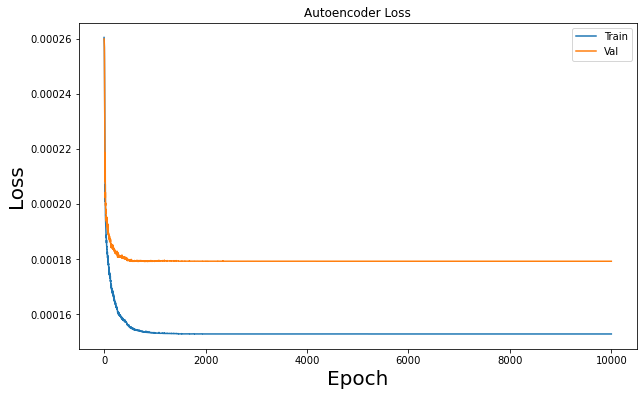

In [24]:
fig, ax = plt.subplots(1,1, figsize=(10,6))
ax.plot(history.history['loss'], label='Train')
ax.plot(history.history['val_loss'], label='Val')
ax.set_xlabel("Epoch", fontsize=20)
ax.set_ylabel("Loss", fontsize=20)
ax.legend()
ax.set_title('Autoencoder Loss')

In [25]:
output = autoencoder.predict(X_test)

Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: Bad argument number for Name: 4, expecting 3
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: Bad argument number for Name: 4, expecting 3
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


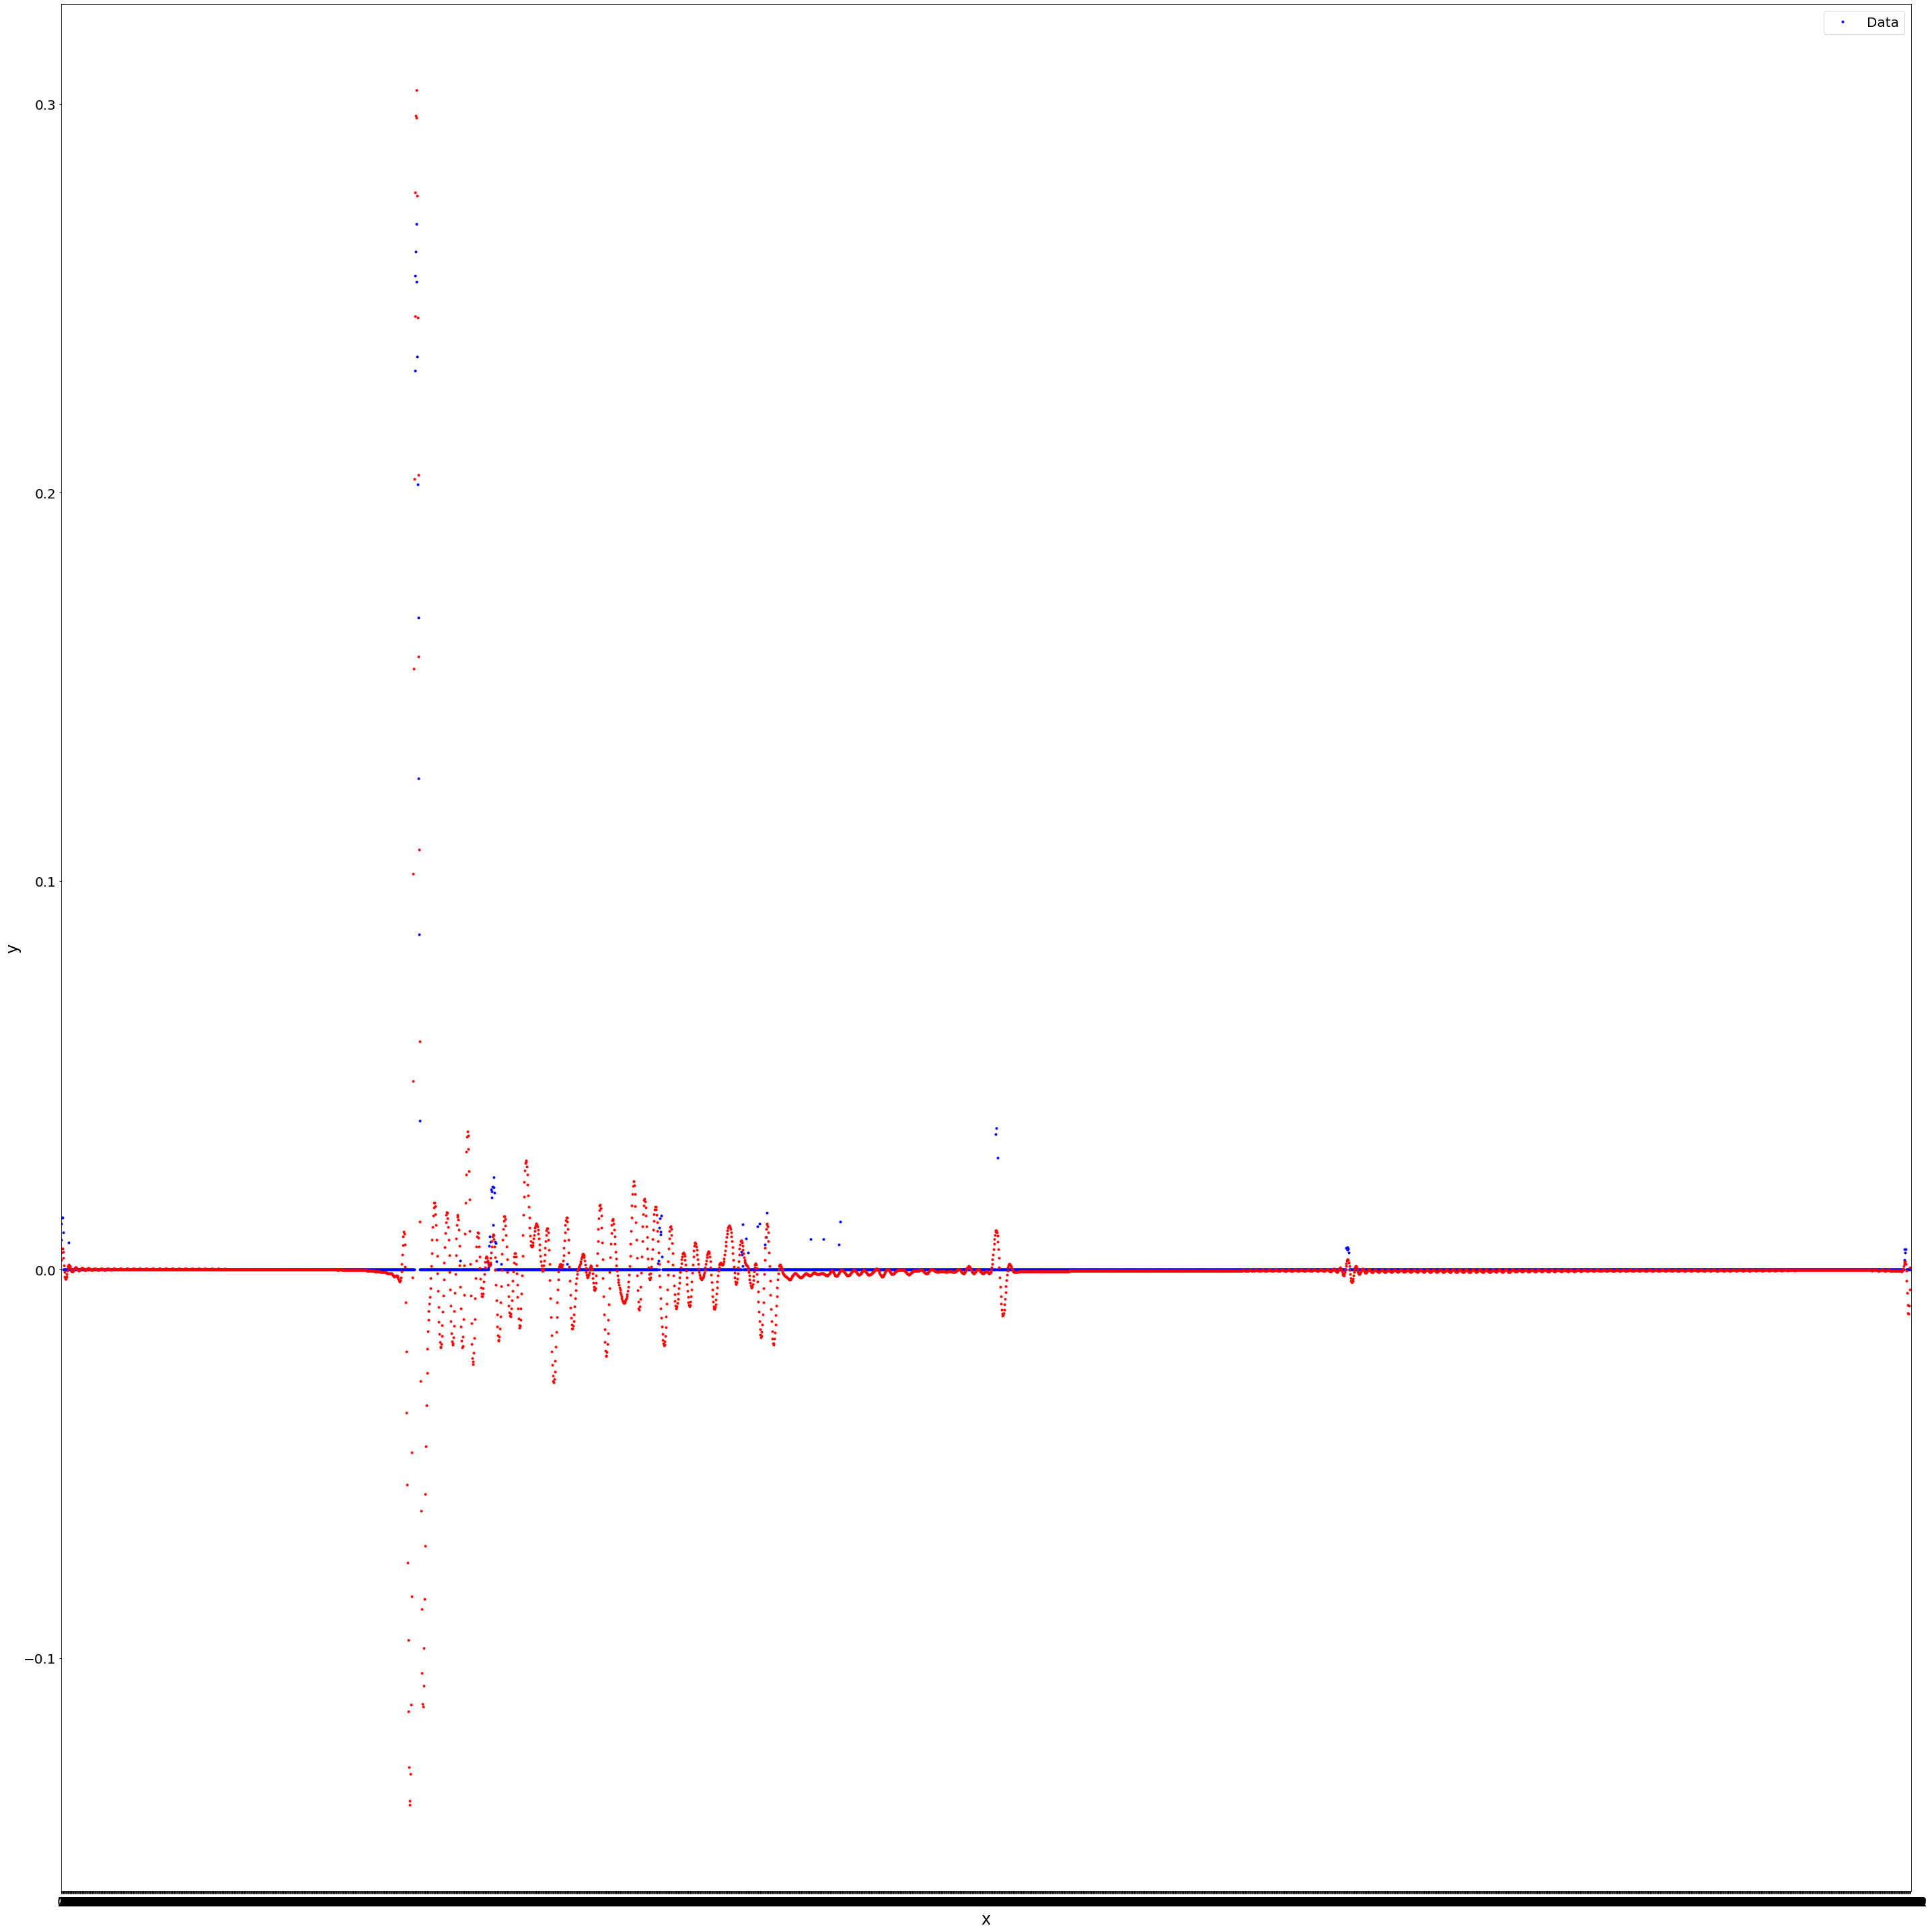

In [26]:
output = autoencoder.predict(X_test)

plt.figure(figsize=(40,40))

plt.plot(range(0,3832,1), output[0], 'b.')
plt.plot(range(0,3832,1), y_test[0], 'r.')
plt.xlim([0, 3833])
plt.xticks(range(0,3833, 1))
plt.xlabel('x',fontsize=24)
plt.ylabel('y',fontsize=24)
plt.legend(['Data'],loc=1,fontsize=20)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.tight_layout()
plt.savefig('large_test_case0.png')
plt.show()



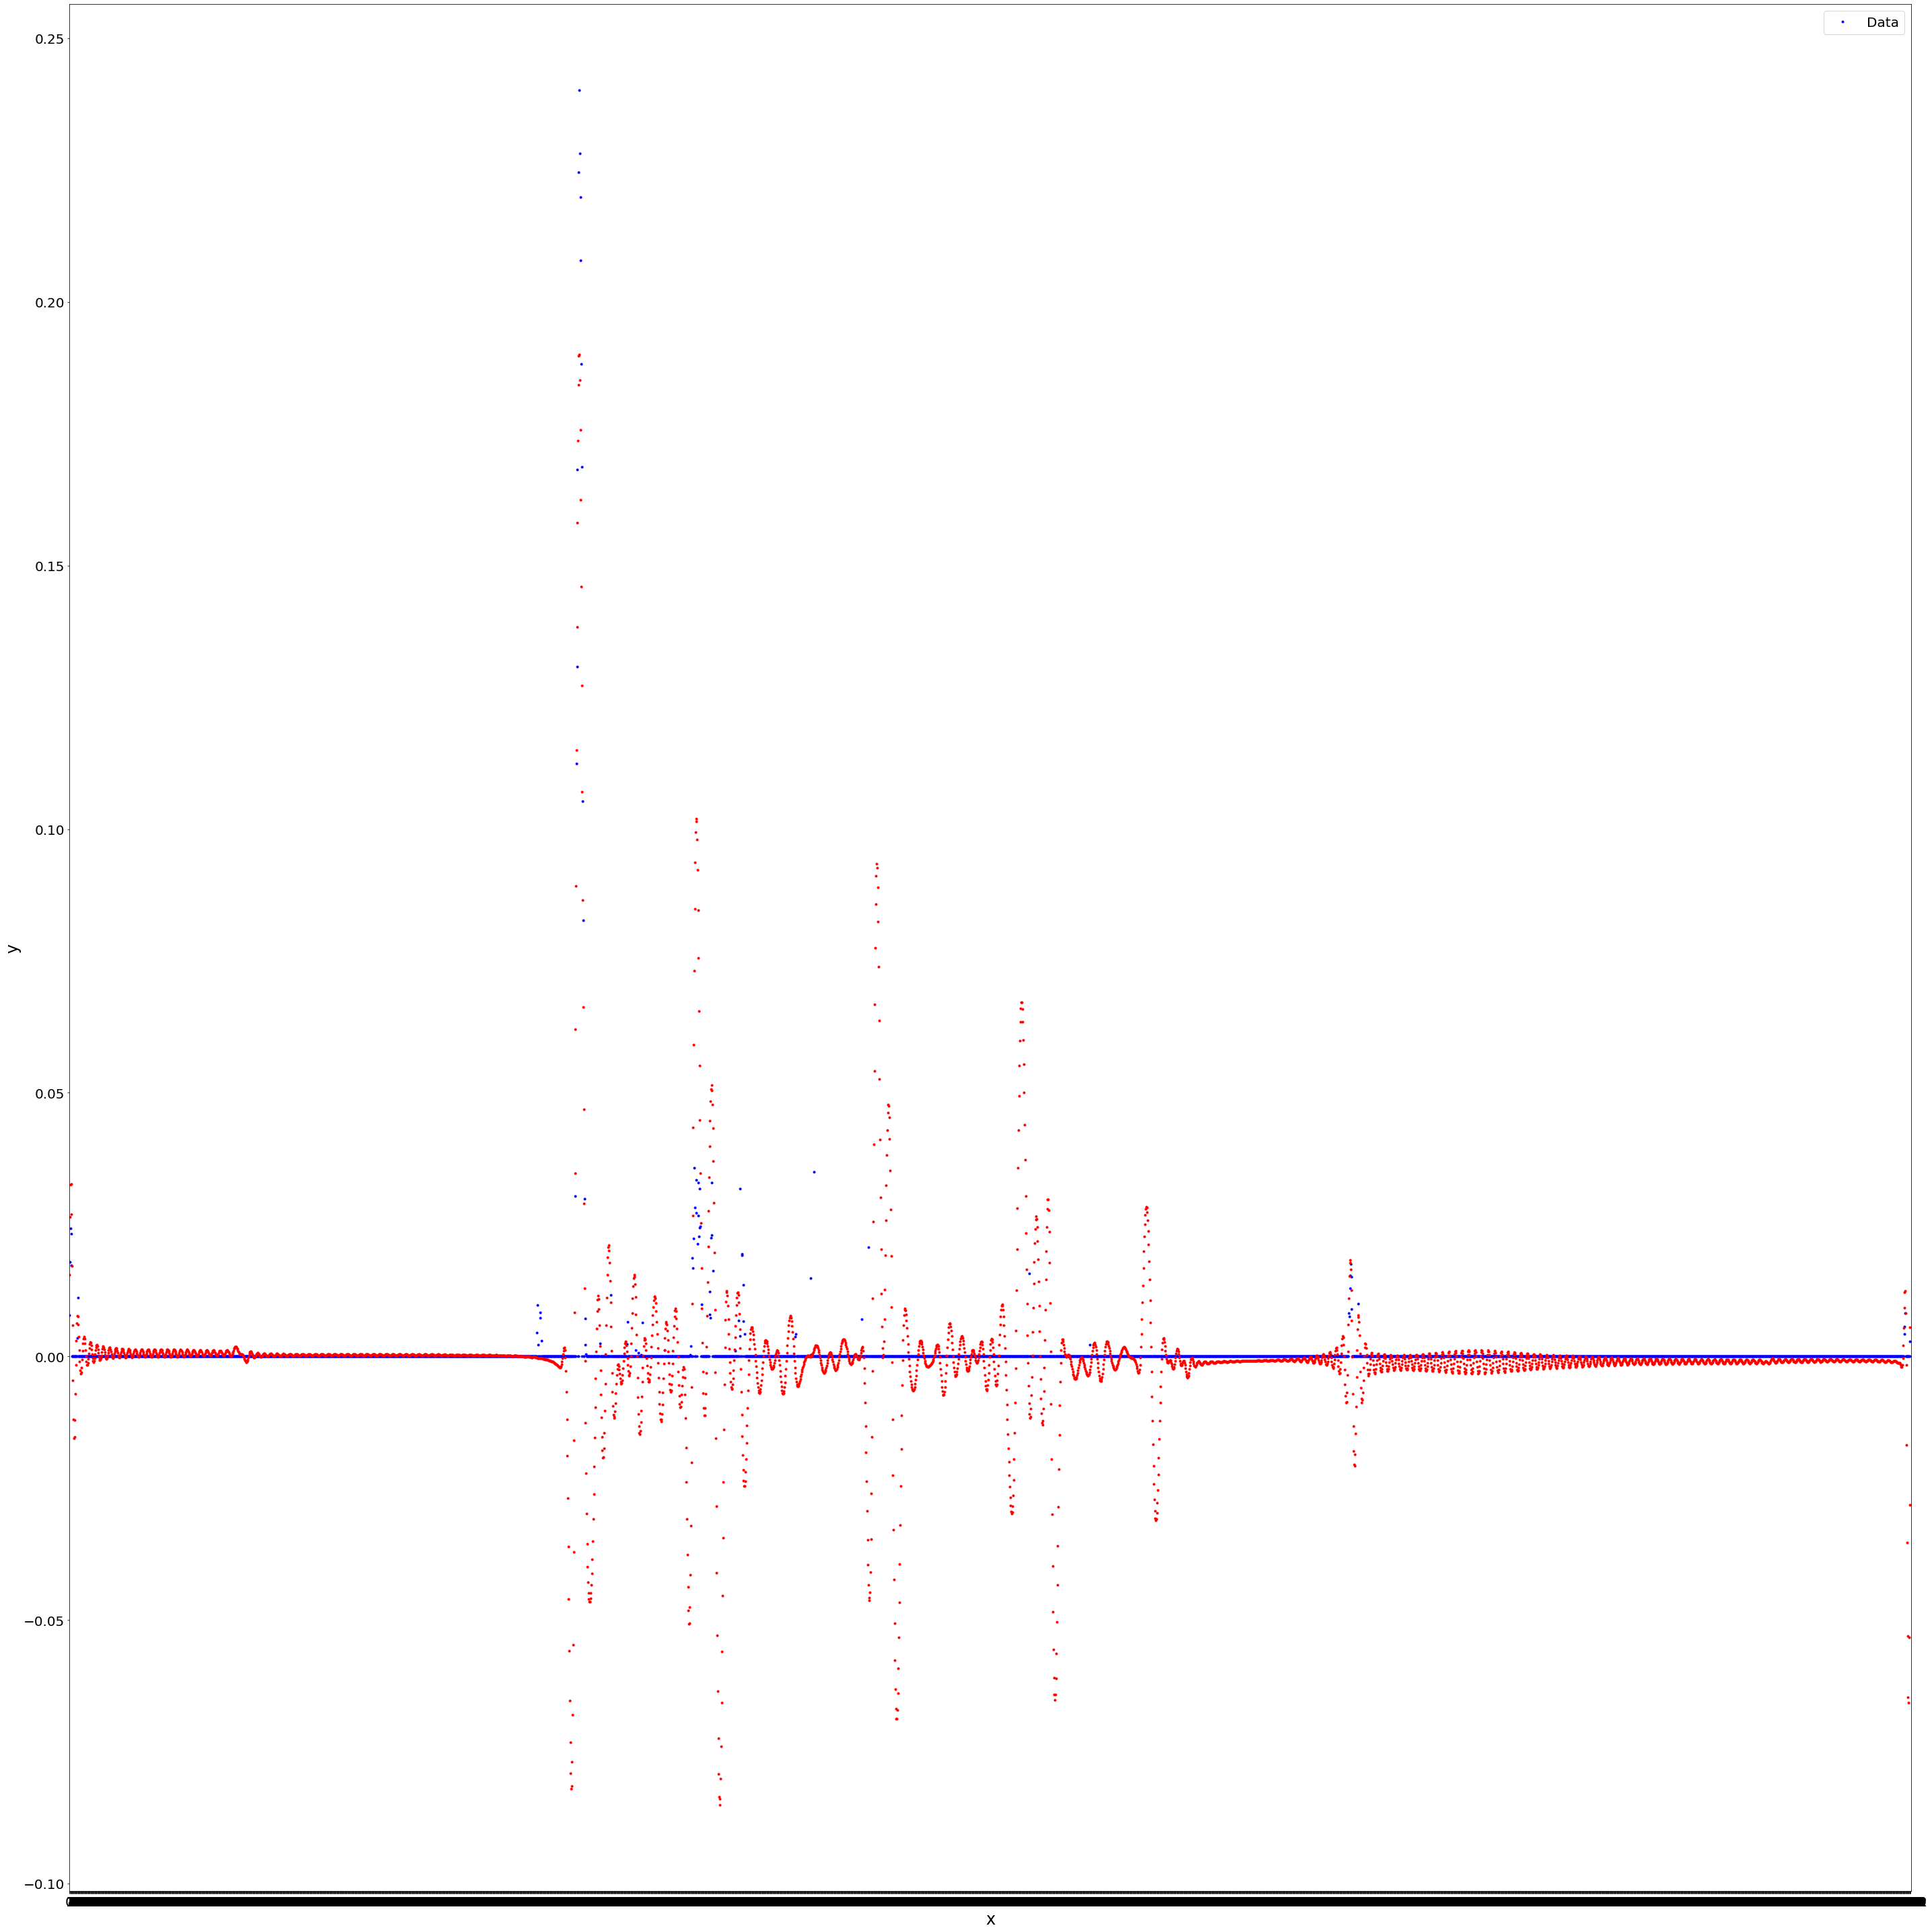

In [27]:
plt.figure(figsize=(40,40))

plt.plot(range(0,3832,1), output[1], 'b.')
plt.plot(range(0,3832,1), y_test[1], 'r.')
plt.xlim([0, 3833])
plt.xticks(range(0,3833, 1))
plt.xlabel('x',fontsize=24)
plt.ylabel('y',fontsize=24)
plt.legend(['Data'],loc=1,fontsize=20)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.tight_layout()
plt.savefig('large_test_case1.png')
plt.show()


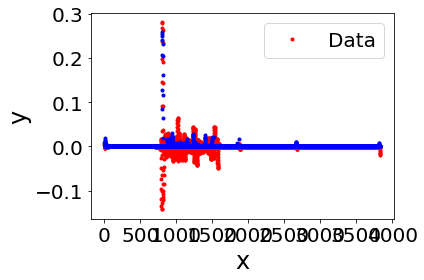

In [31]:
plt.figure()
plt.plot(range(0,3832,1), y_test[3], 'r.')
plt.plot(range(0,3832,1), output[3], 'b.')

#plt.xlim([0, 3833])
#plt.xticks(range(0,3833, 1))
plt.xlabel('x',fontsize=24)
plt.ylabel('y',fontsize=24)
plt.legend(['Data'],loc=1,fontsize=20)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.tight_layout()
plt.savefig('small_test_case1.png')
plt.show()

In [29]:

autoencoder.save('my_model_80_5000.h5')